# Analyzing price ratio

In [134]:
import pandas as pd
from importlib import reload
import numpy as np
import datetime
import math
import sys

import common
reload(common)
import moving
reload(moving)
import render
reload(render)

%matplotlib inline

## Loading stocks prices history from './history' folder

In [135]:
history = common.load_history('./history_daily')
stocks = pd.read_csv('data/stocks.tcs', index_col=0)

513 files with prices hoistory found
513 files with prices hoistory loaded
51215 items totaly since 2017-12-29 00:00:00 to 2018-07-23 00:00:00


### Append column with price ratio to symbol history.

Price ratio value for current date is a ratio of current close price to first open price in symbol history

### Append columns with max price ratio for previous periods

Max price ratio value for current date is a maximum price ratio since begin of symbol history to current date inclusivle 

### Append column with price drop after last maximum

Price drop value for current date is ratio of current price ratio to current max price ratio. It shows depth of price fall since last price maximum.

### Append column with price drop period in days

Price drop period  for current date is number of days passed since last price maximum.

### Append column with  price growth ratio for all history

Price growth ratio value for current date is ratio of current close price to open price at begin of history

In [136]:
hist_per = {'all': history}
for (p_name, hp) in hist_per.items():
    common.append_price_ratio_column(hp)
    common.append_max_prev_column(hp)
    common.append_price_drop_column(hp)
    common.append_drop_period_column(hp)
    common.append_price_grouth_column(hp, windows = [])
    print('Period "{}" - OK'.format(p_name))

Period "all" - OK


## Draw price ratio

Function **draw_price_ratio** draws two curves on one chart for target symbol:
    - black color curve shows price ratio for all hisory
    - red color curve show price ratio for target period
    - tiny black horizontal line show value 1 - first open price ratio in history
    - tiny red vertical lines show target period in all history period
    - light green and red strips show drop periods
    
Also it shows average price growth ratio per year for target period and for last year. One can see it in char title.

price-drop: 1.00    drop-period: 5


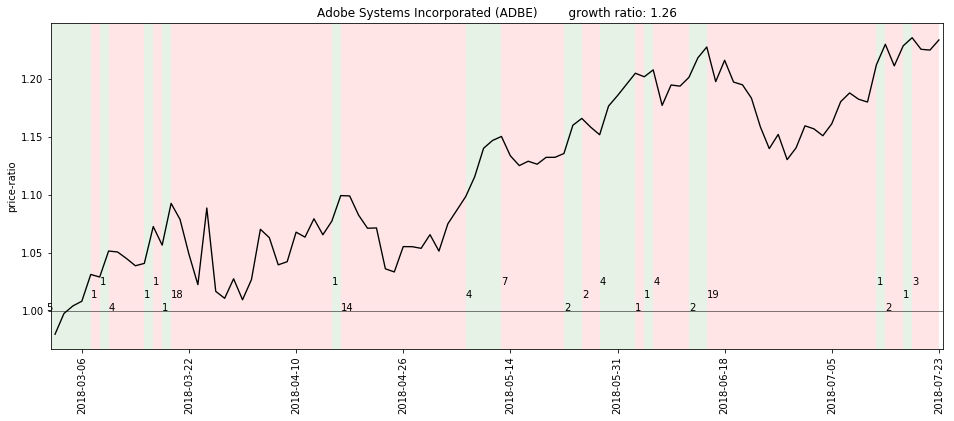

price-drop: 0.91    drop-period: 39


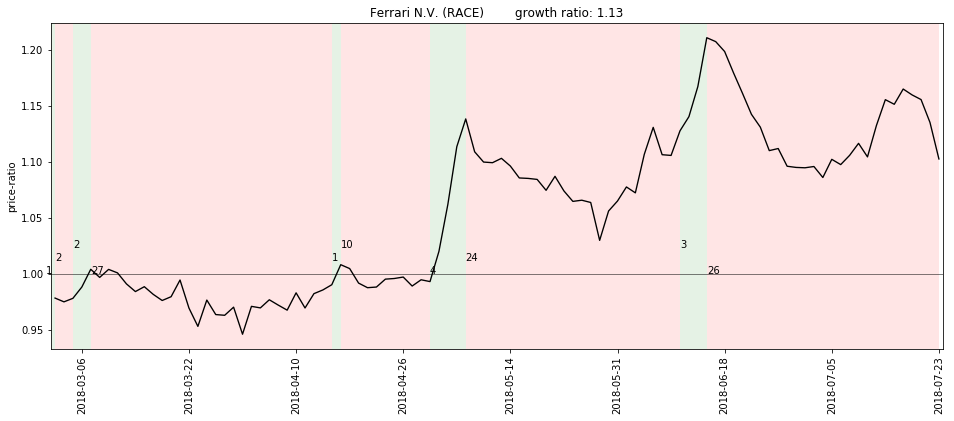

price-drop: 1.00    drop-period: 5


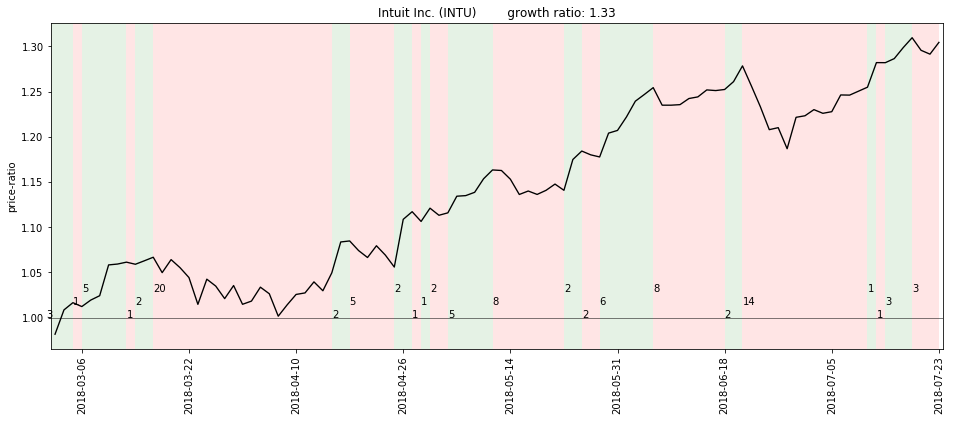

price-drop: 1.00    drop-period: 5


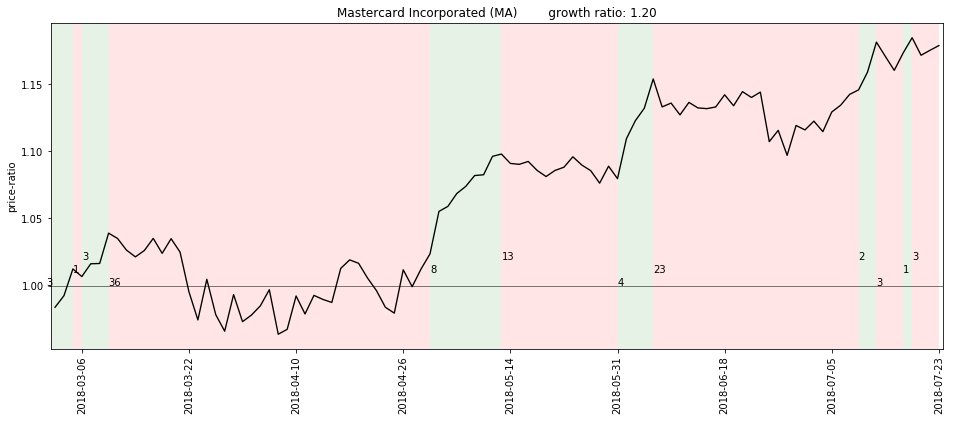

price-drop: 1.00    drop-period: 5


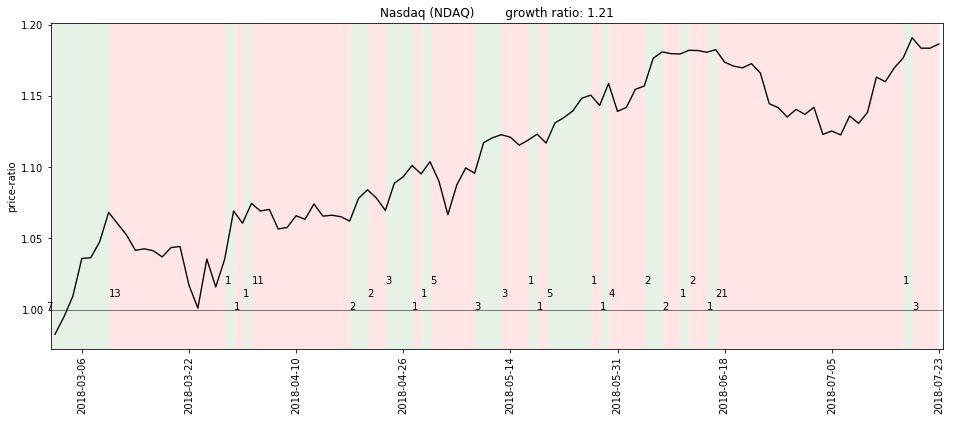

price-drop: 0.86    drop-period: 14


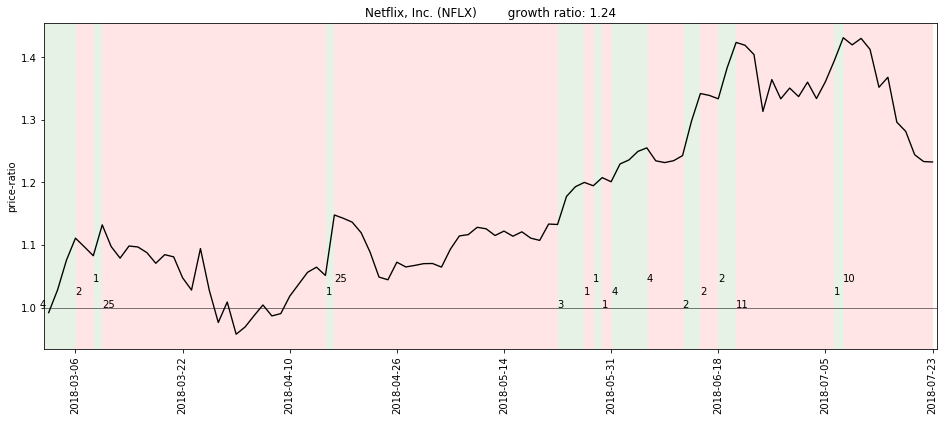

price-drop: 0.84    drop-period: 35


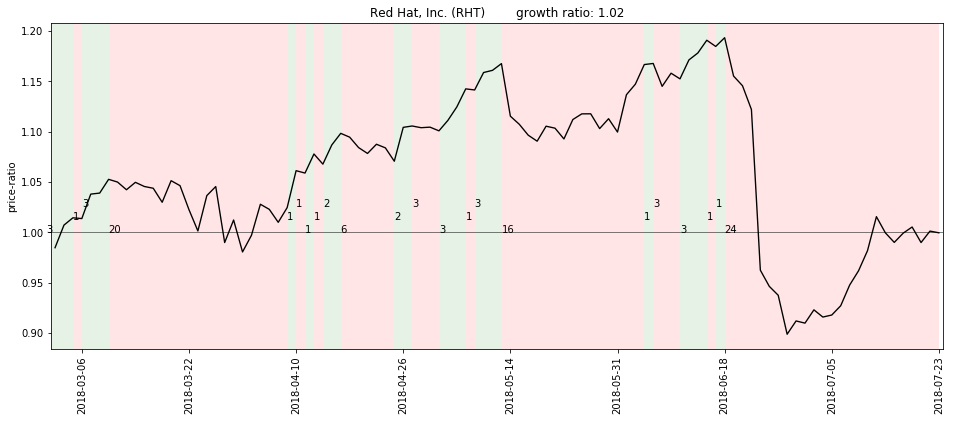

price-drop: 0.99    drop-period: 11


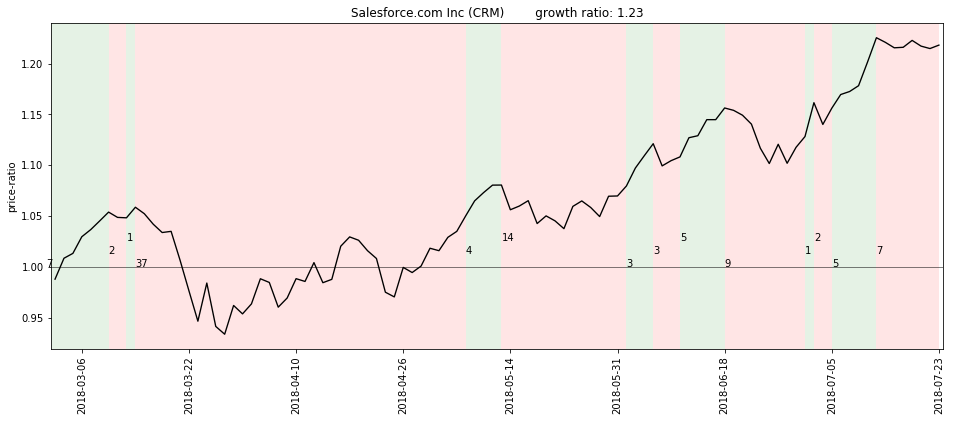

price-drop: 0.97    drop-period: 41


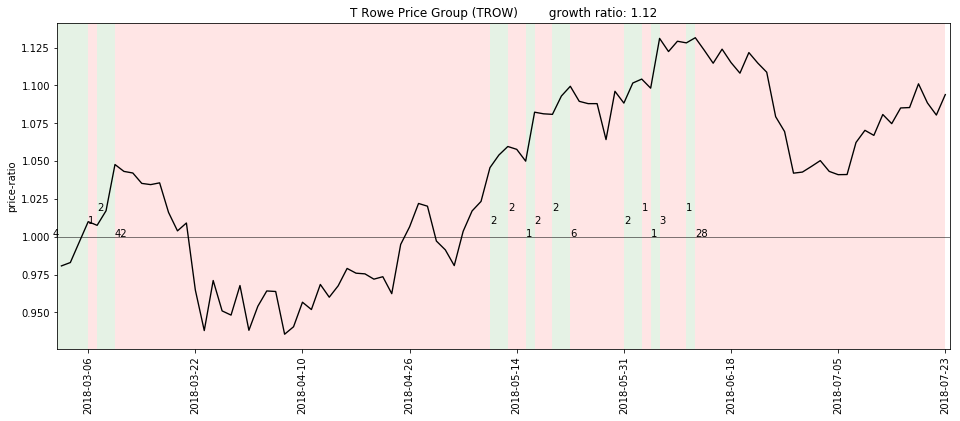

price-drop: 0.97    drop-period: 47


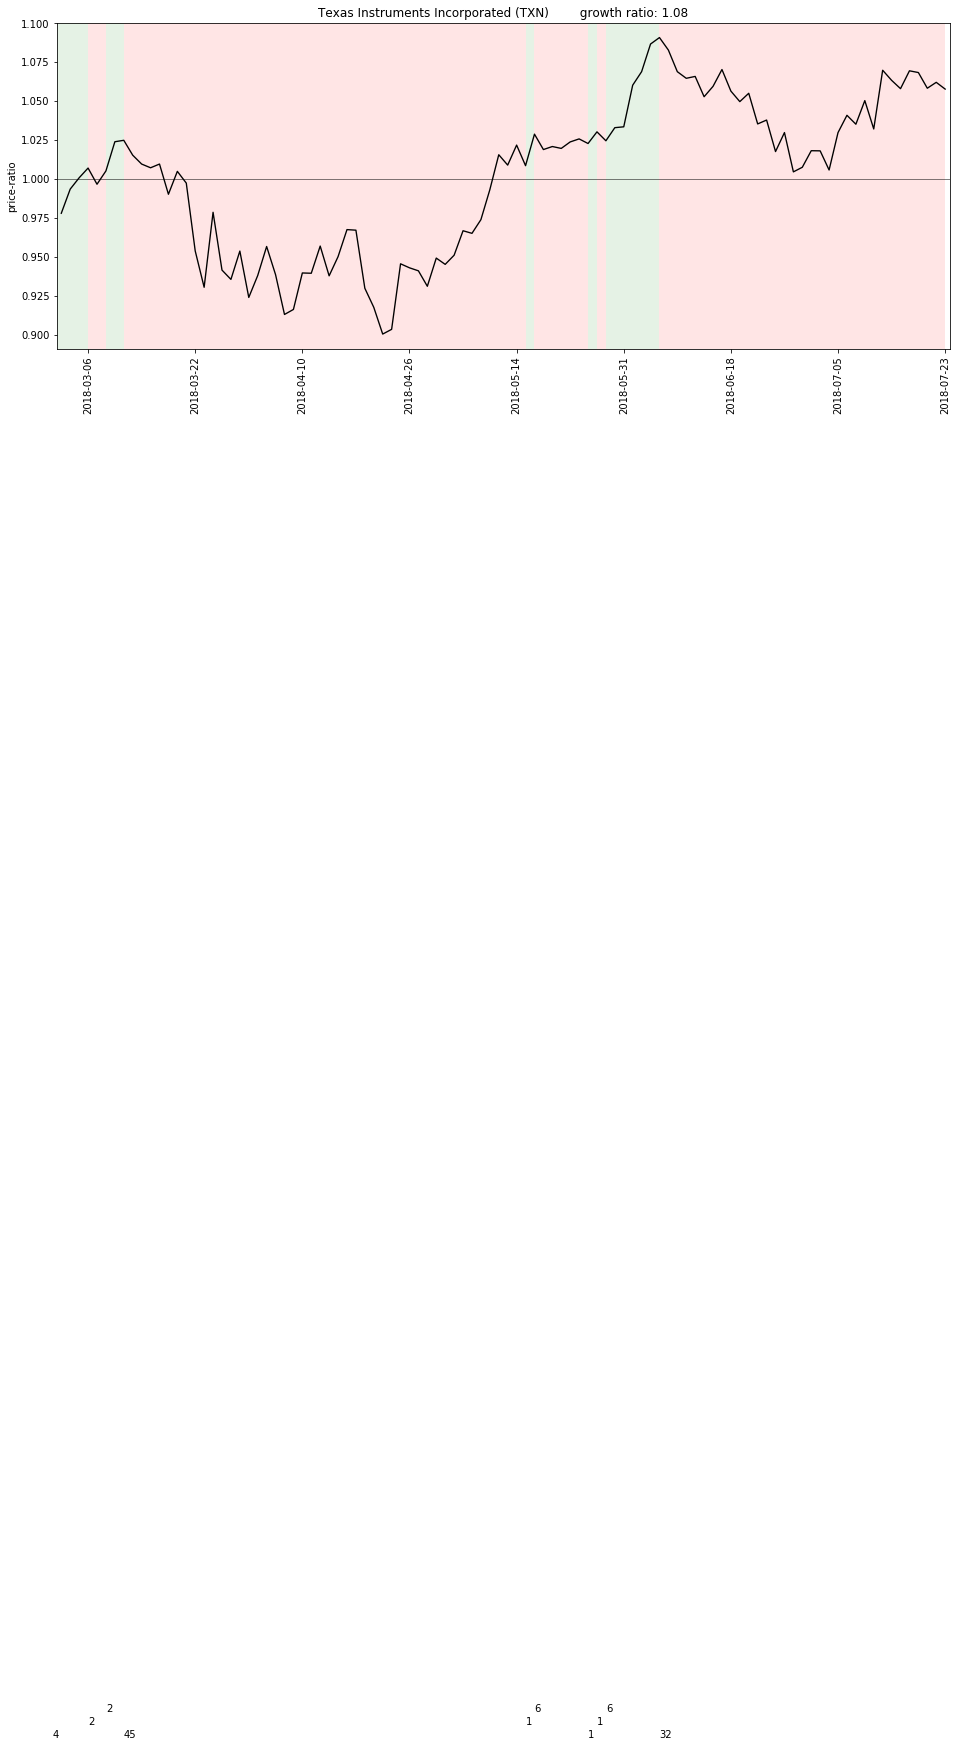

price-drop: 0.98    drop-period: 10


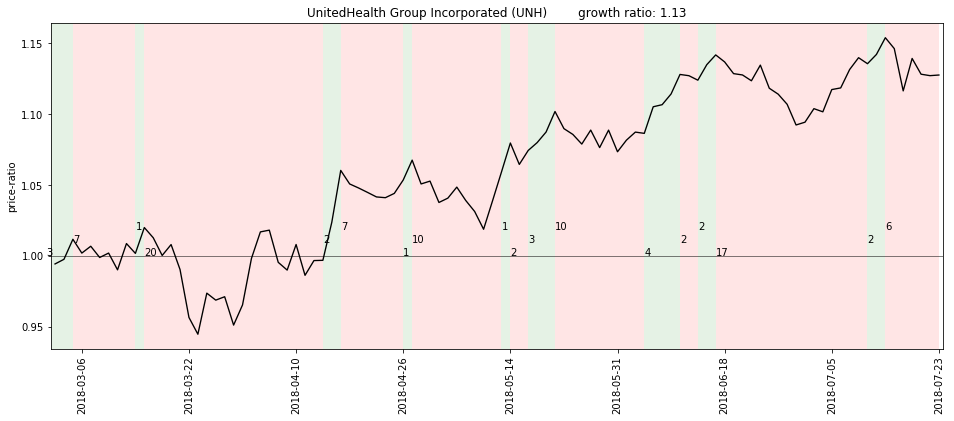

price-drop: 0.99    drop-period: 3


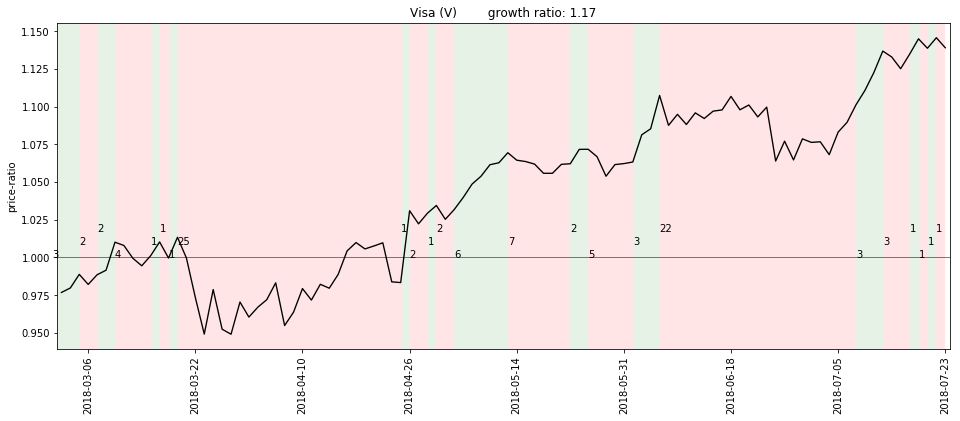

In [138]:
shortlist = [*map(lambda s: s.strip(), open('data/shortlist').readlines())]
hp = hist_per['all']
for symbol in shortlist:
    print('price-drop: %.2f    drop-period: %i'%(hp[symbol]['price-drop'].iloc[-1], hp[symbol]['drop-period'].iloc[-1]))
    render.draw_column(hp, symbol, stocks['Name'][symbol], add = ['drop-periods', 'drop-periods-labels'])    

## Look at top-30 of symbols with fastest price growth

In [44]:
hp = hist_per['all']
price_ratio_growth_speed_top = sorted([(h['price-ratio'][-1]/h['price-ratio'][0], symbol) for (symbol, h) in hp.items()], reverse = True)

price-drop: 0.96    drop-period: 3


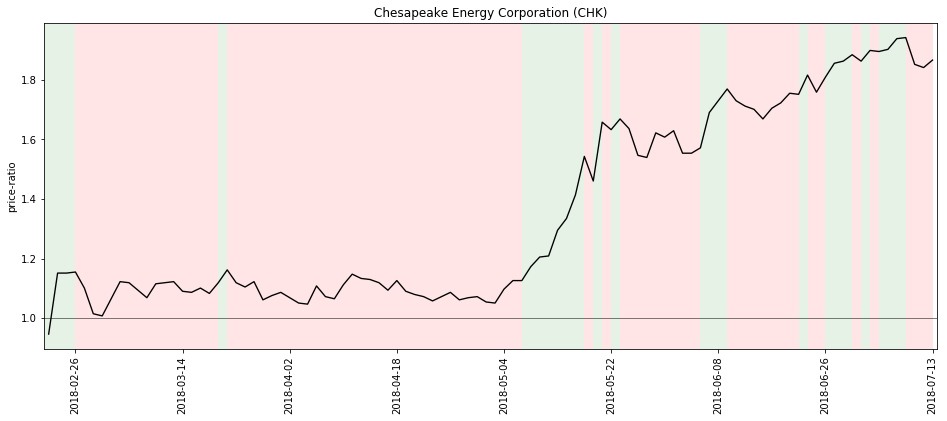

price-drop: 0.93    drop-period: 17


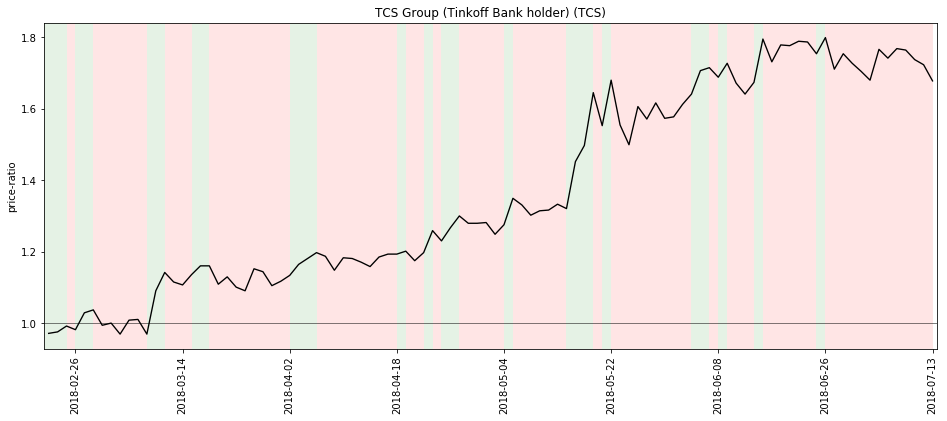

price-drop: 0.99    drop-period: 4


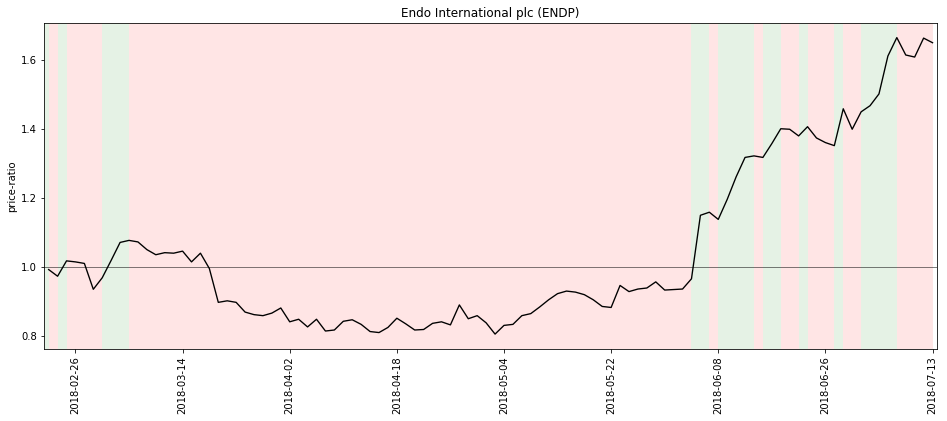

price-drop: 0.96    drop-period: 4


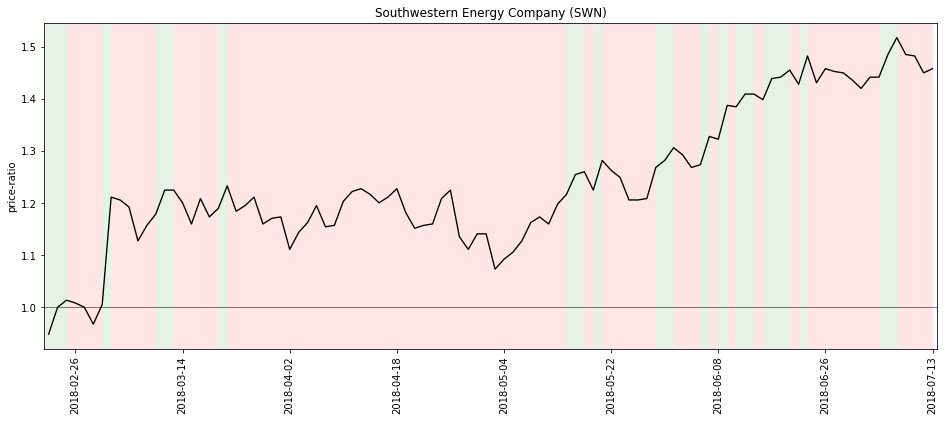

price-drop: 0.99    drop-period: 1


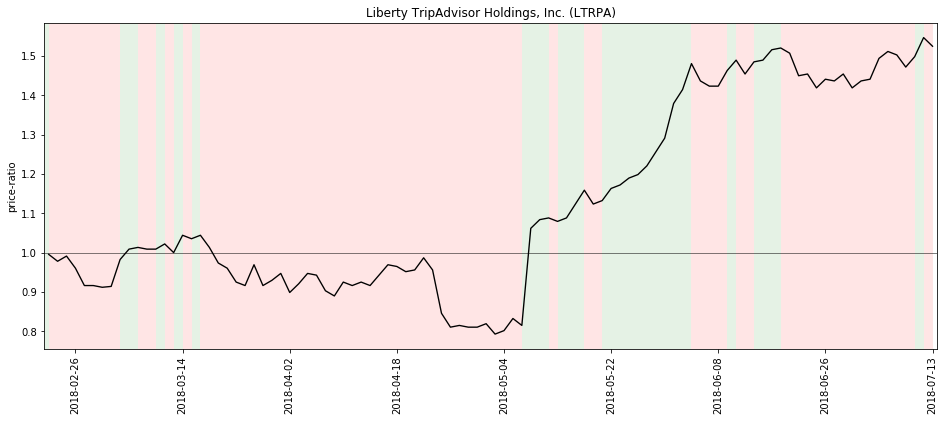

price-drop: 0.97    drop-period: 1


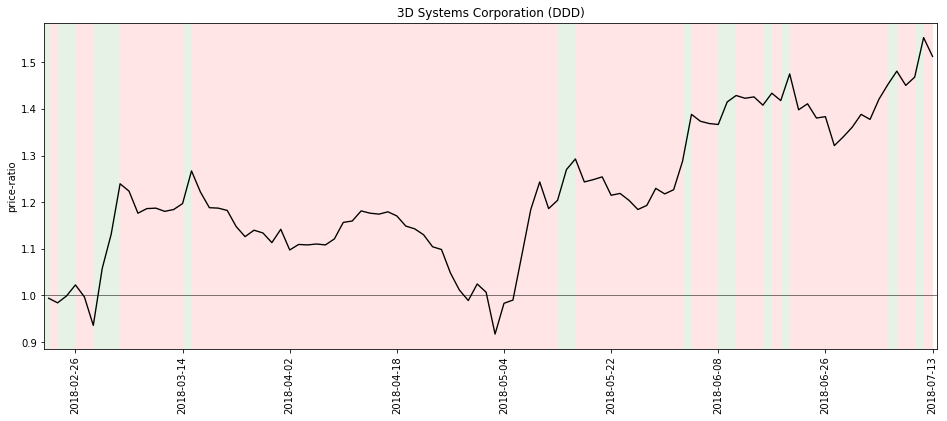

price-drop: 0.96    drop-period: 3


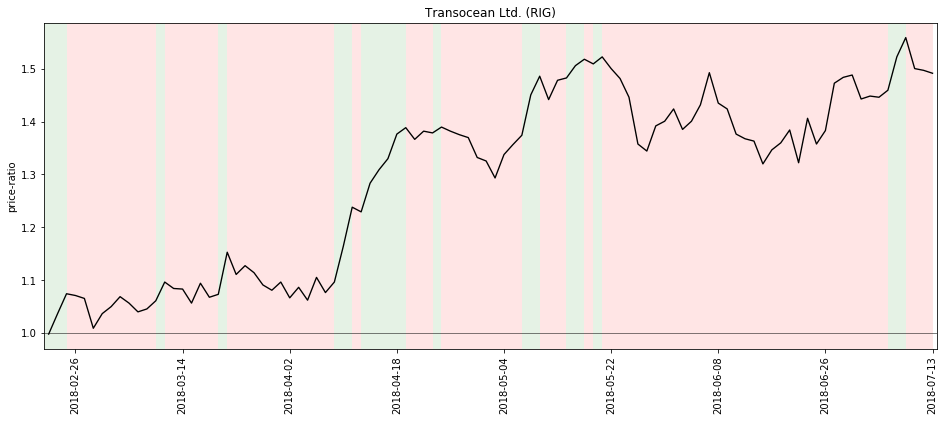

price-drop: 0.96    drop-period: 3


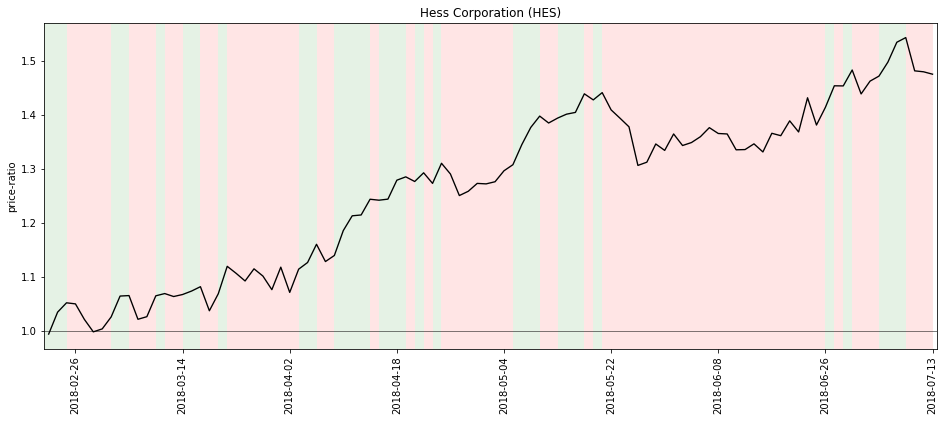

price-drop: 0.91    drop-period: 42


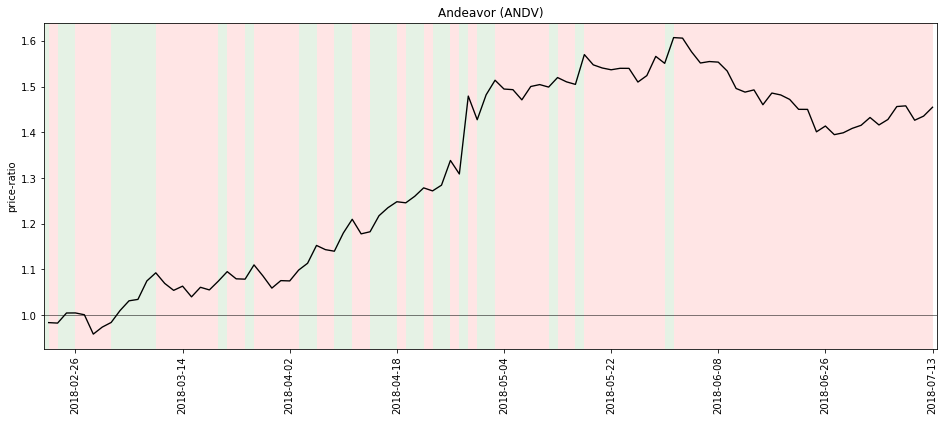

price-drop: 0.98    drop-period: 3


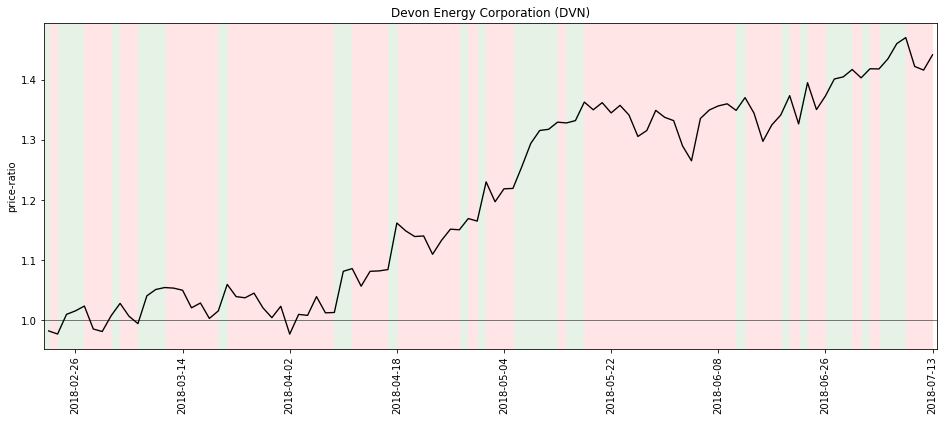

price-drop: 0.91    drop-period: 36


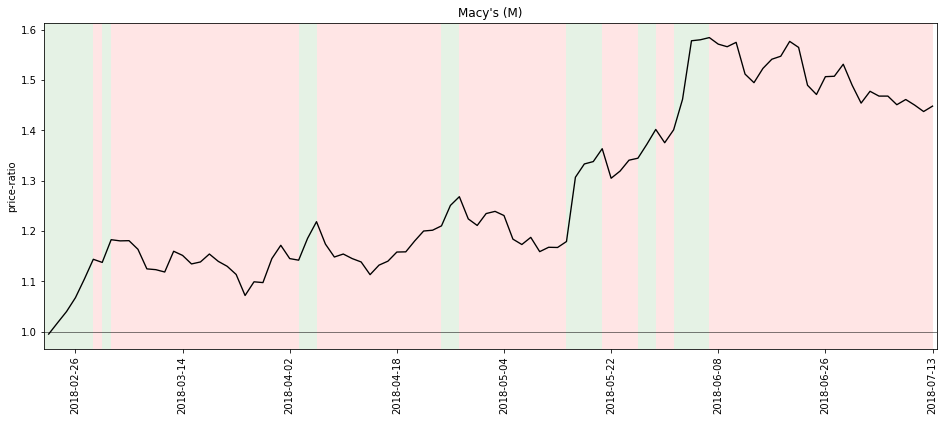

price-drop: 0.95    drop-period: 8


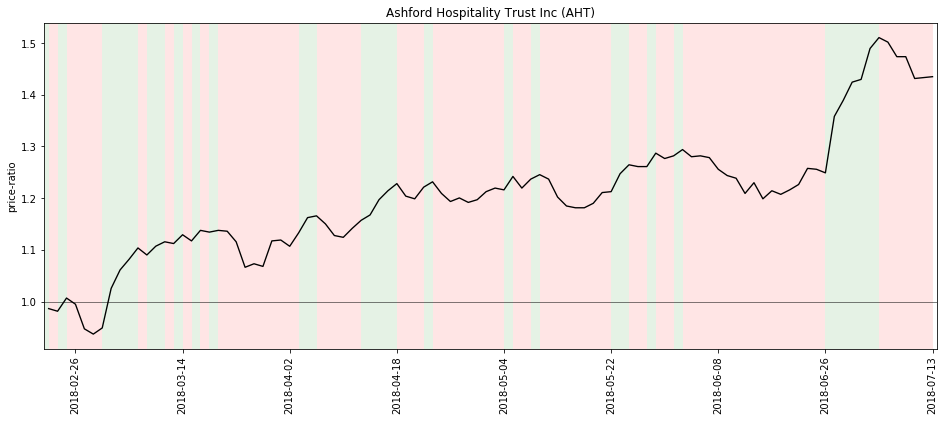

price-drop: 0.96    drop-period: 7


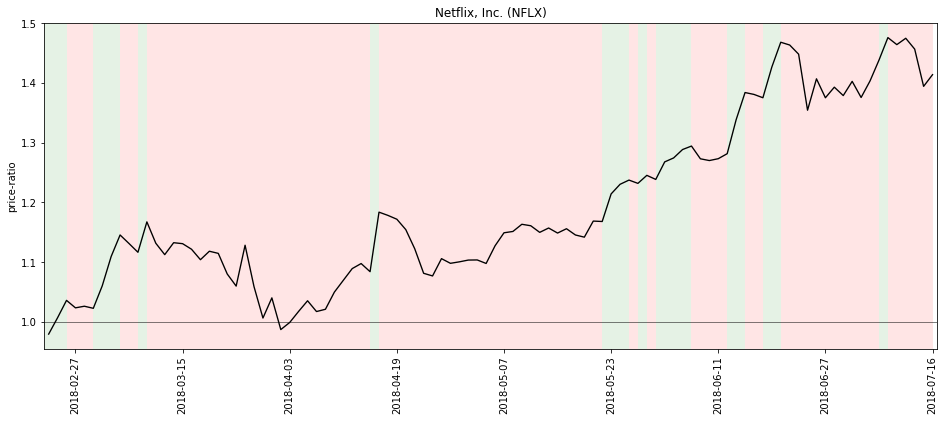

price-drop: 0.98    drop-period: 25


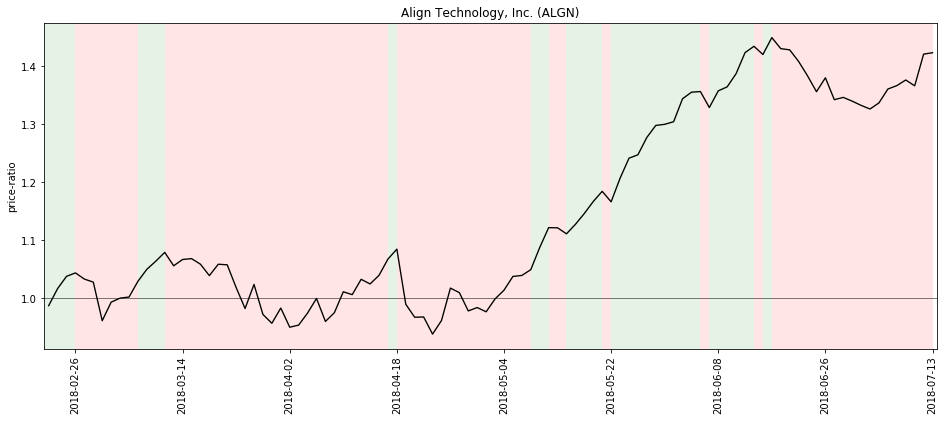

price-drop: 0.97    drop-period: 21


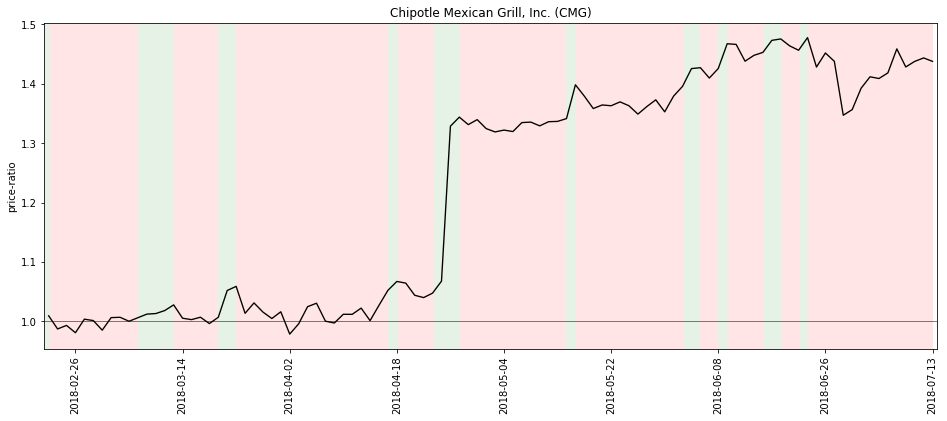

price-drop: 0.98    drop-period: 3


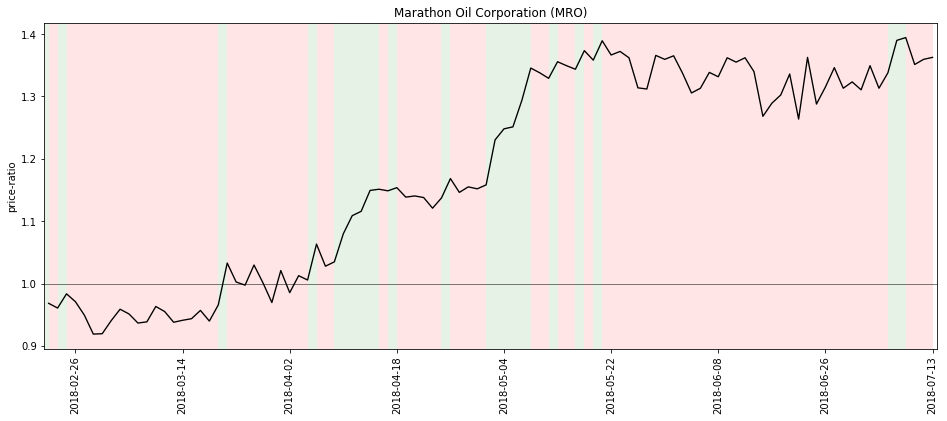

price-drop: 0.99    drop-period: 3


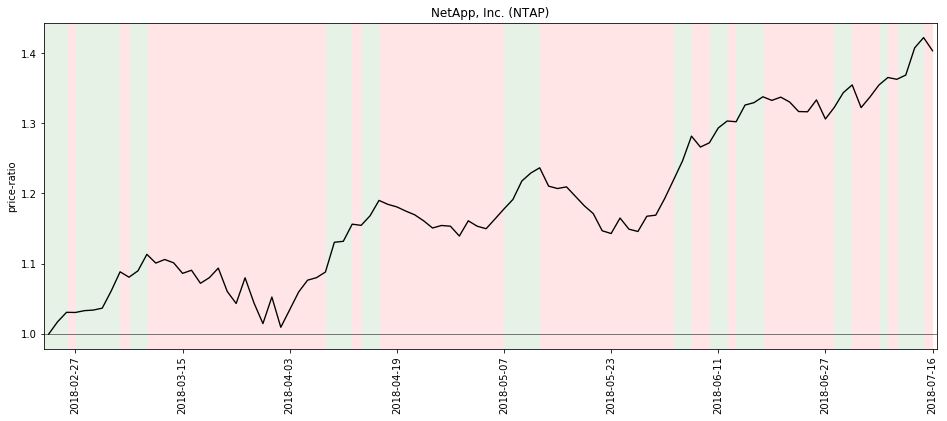

price-drop: 0.82    drop-period: 29


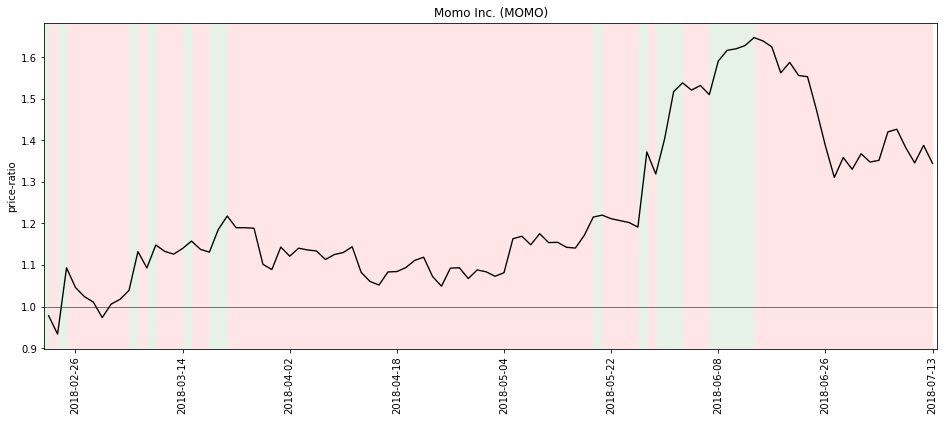

price-drop: 1.00    drop-period: 0


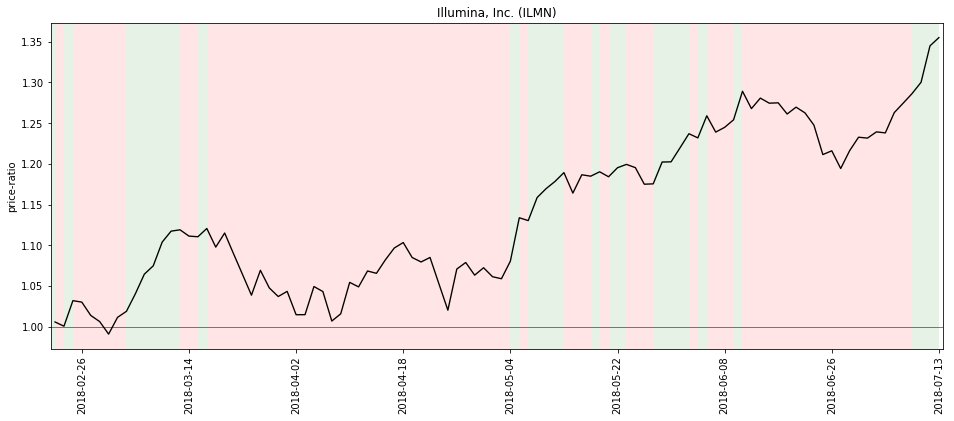

price-drop: 1.00    drop-period: 0


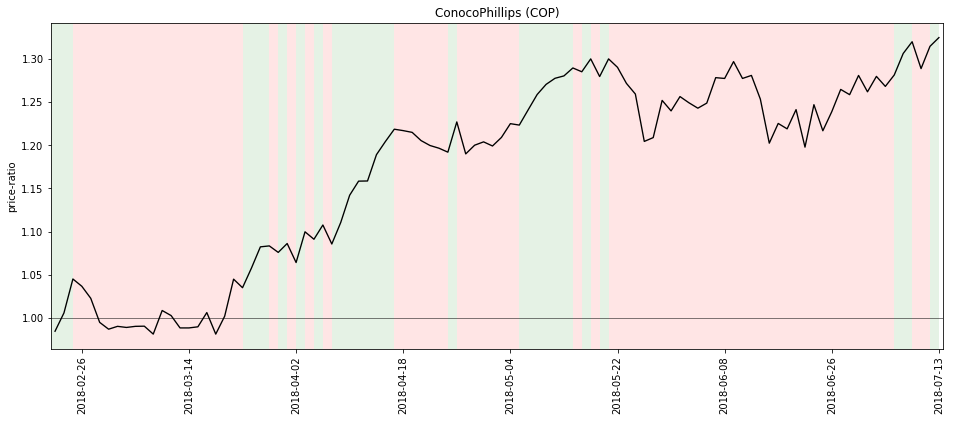

price-drop: 0.99    drop-period: 3


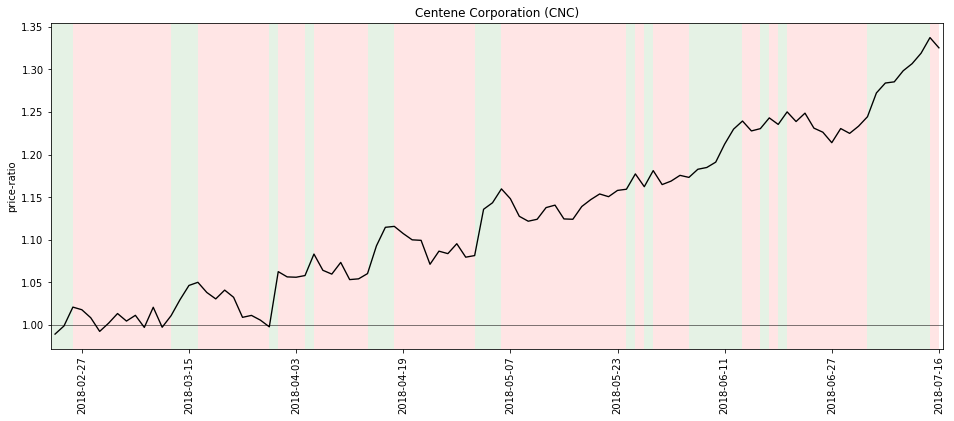

price-drop: 1.00    drop-period: 0


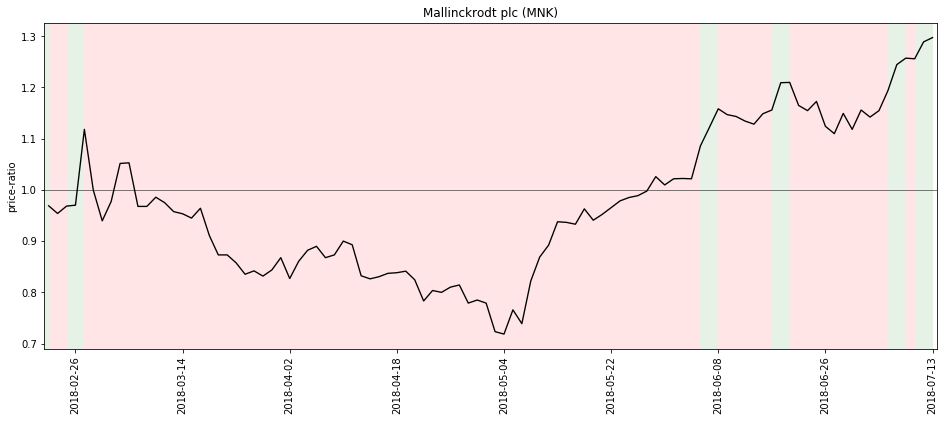

price-drop: 0.95    drop-period: 29


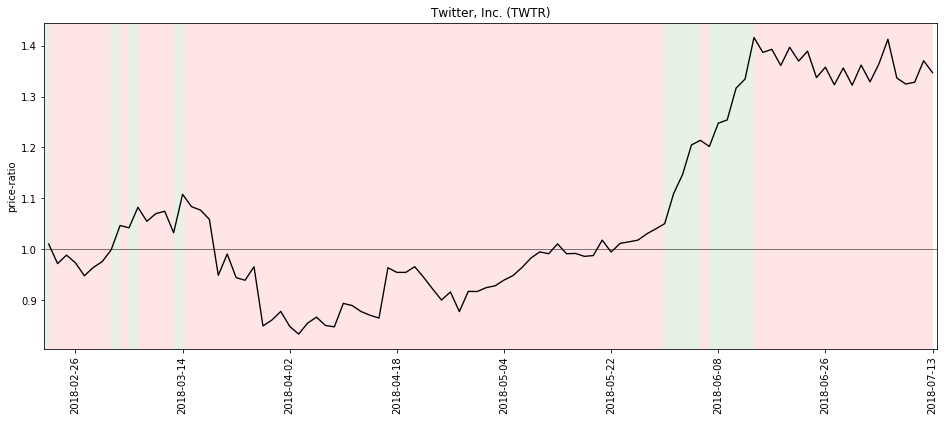

price-drop: 0.94    drop-period: 23


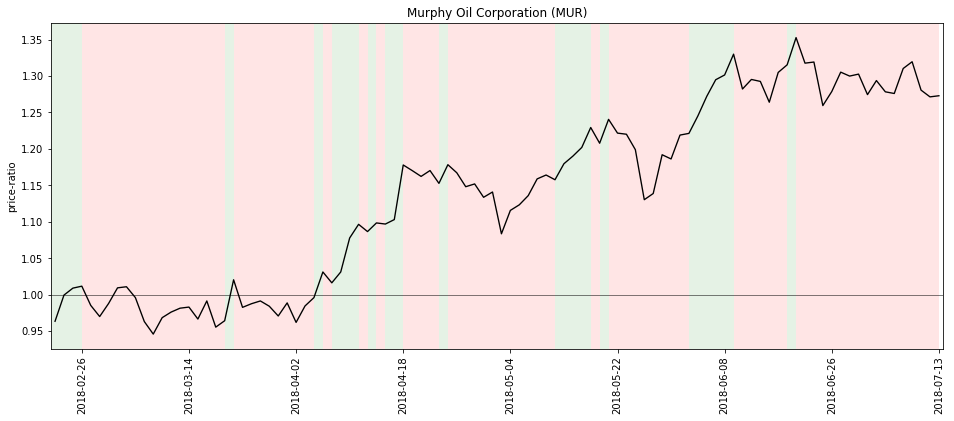

price-drop: 0.90    drop-period: 35


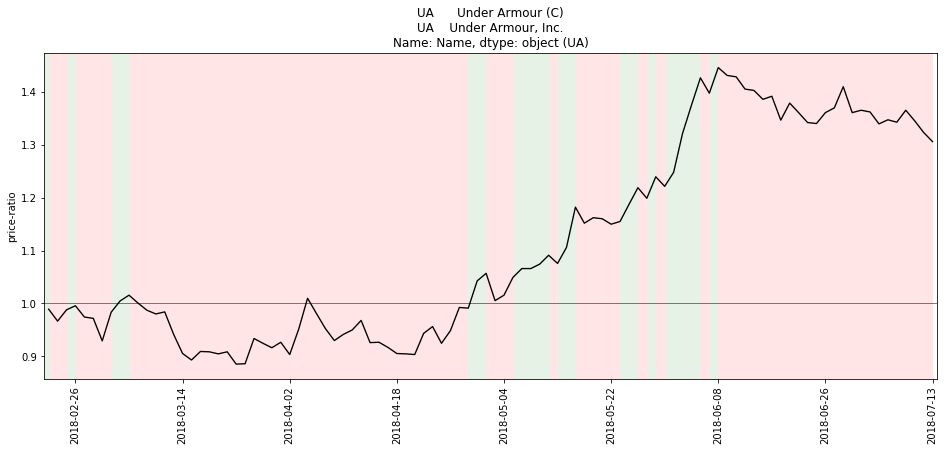

price-drop: 0.96    drop-period: 25


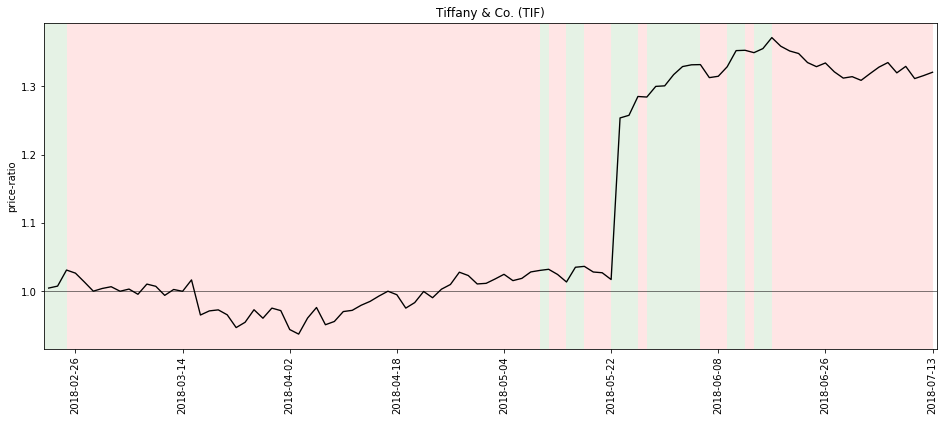

price-drop: 1.00    drop-period: 7


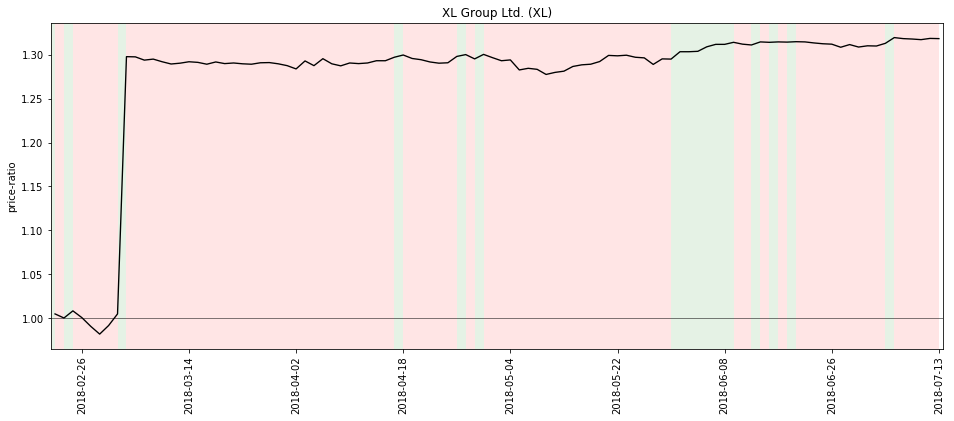

price-drop: 0.98    drop-period: 15


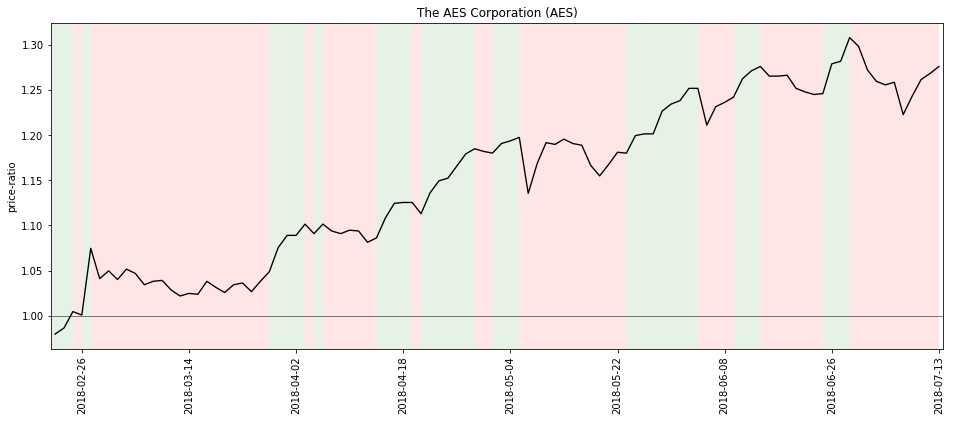

price-drop: 0.99    drop-period: 4


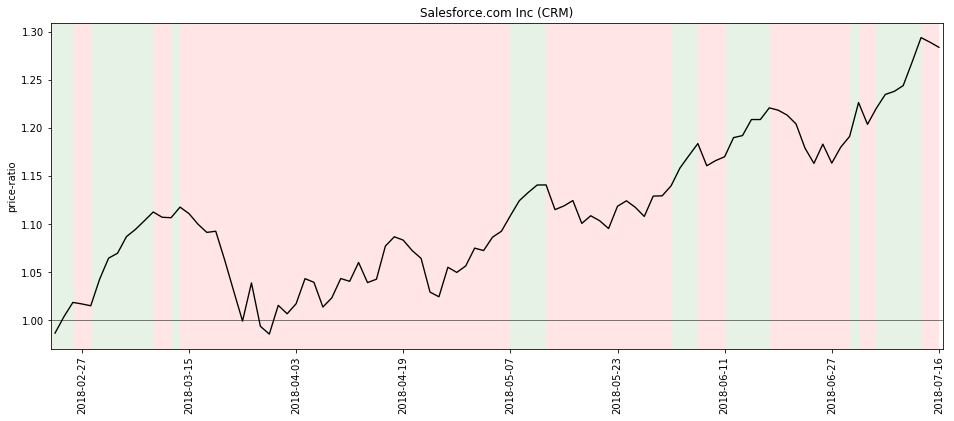

price-drop: 0.98    drop-period: 3


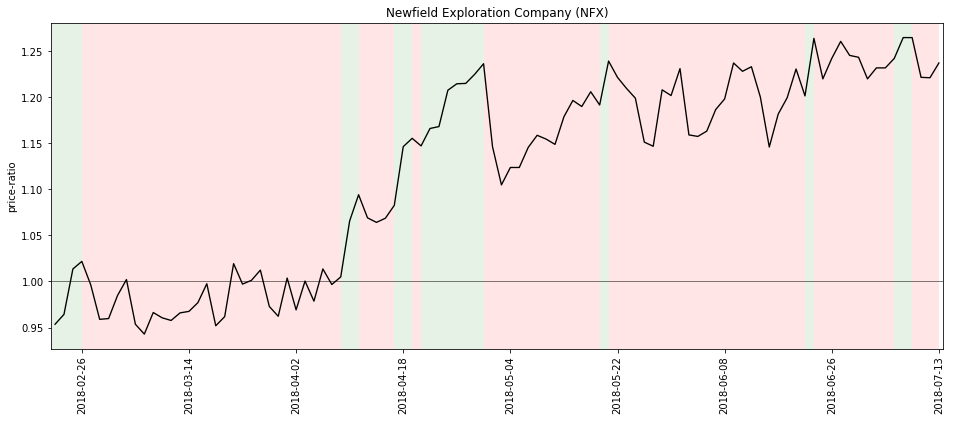

In [47]:
for (ratio, symbol) in price_ratio_growth_speed_top[:30]:
    print('price-drop: %.2f    drop-period: %i'%(hp[symbol]['price-drop'].iloc[-1], hp[symbol]['drop-period'].iloc[-1]))
    render.draw_column(hist_per['all'], symbol, stocks['Name'][symbol], add = ['drop-periods'])

## Look at symbols with last drop-period = 0 days

In [103]:
hp = hist_per['all']
drop_period_eq_0 = dict(filter(lambda item: item[1]['drop-period'][-1] == 0, hp.items()))
print('Found {} symbols'.format(len(drop_period_eq_0)))

Found 24 symbols


## Look at symbols with last drop-period = 0 days sorted by price-ratio growth

In [82]:
def draw_symbols_sorted_by_price_growth(hp, symbols, column = 'price-ratio'):
    sorted_symbols = sorted([(hp[symbol]['price-growth'][-1], symbol) for symbol in symbols], reverse = True)
    for (ratio, symbol) in  sorted_symbols:
        render.draw_column(hp, symbol, stocks['Name'][symbol], column = column, add = ['drop-periods', 'drop-periods-labels'])

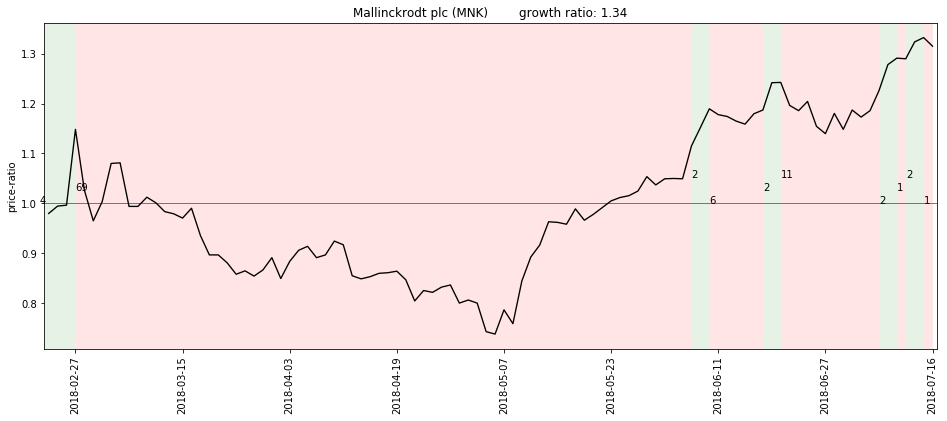

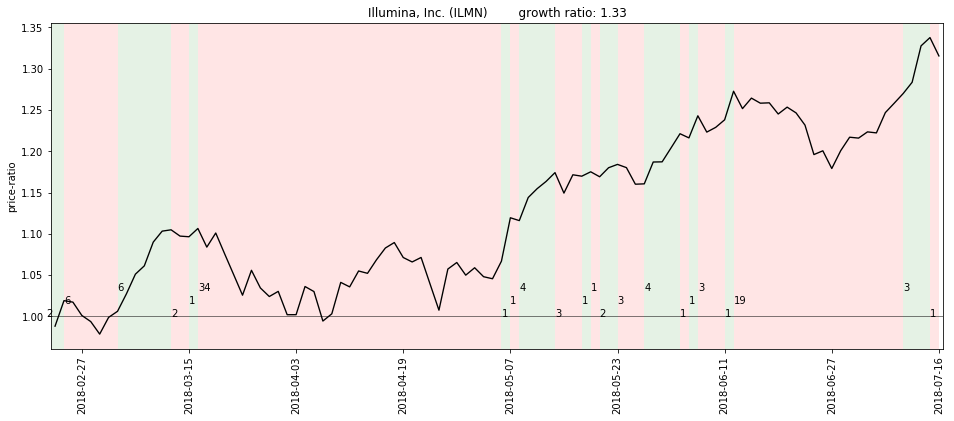

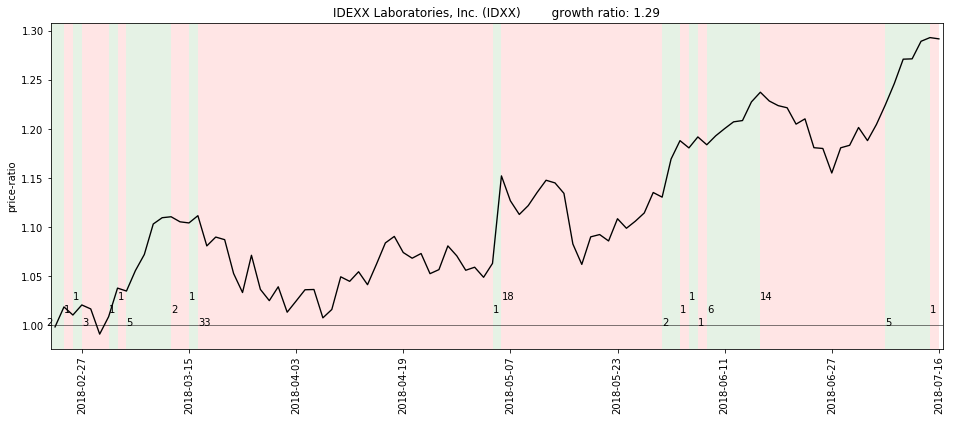

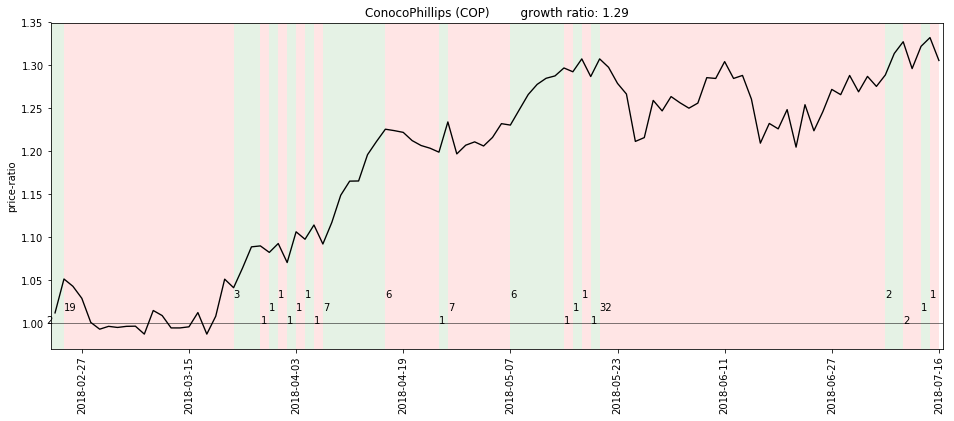

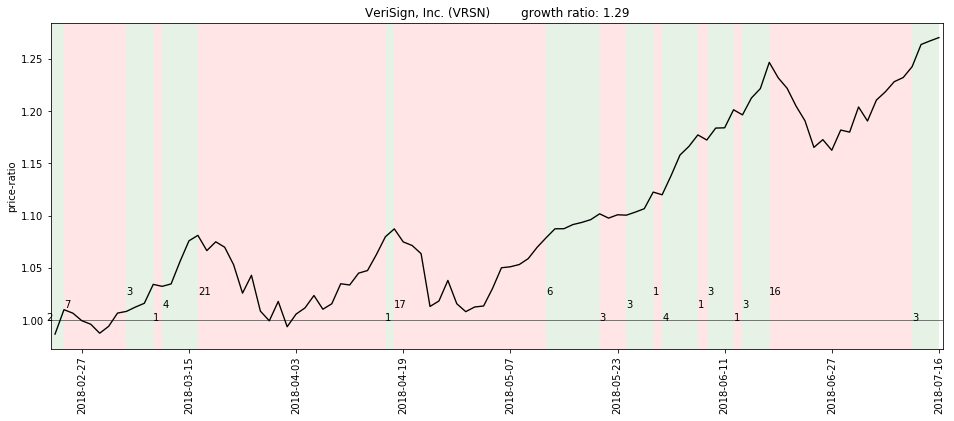

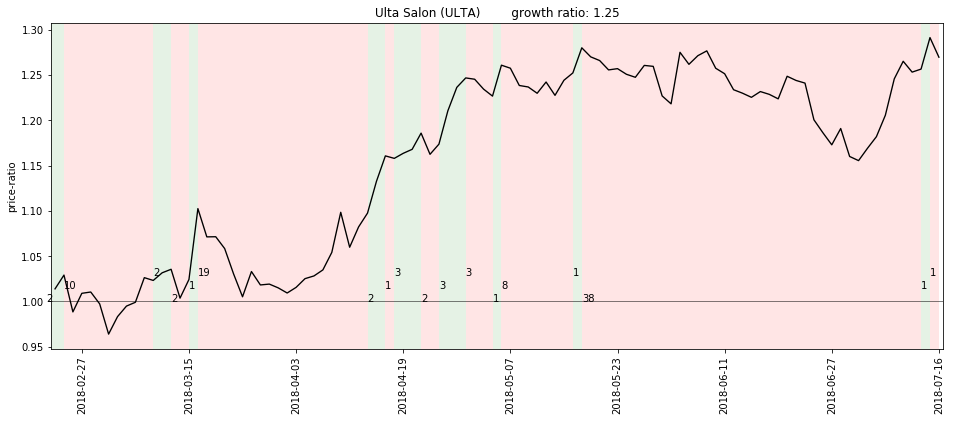

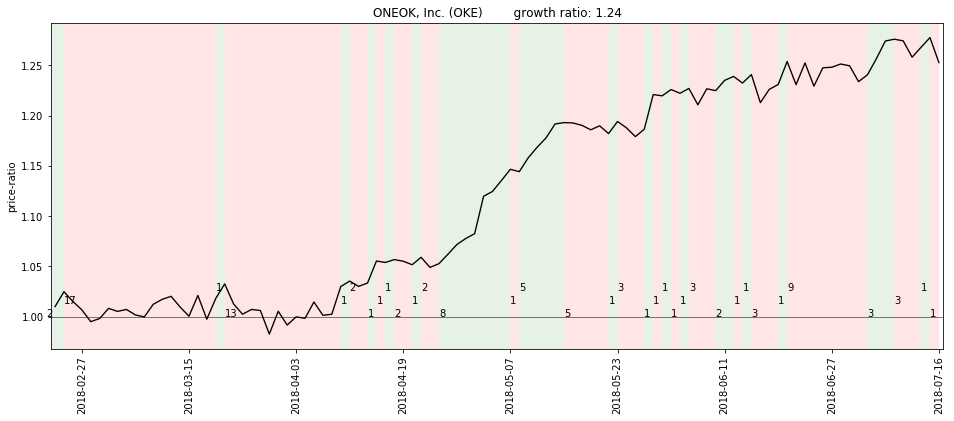

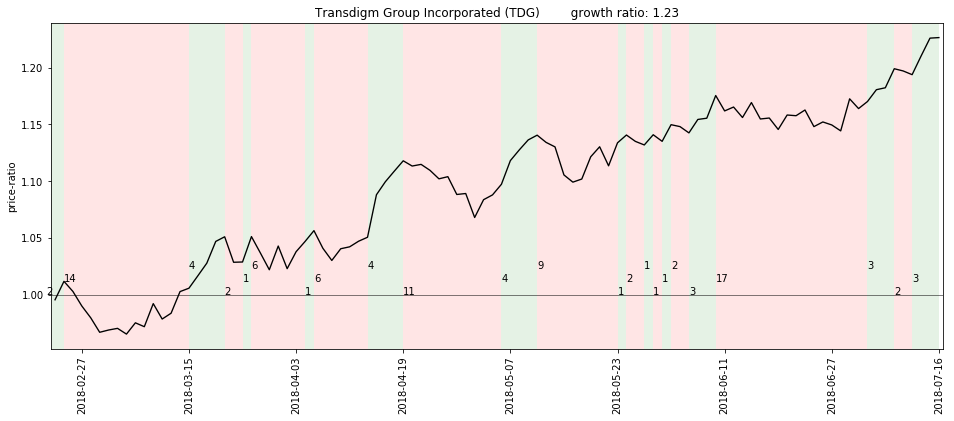

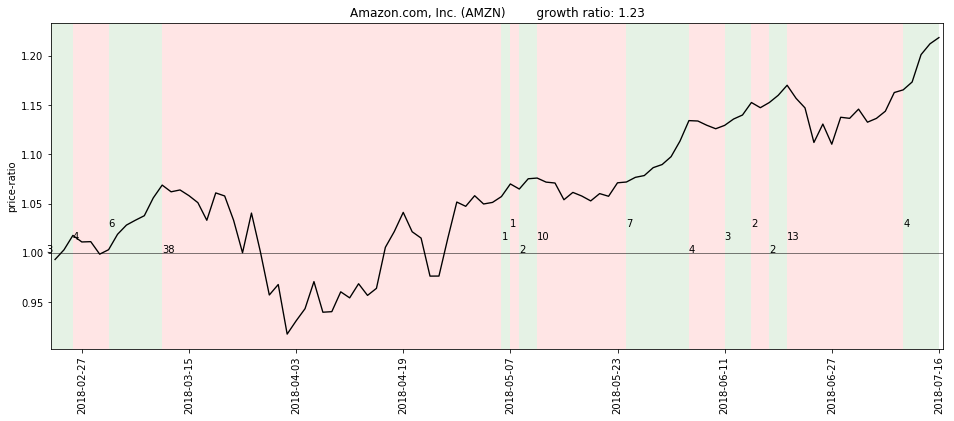

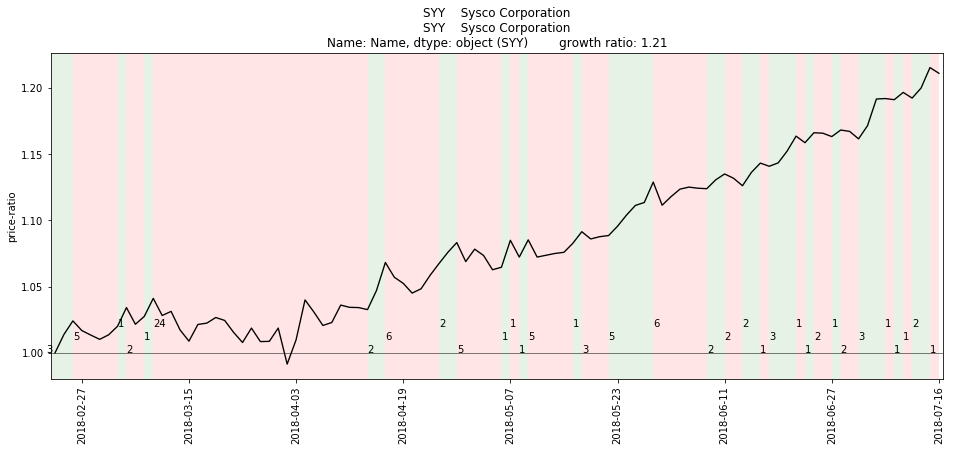

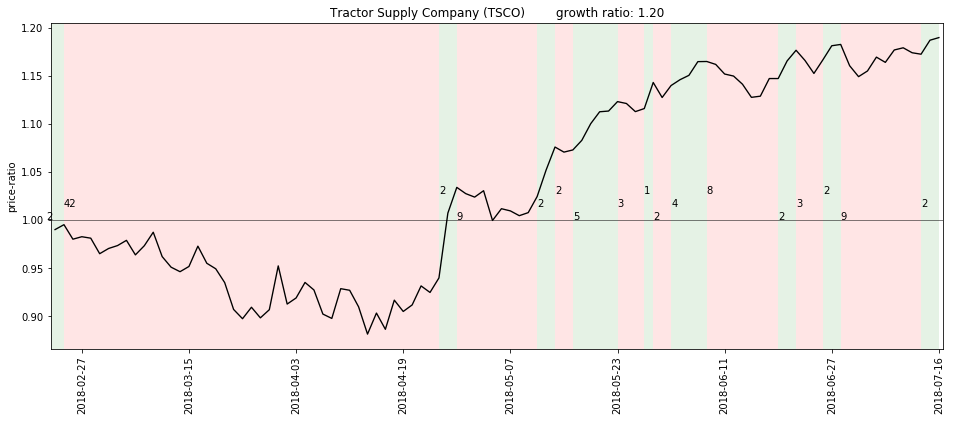

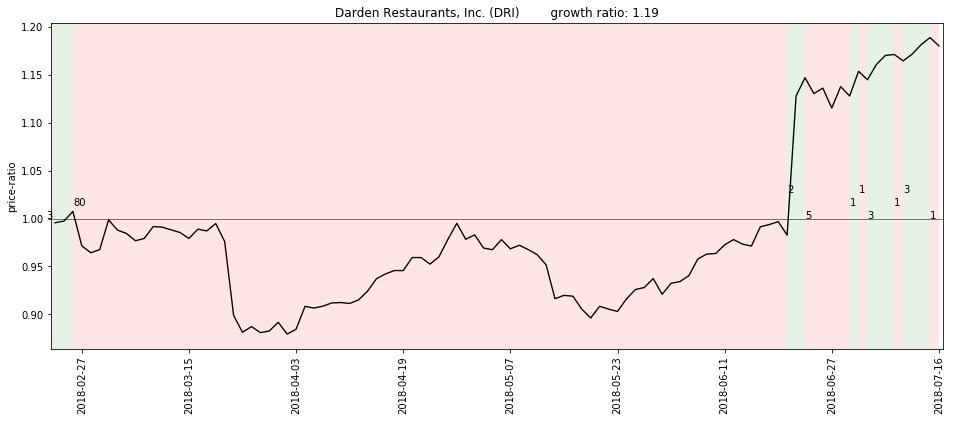

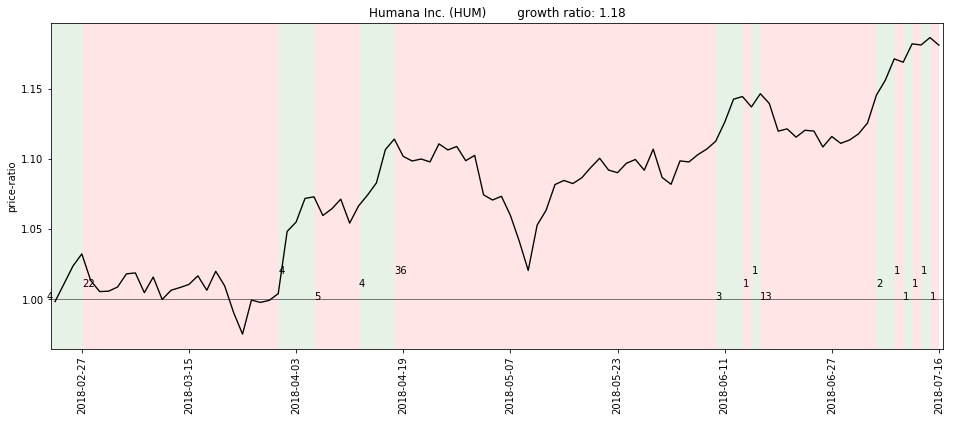

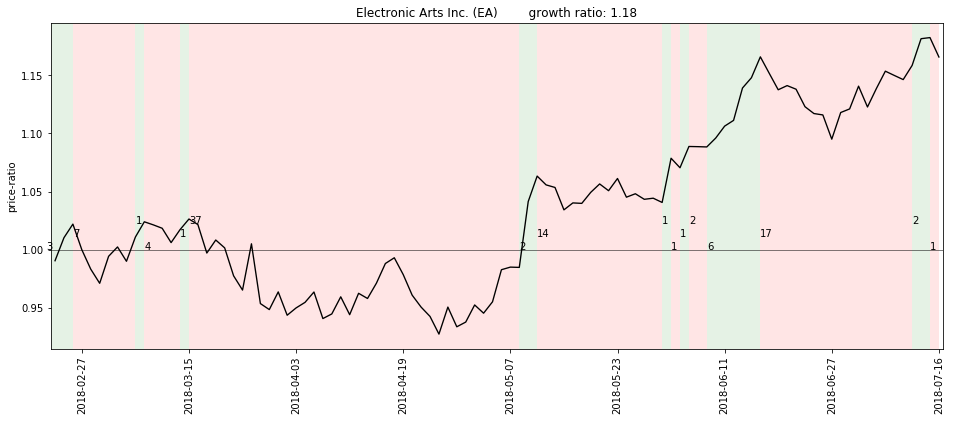

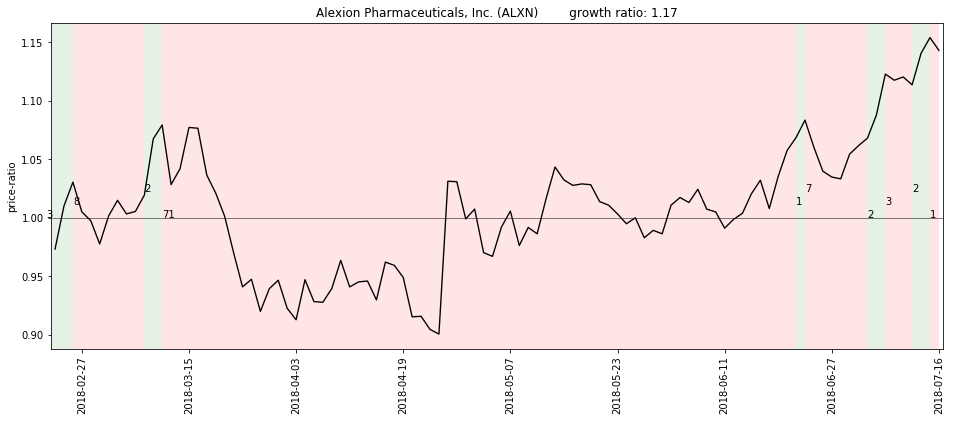

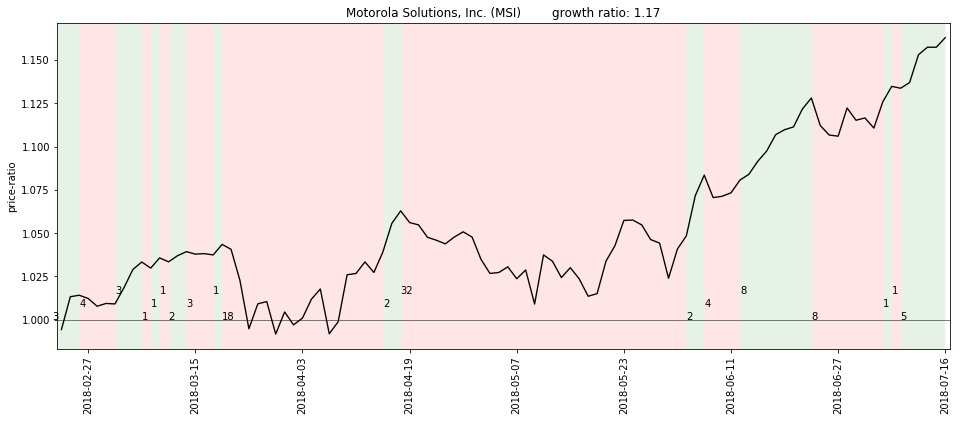

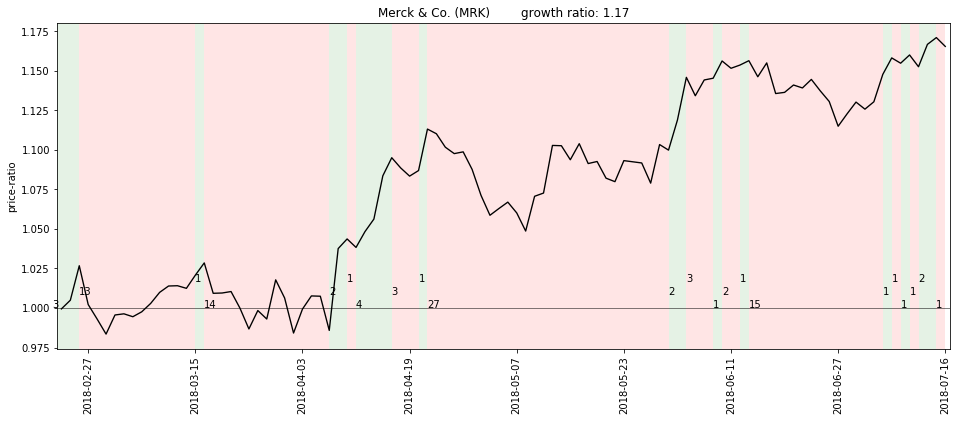

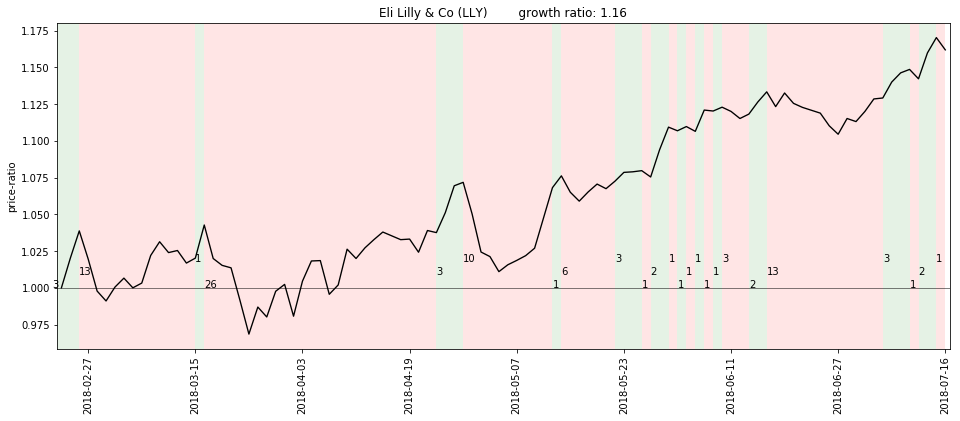

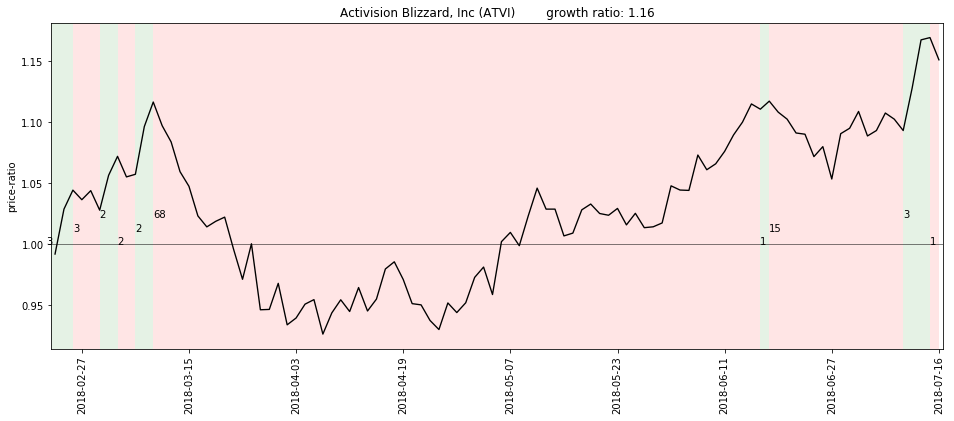

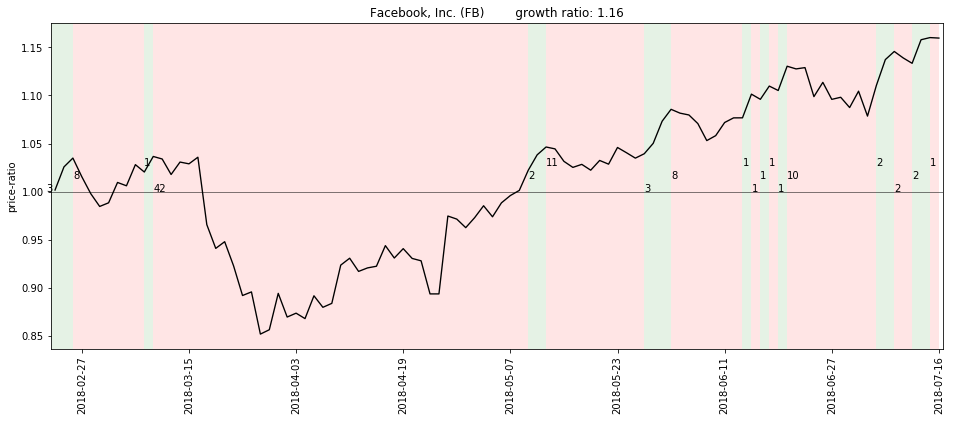

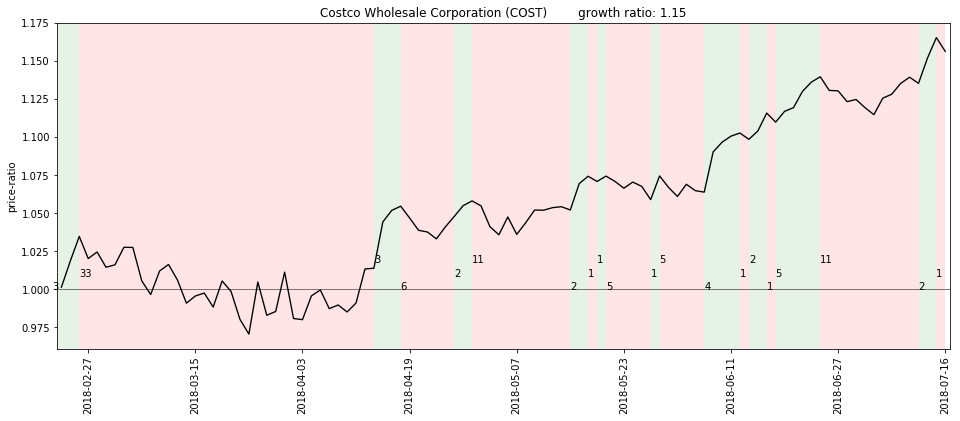

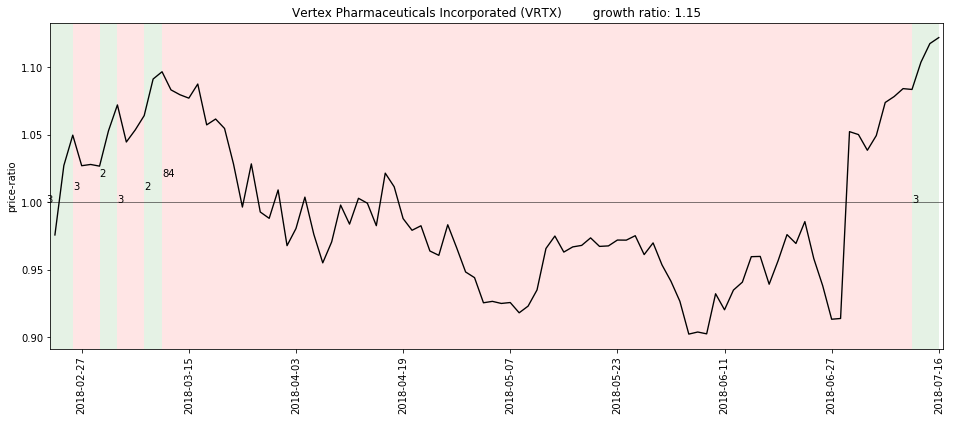

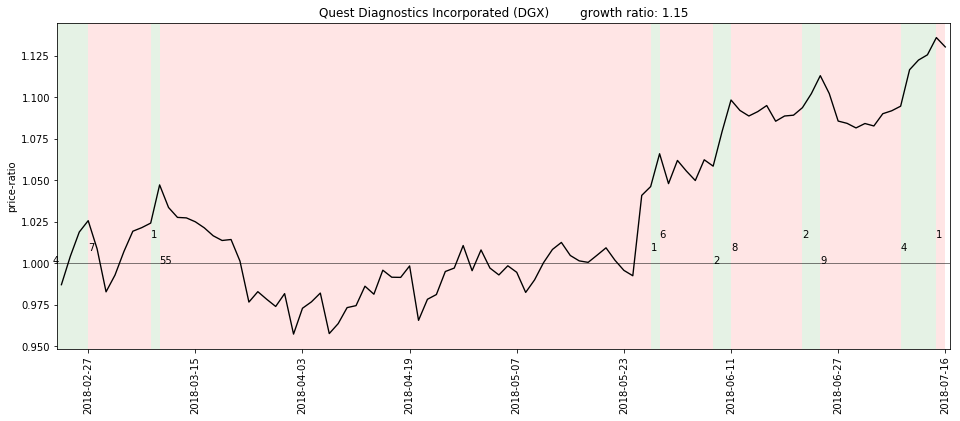

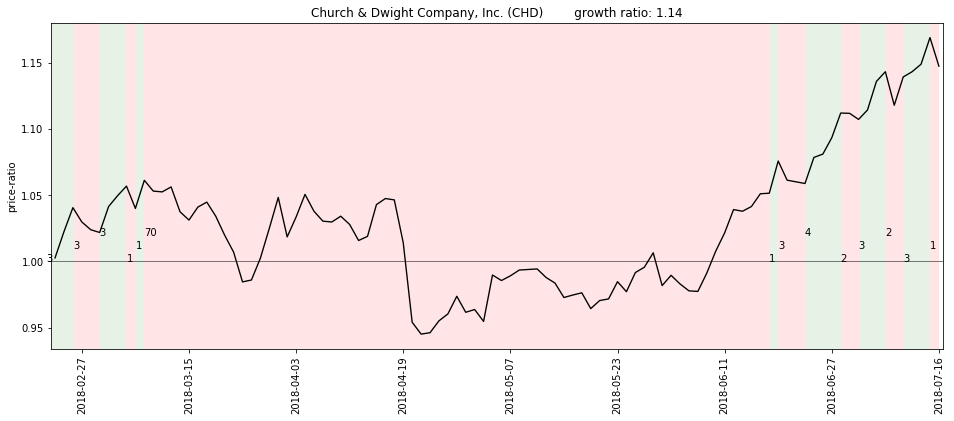

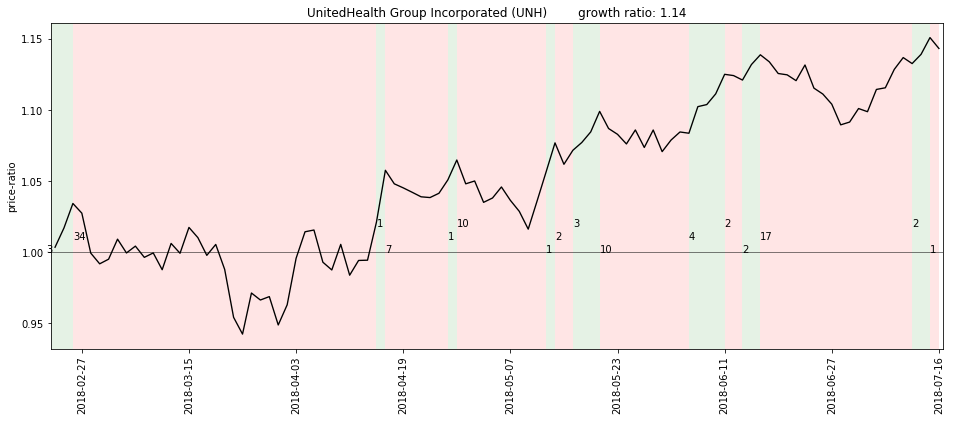

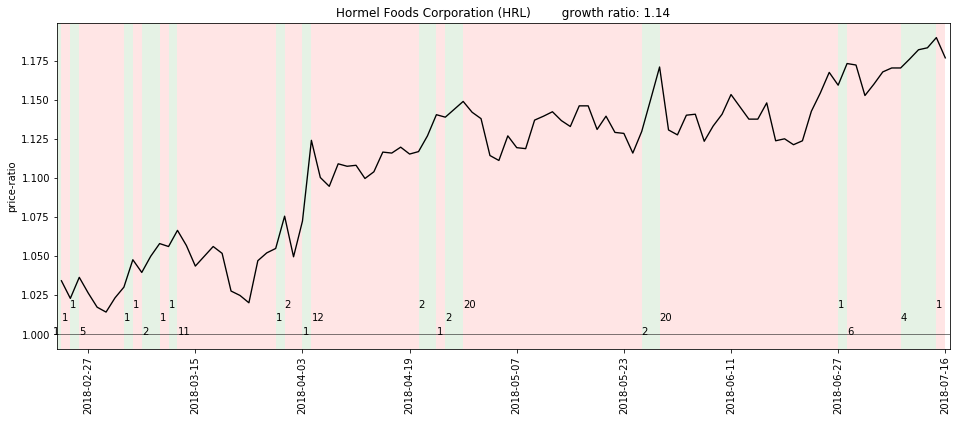

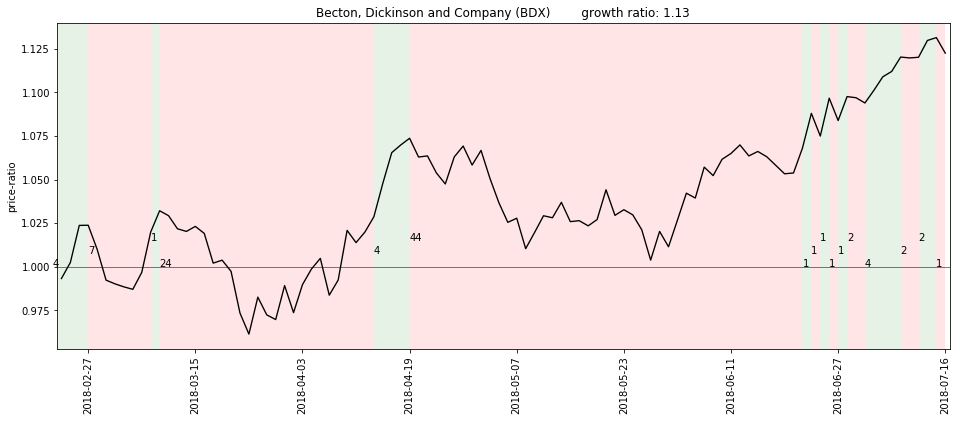

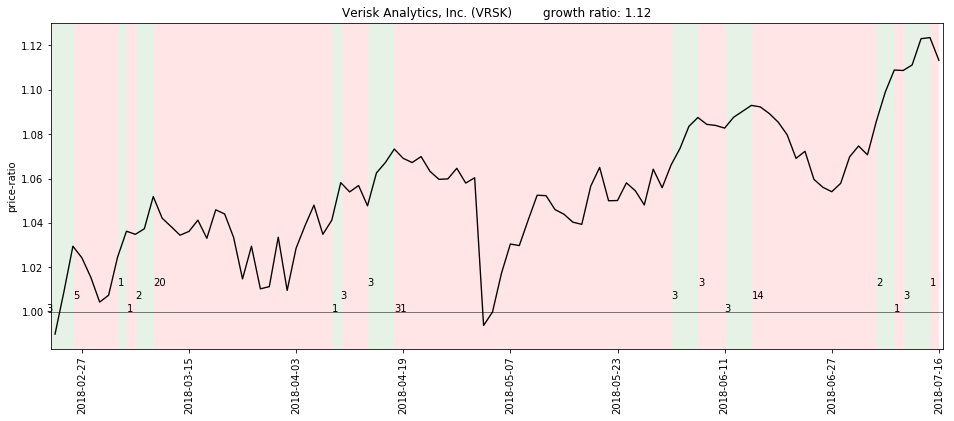

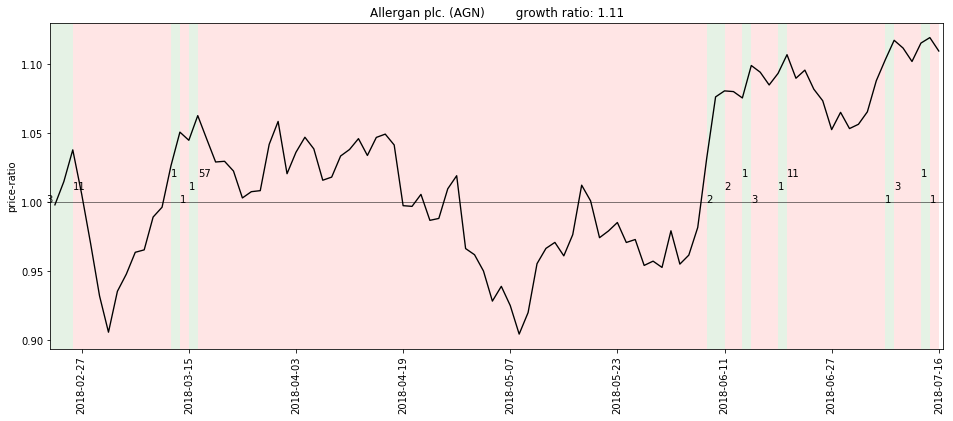

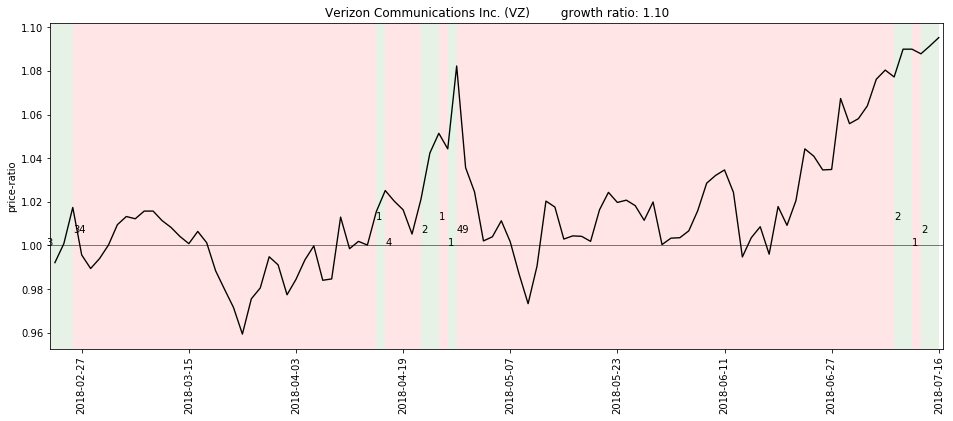

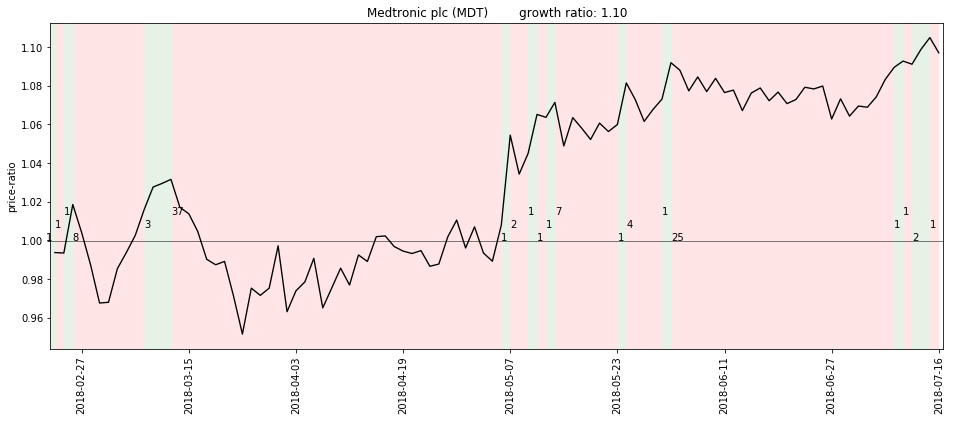

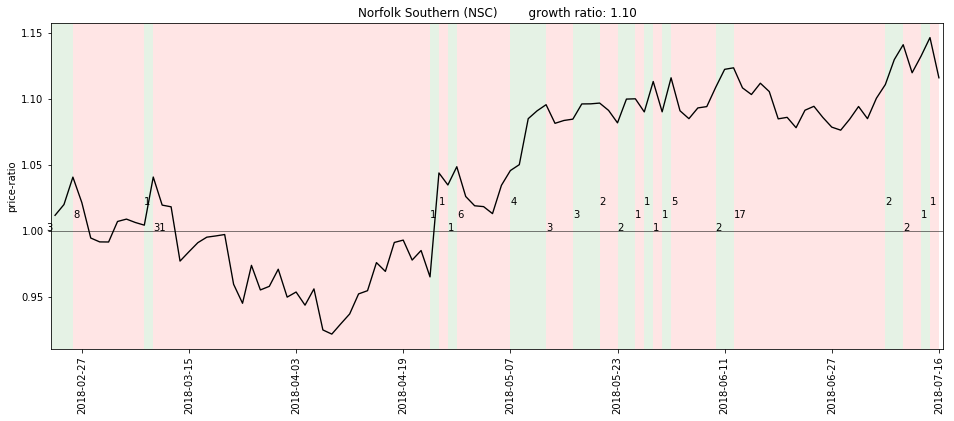

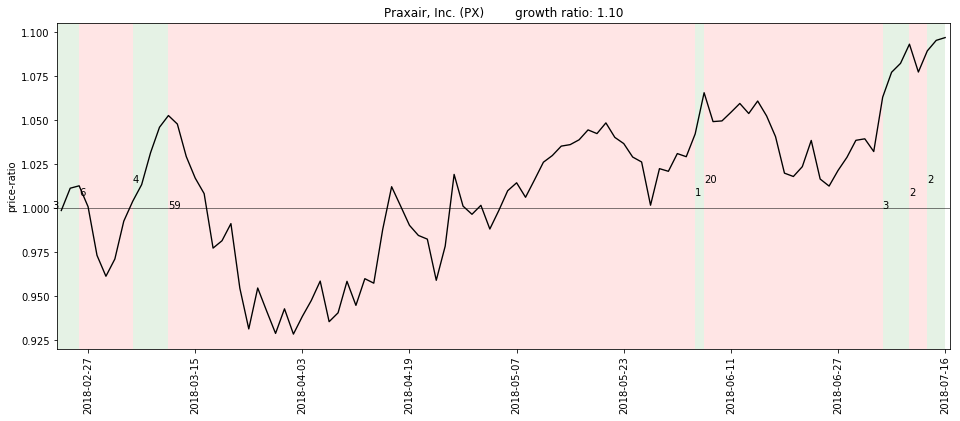

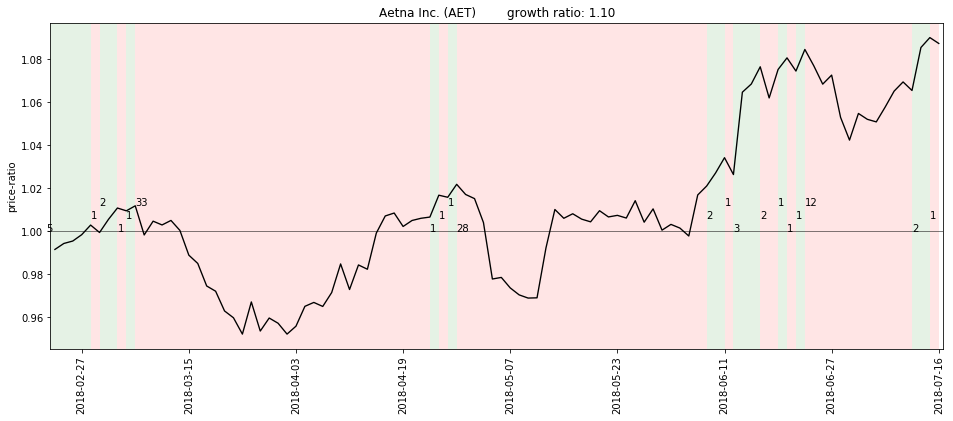

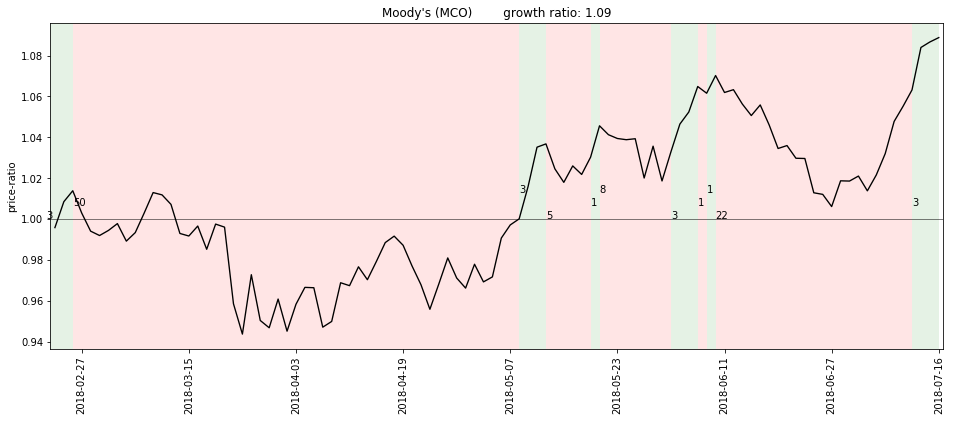

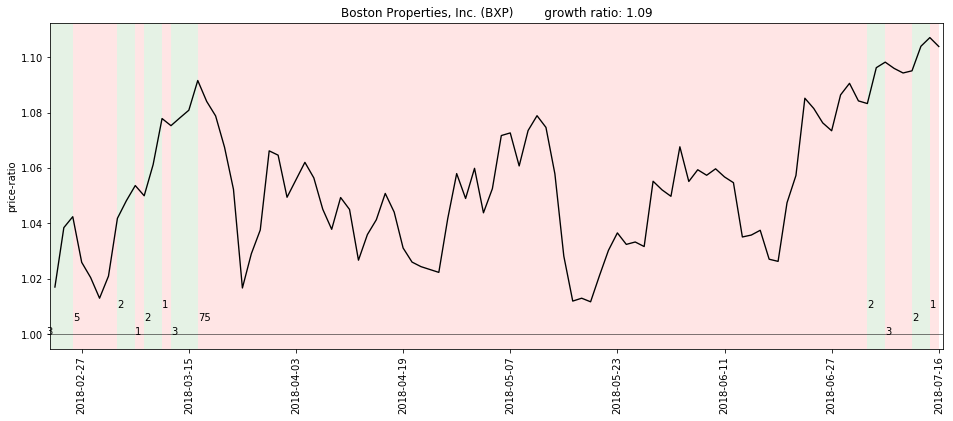

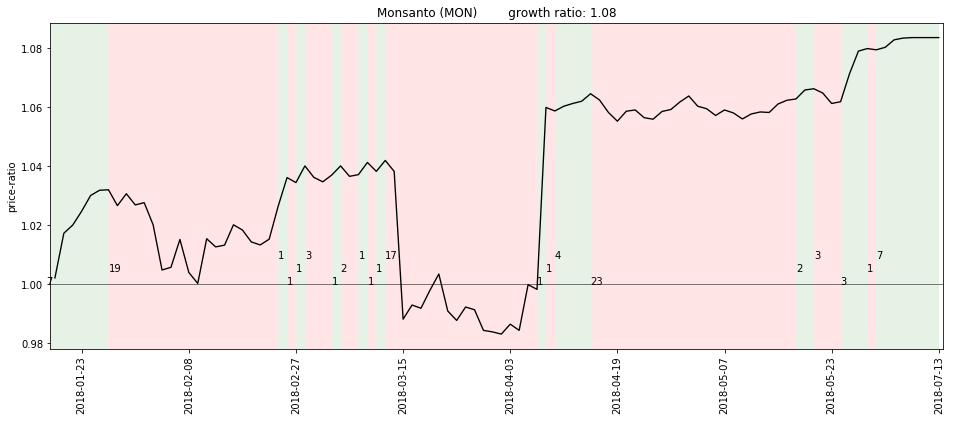

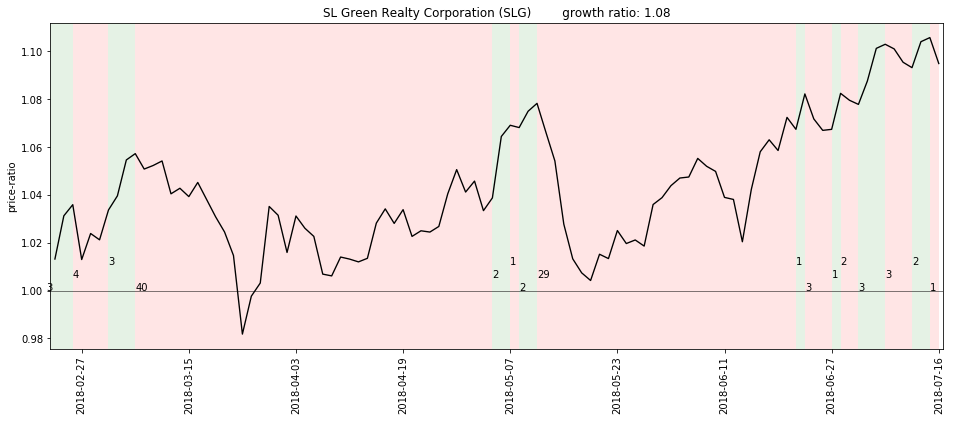

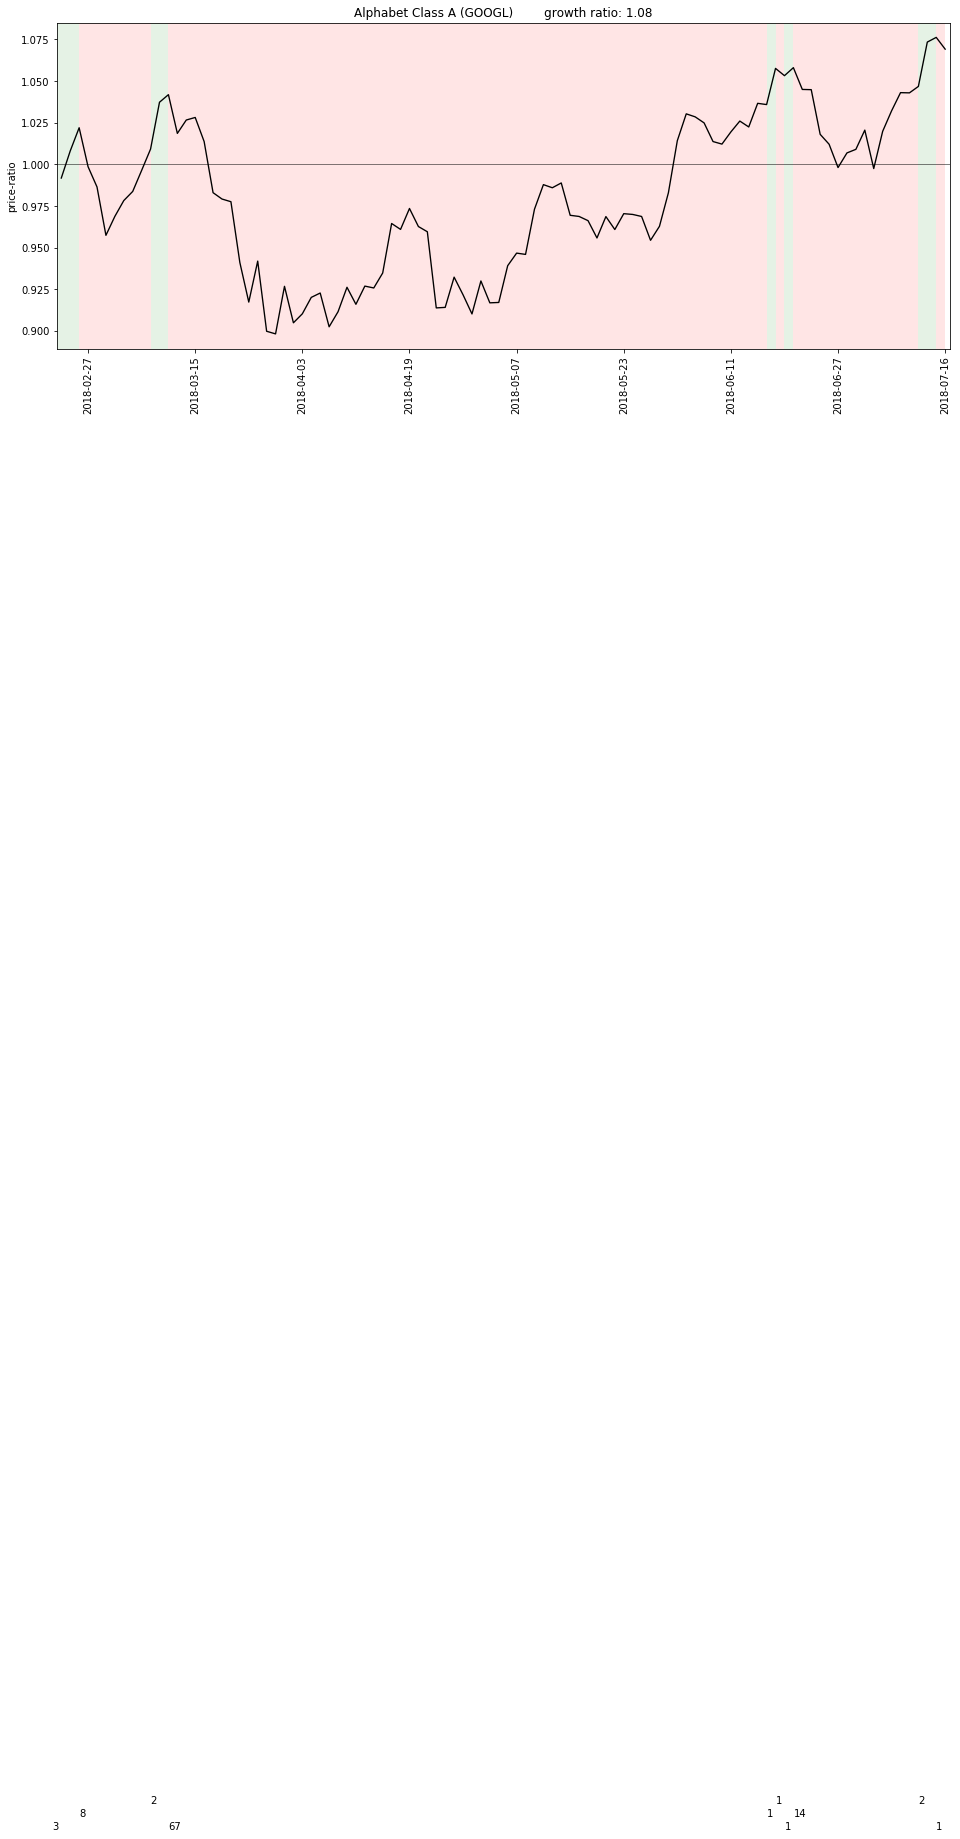

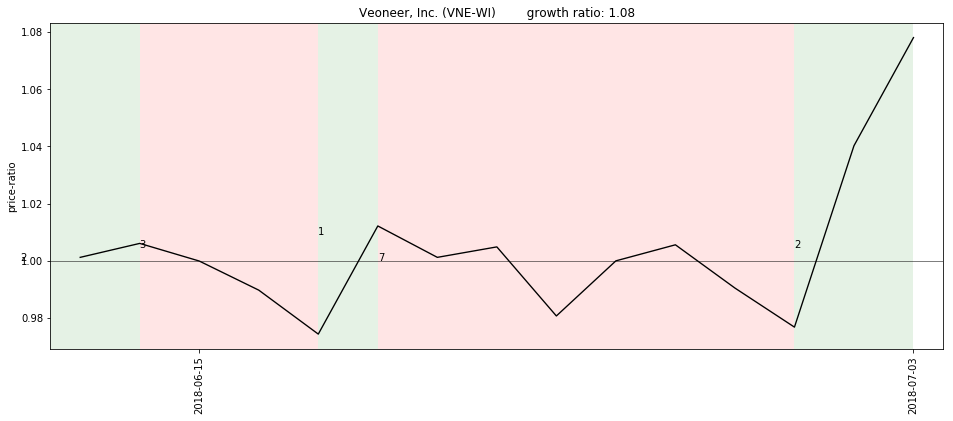

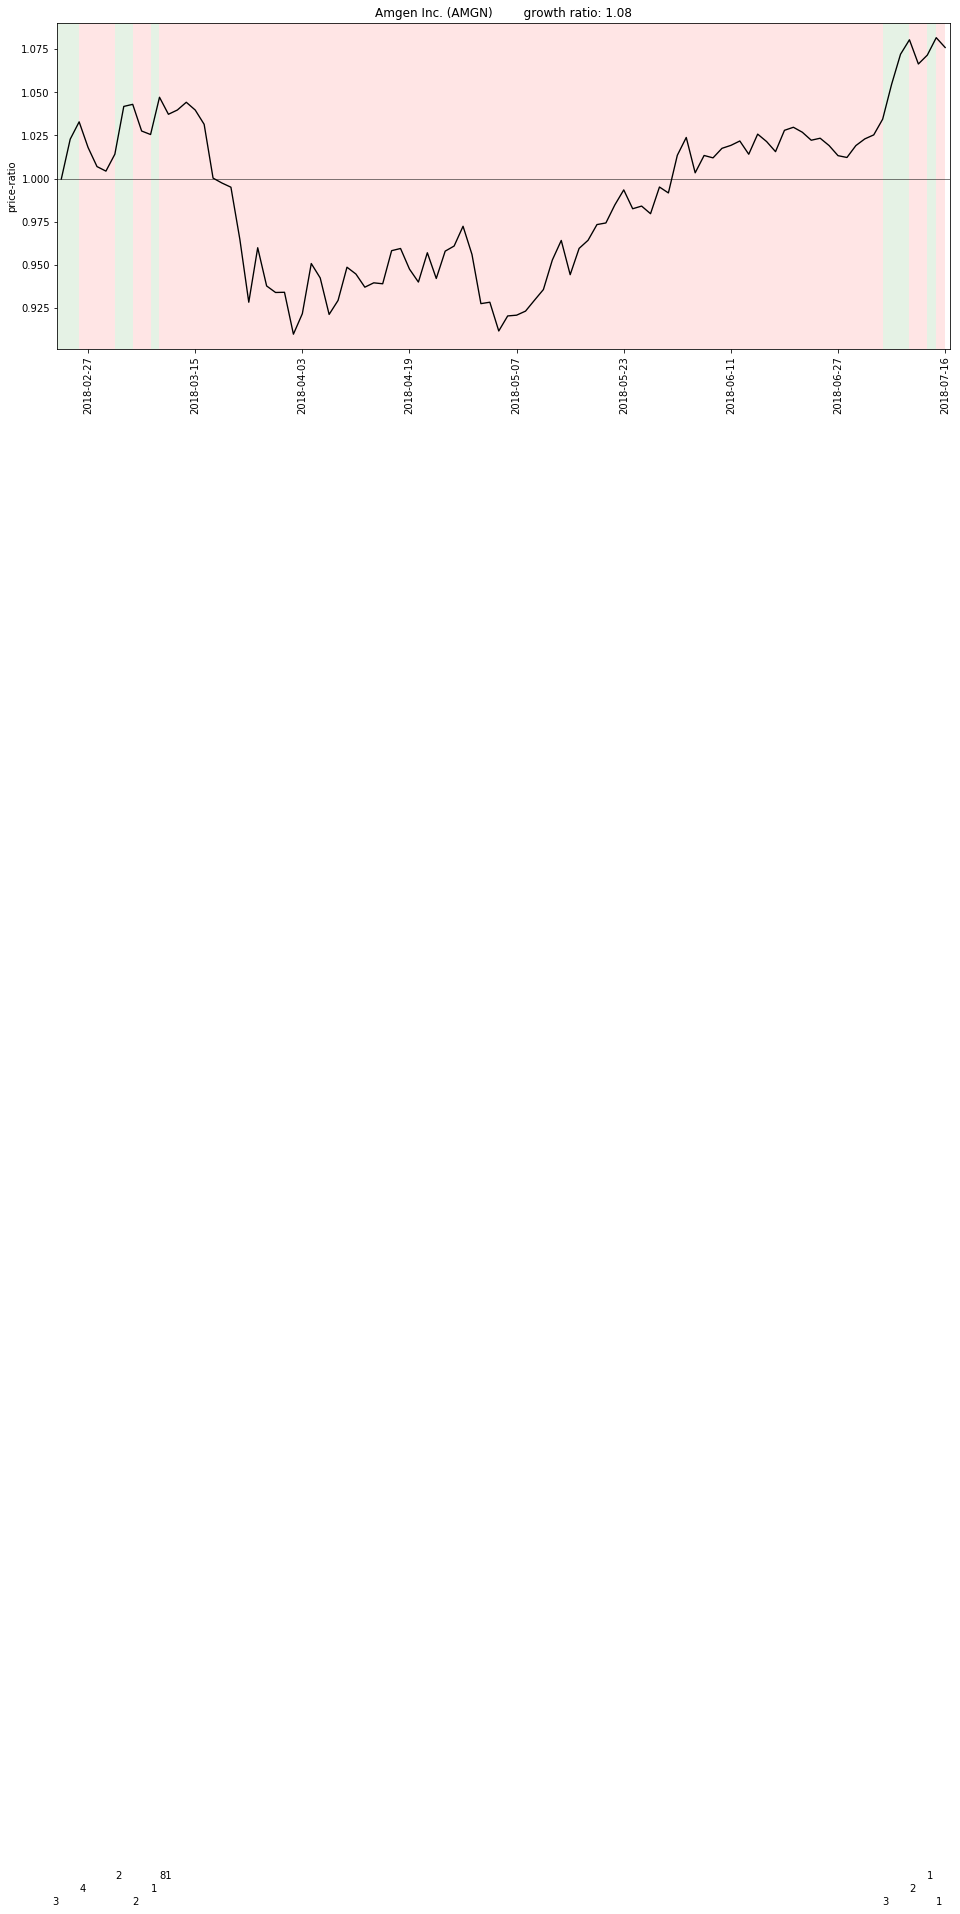

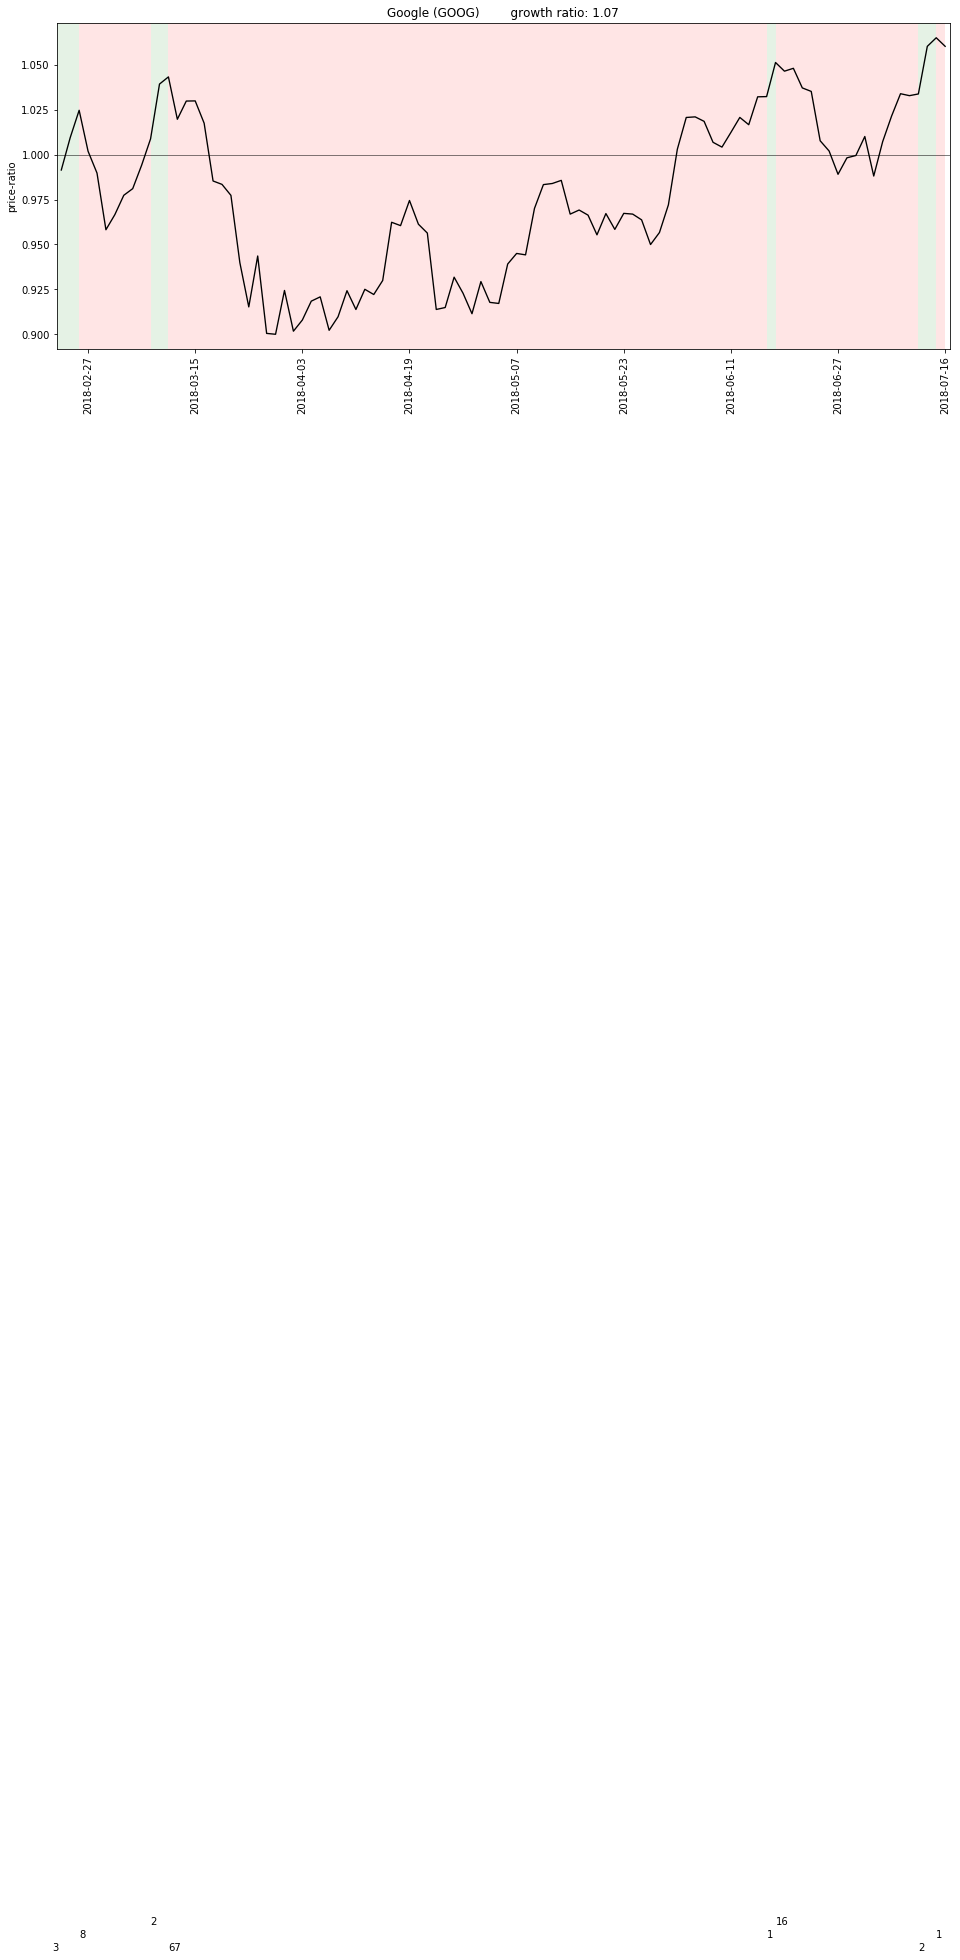

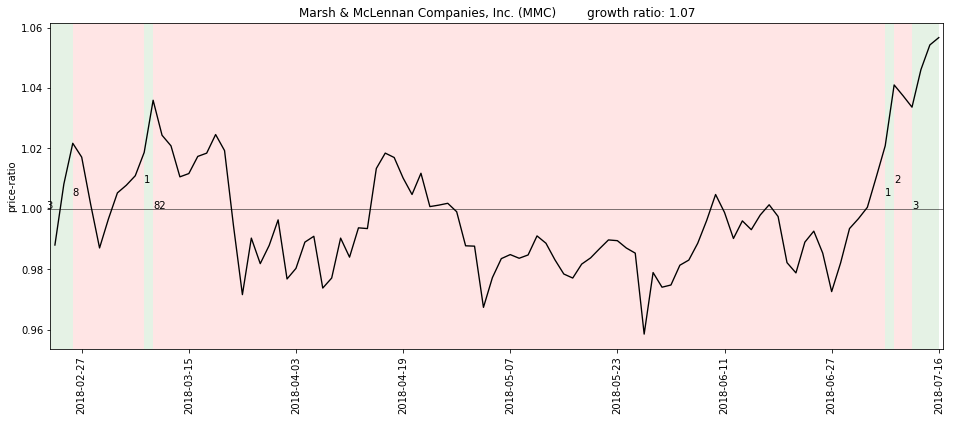

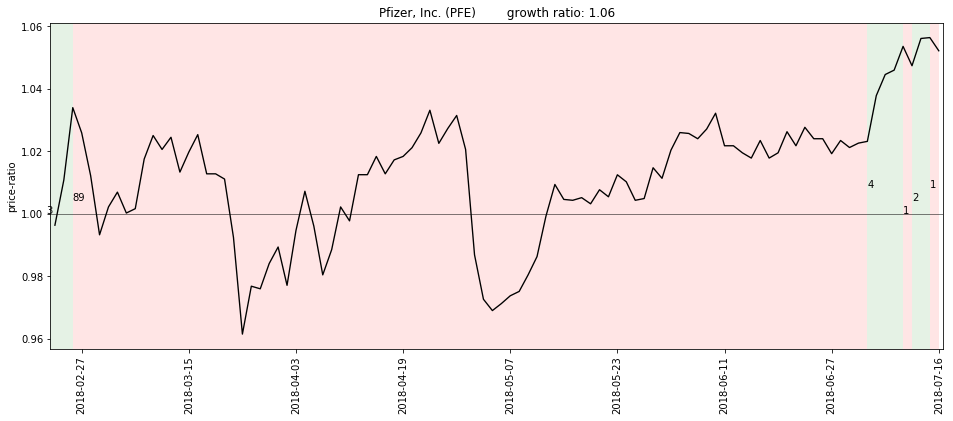

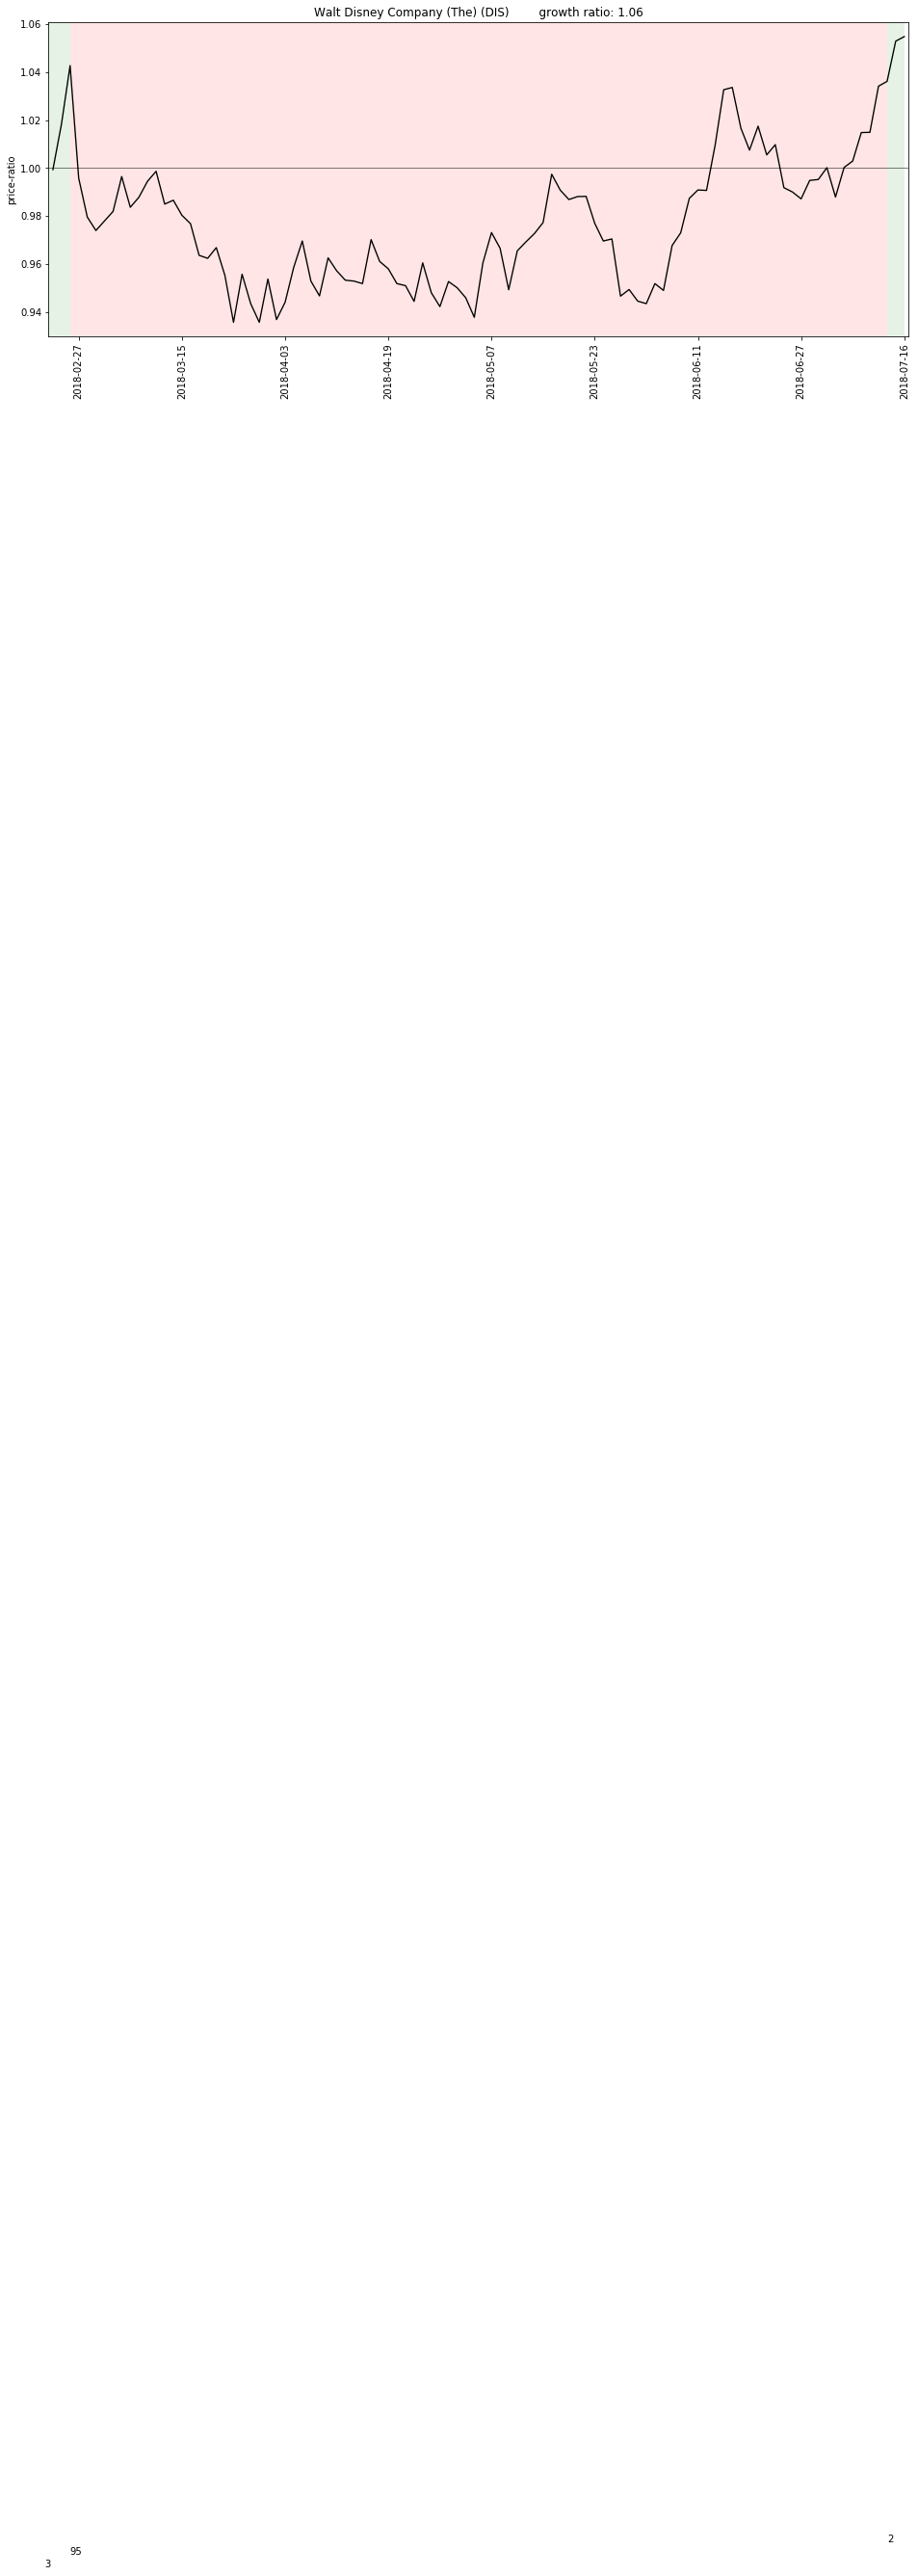

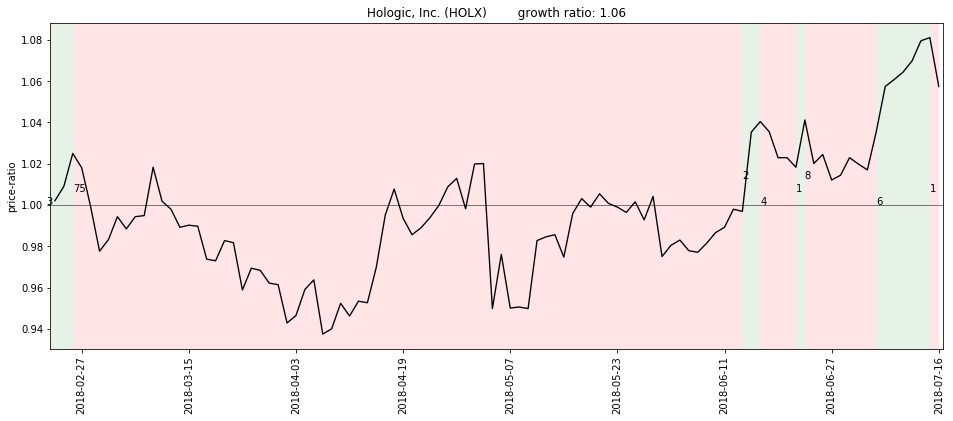

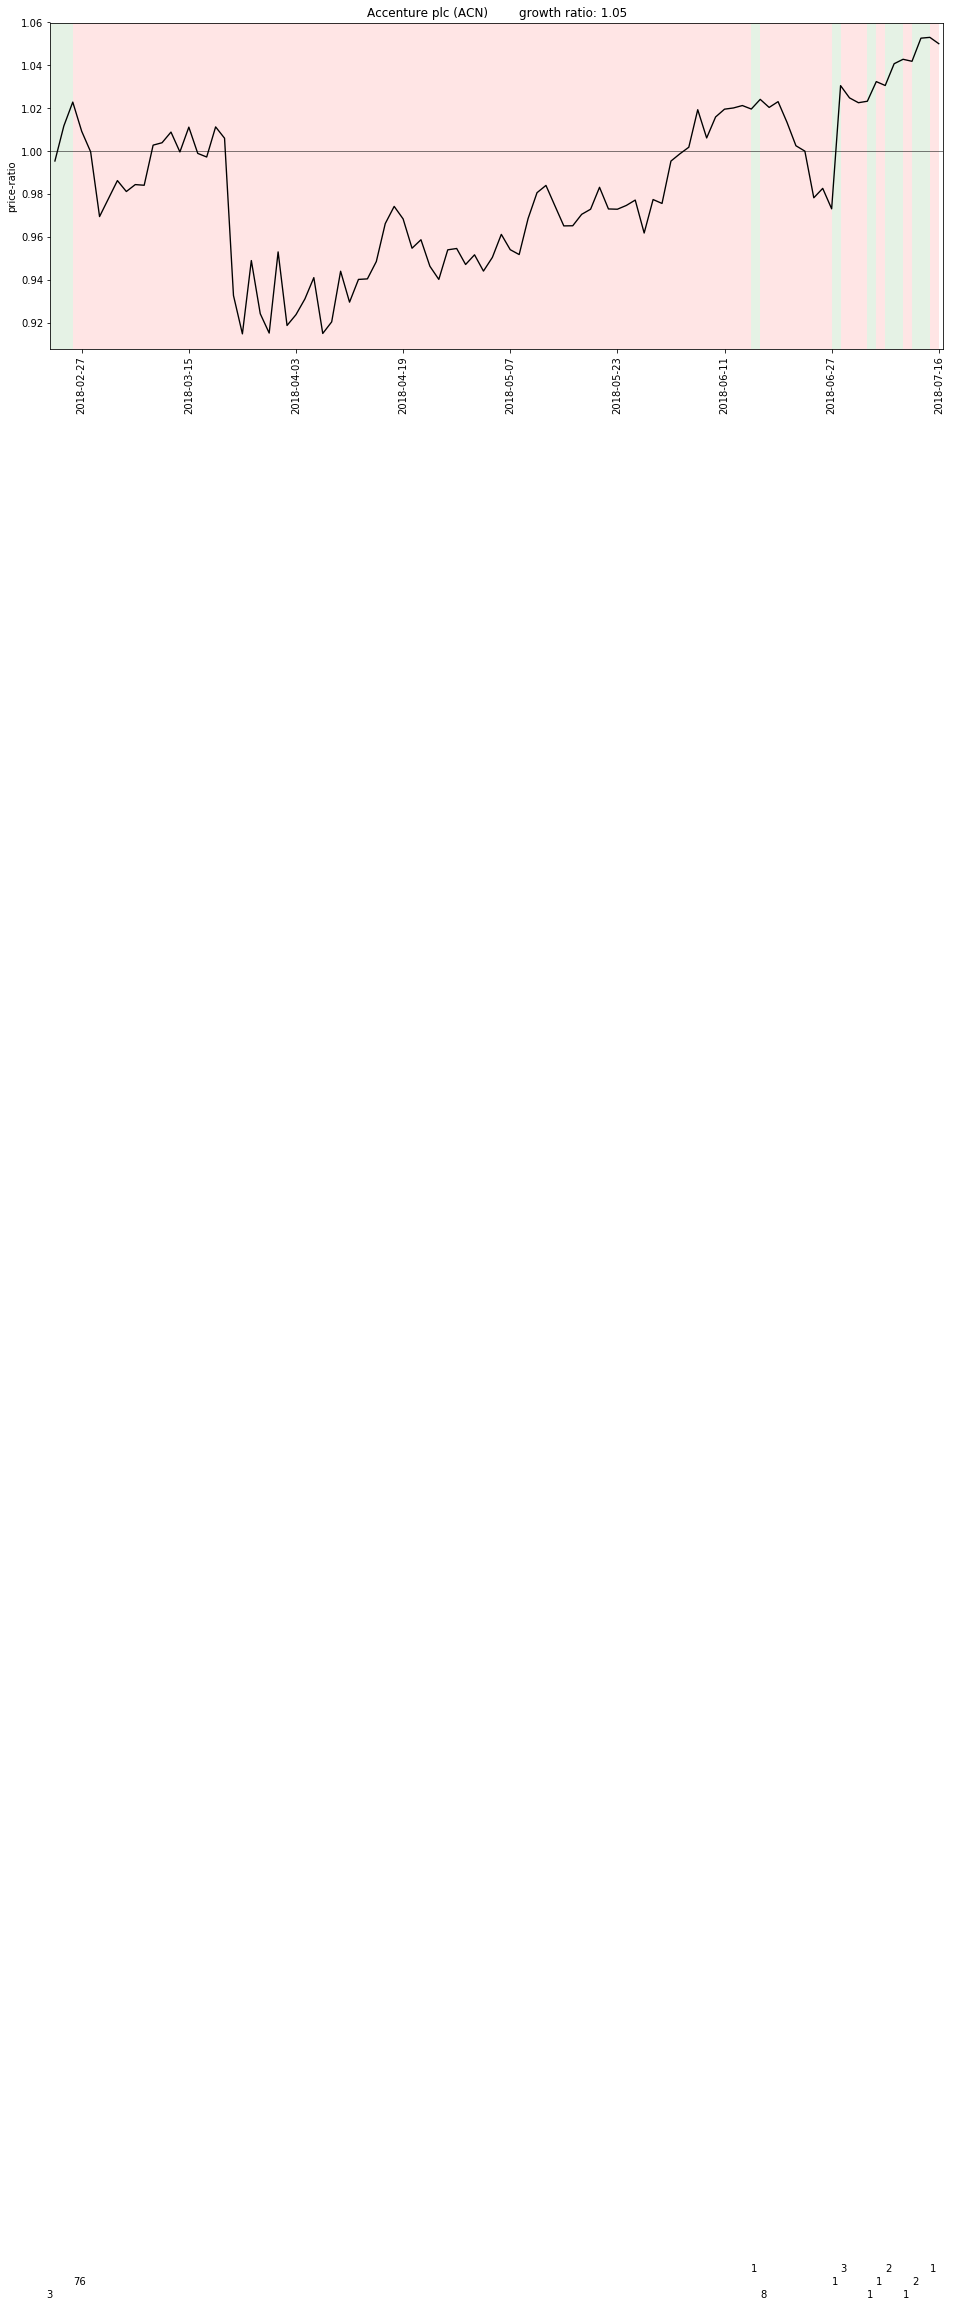

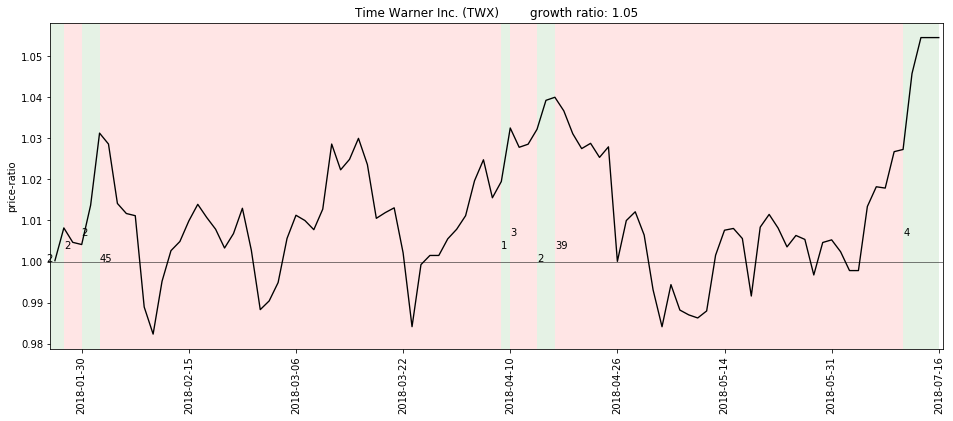

In [83]:
draw_symbols_sorted_by_price_growth(hist_per['all'], drop_period_eq_0.keys())

## Look at top-30 of symbols with fastest price growth in last year

price-drop: 0.78    drop-period: 76


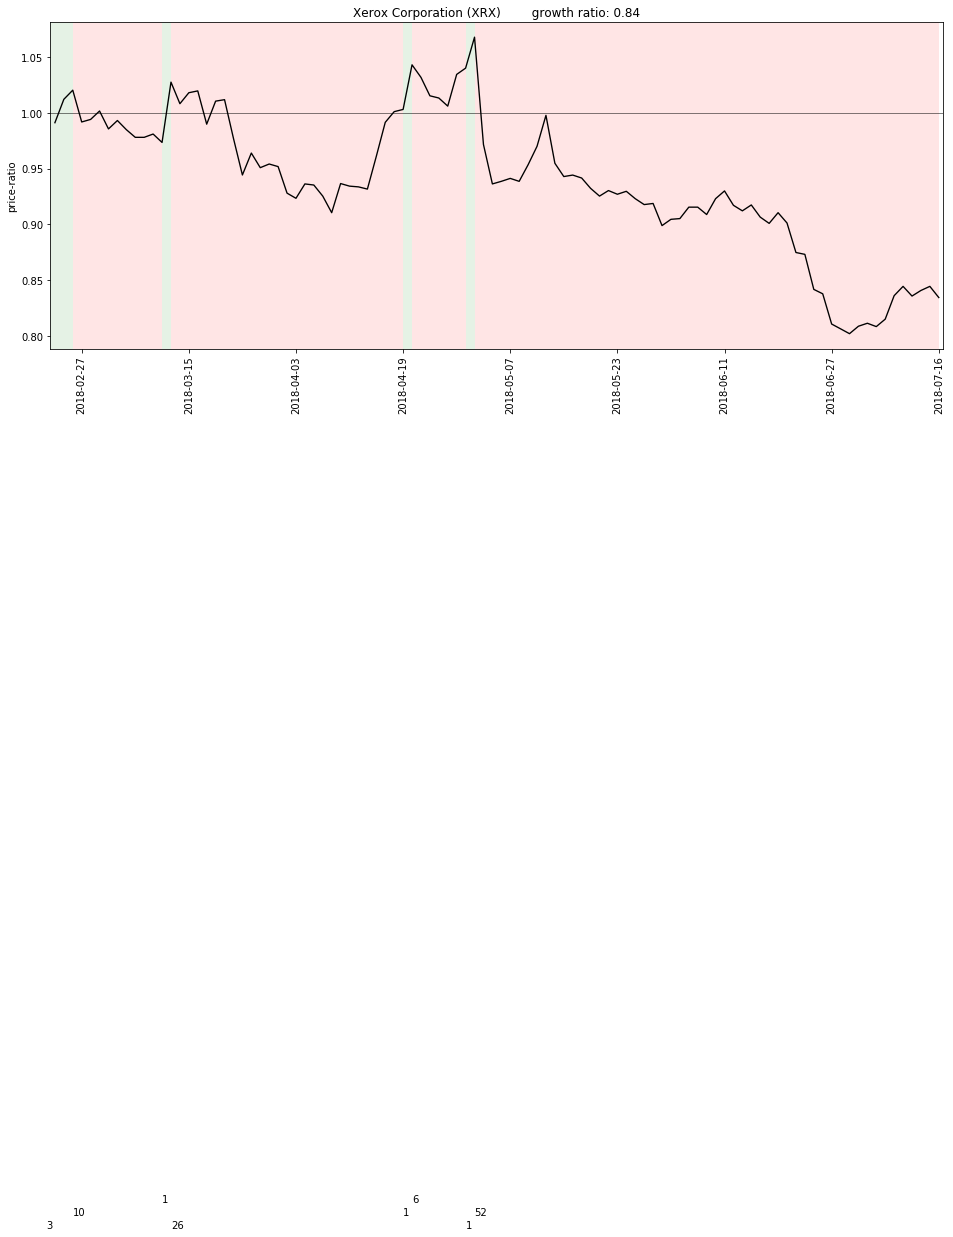

price-drop: 0.98    drop-period: 28


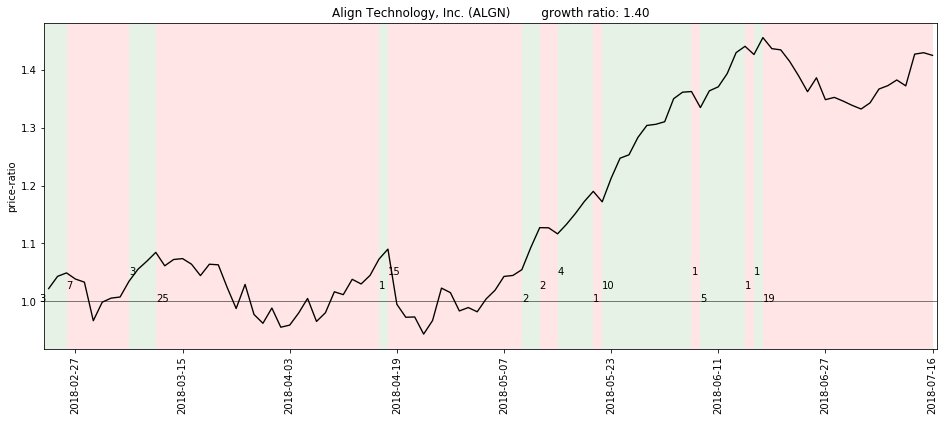

price-drop: 0.95    drop-period: 32


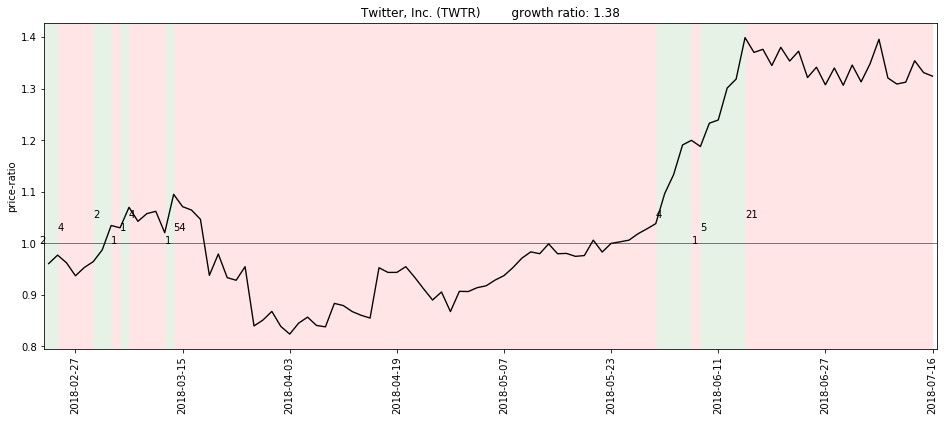

price-drop: 0.96    drop-period: 7


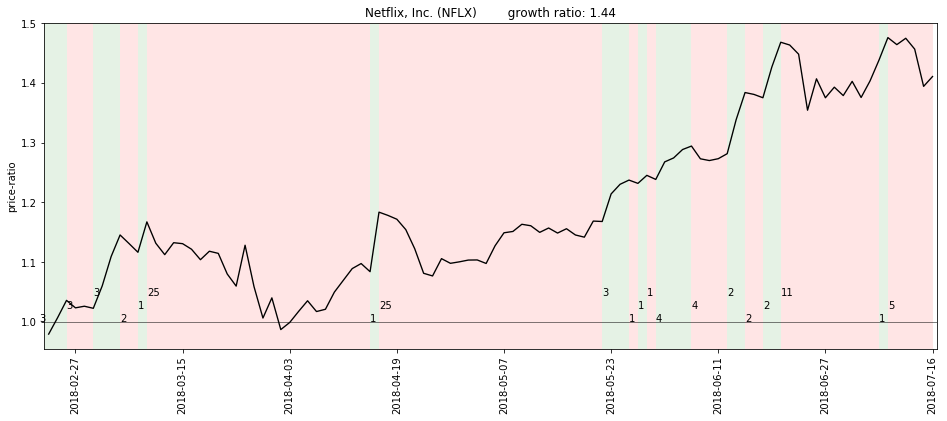

price-drop: 0.93    drop-period: 34


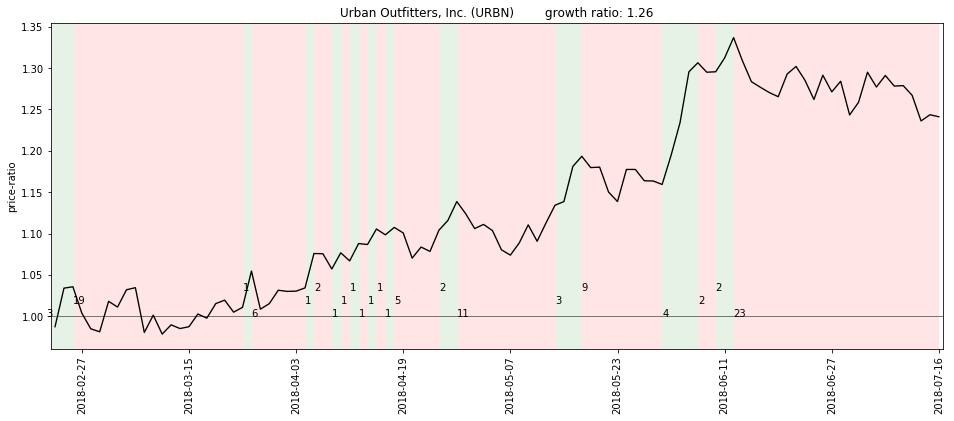

price-drop: 0.99    drop-period: 3


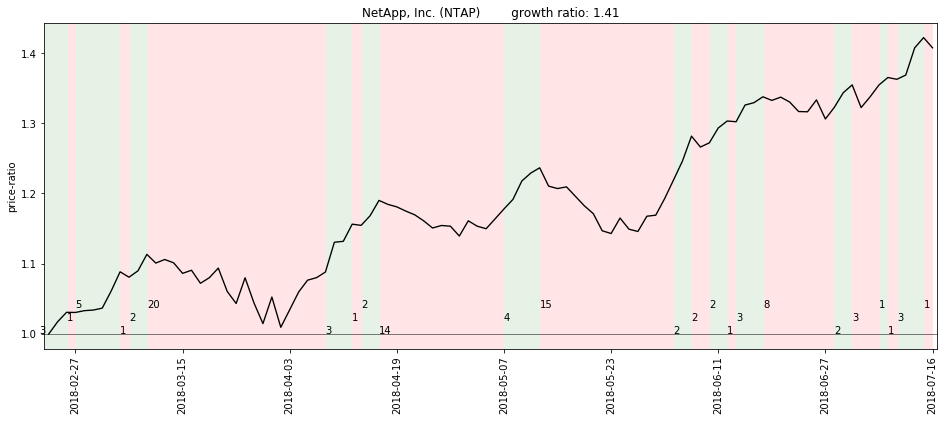

price-drop: 0.97    drop-period: 80


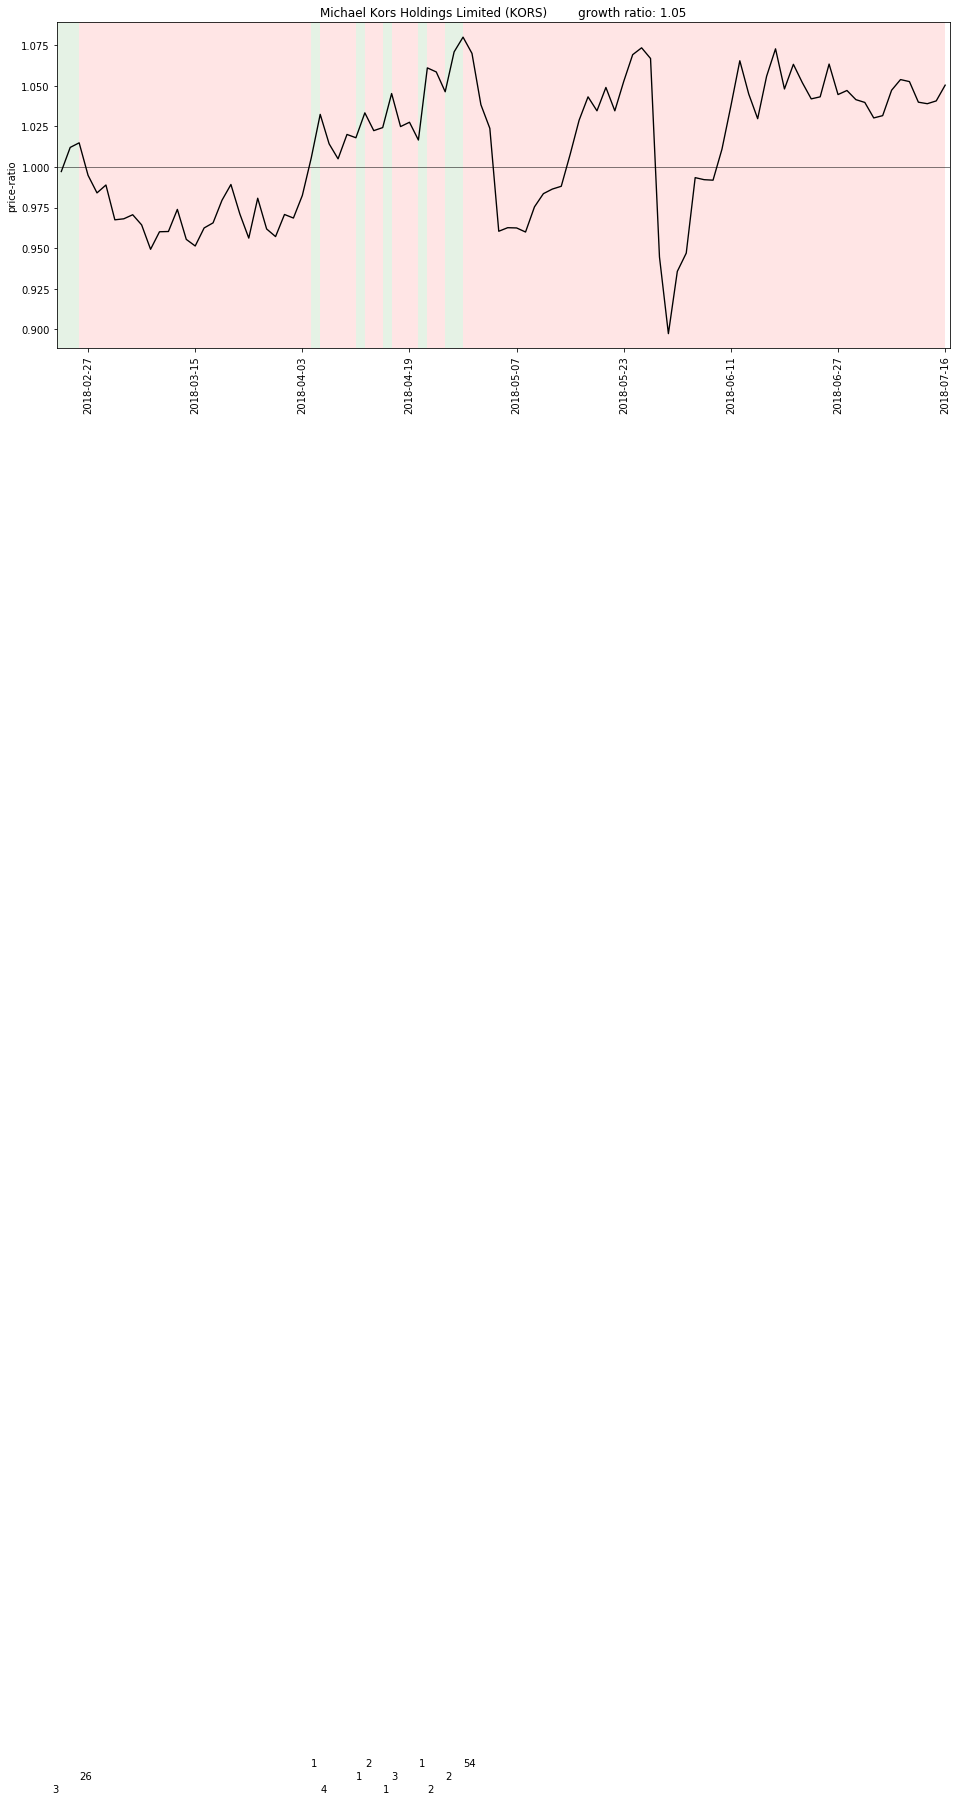

price-drop: 0.92    drop-period: 66


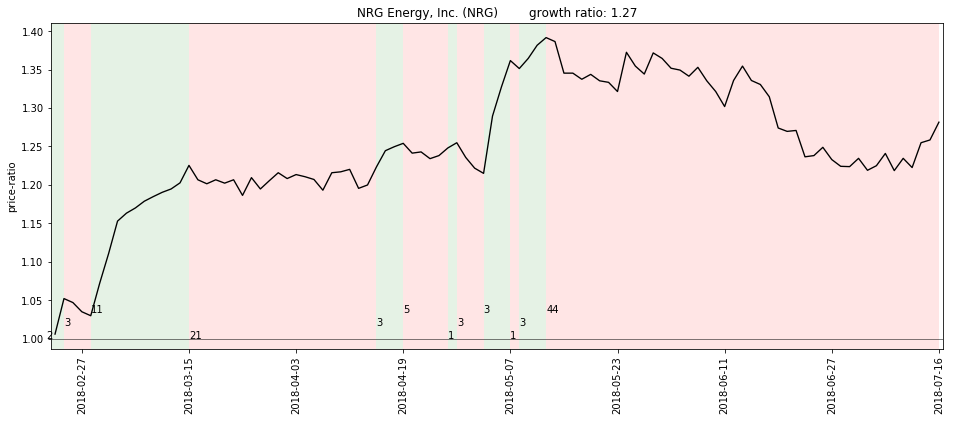

price-drop: 0.96    drop-period: 40


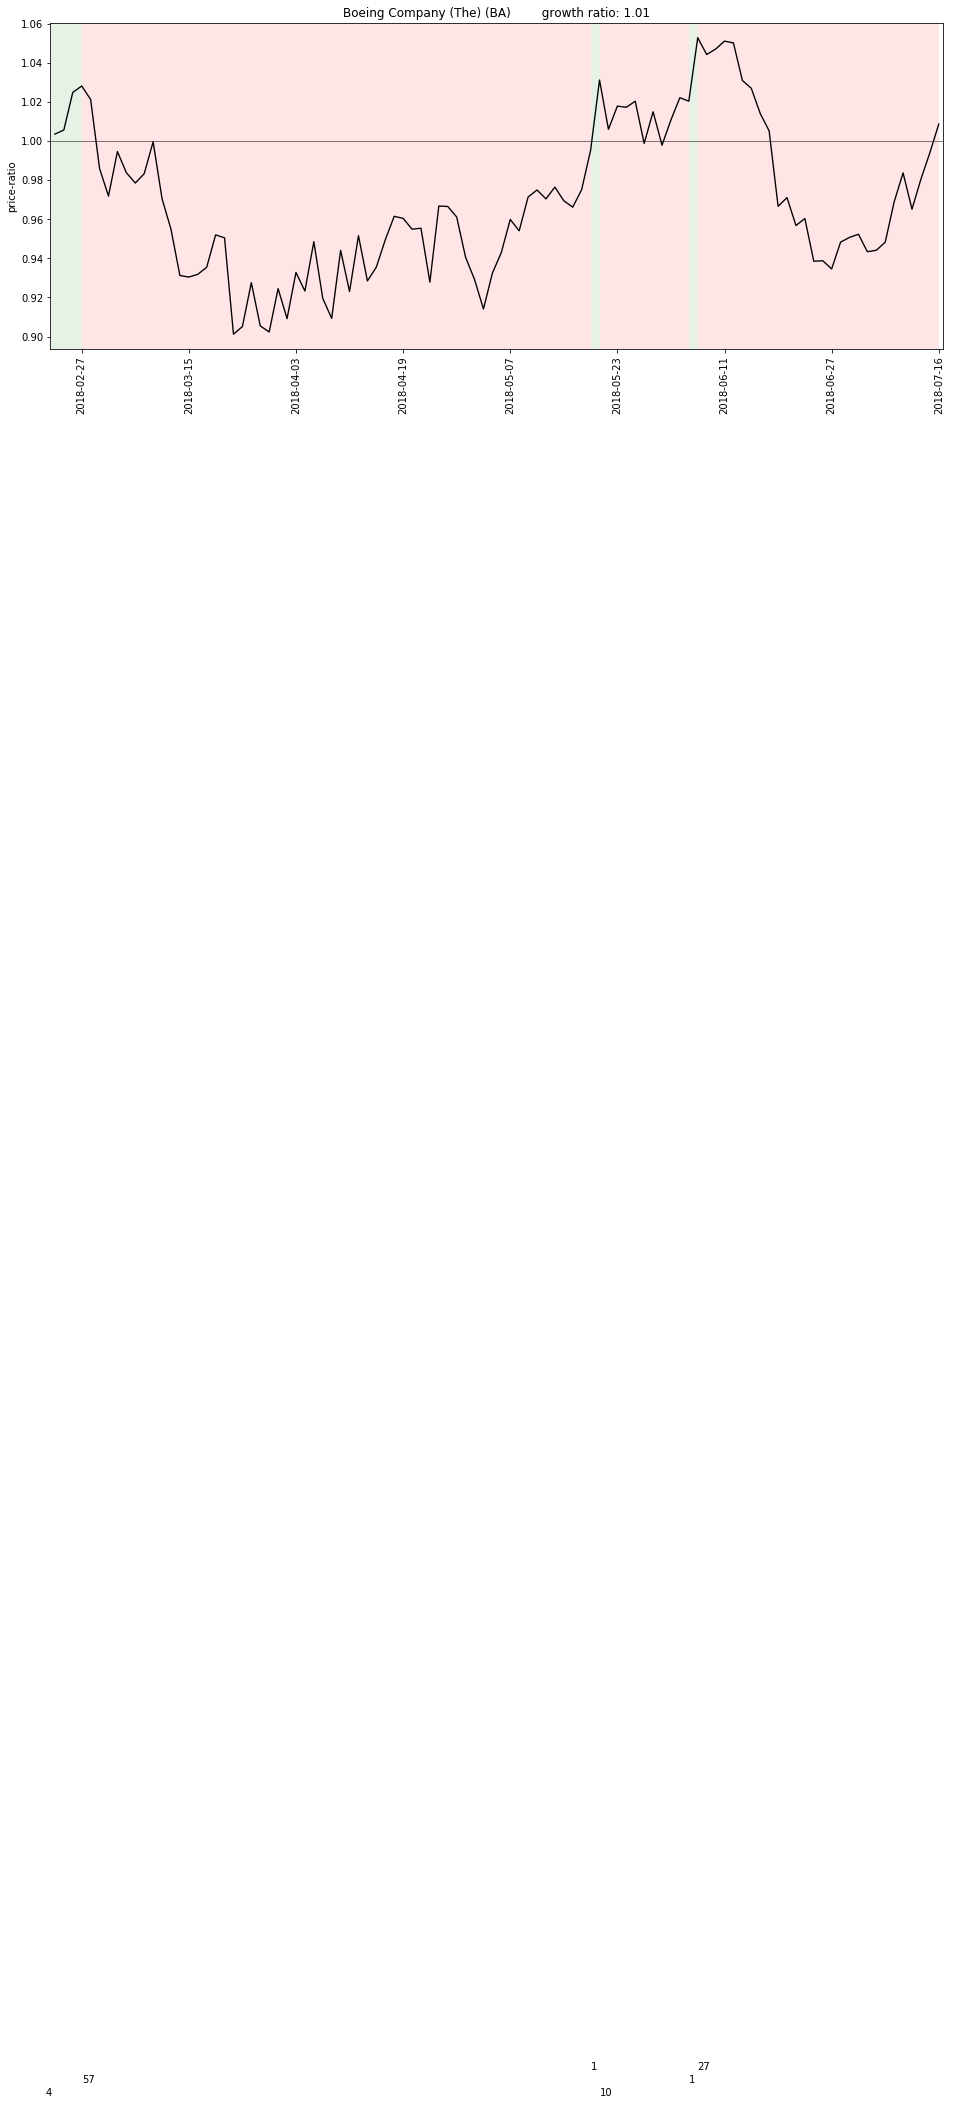

price-drop: 0.91    drop-period: 34


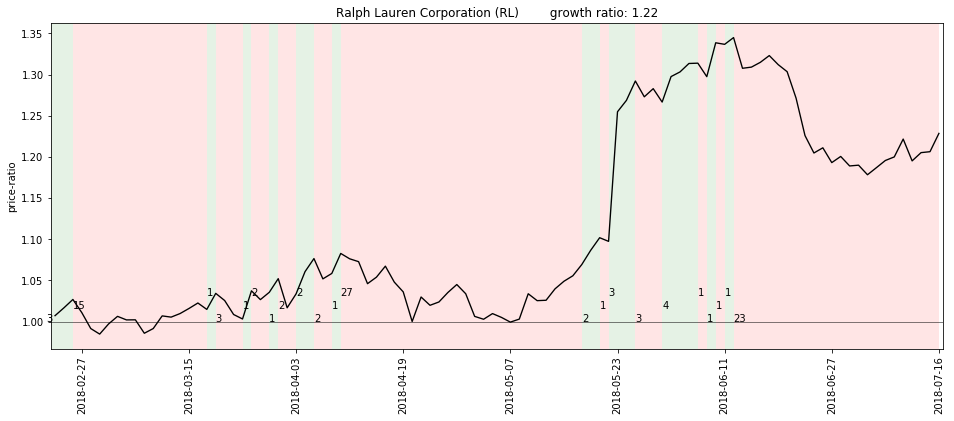

price-drop: 0.99    drop-period: 3


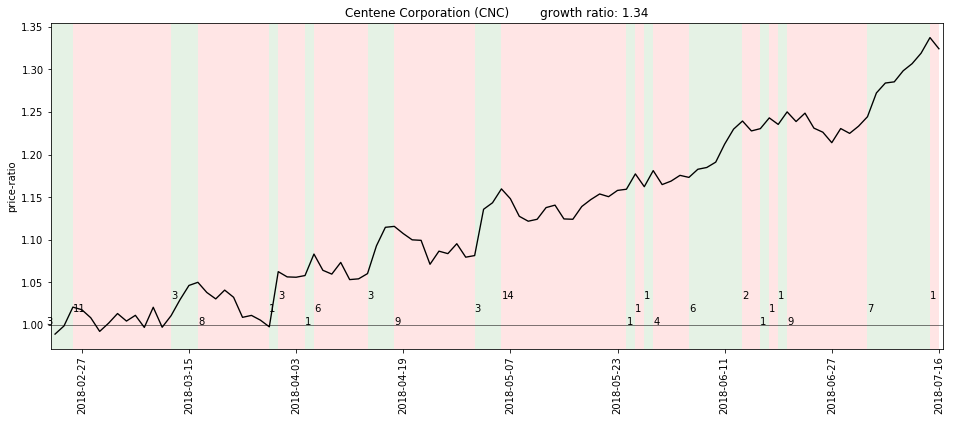

price-drop: 0.95    drop-period: 31


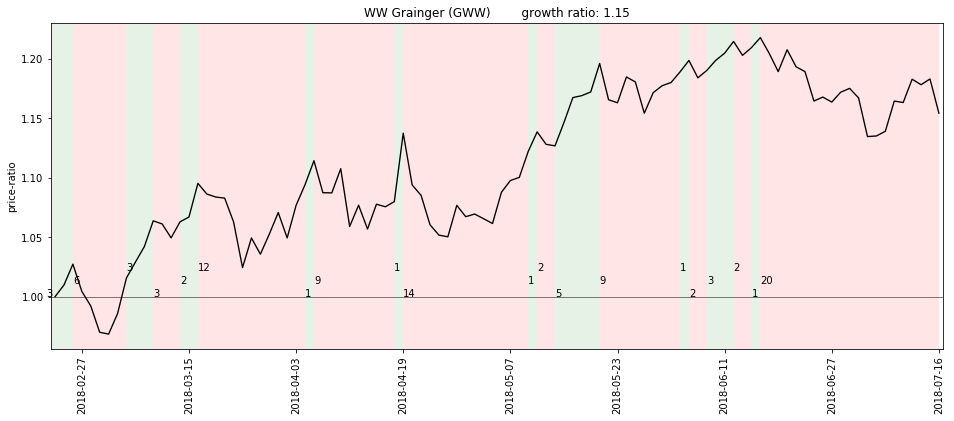

price-drop: 0.90    drop-period: 48


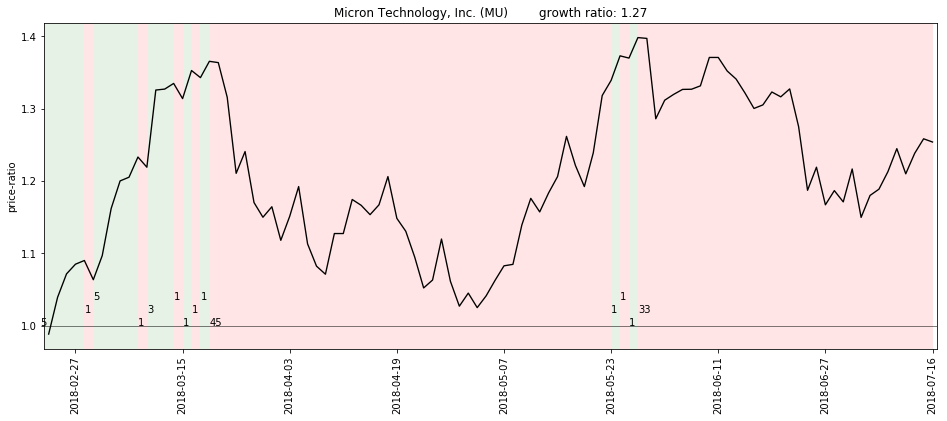

price-drop: 0.98    drop-period: 3


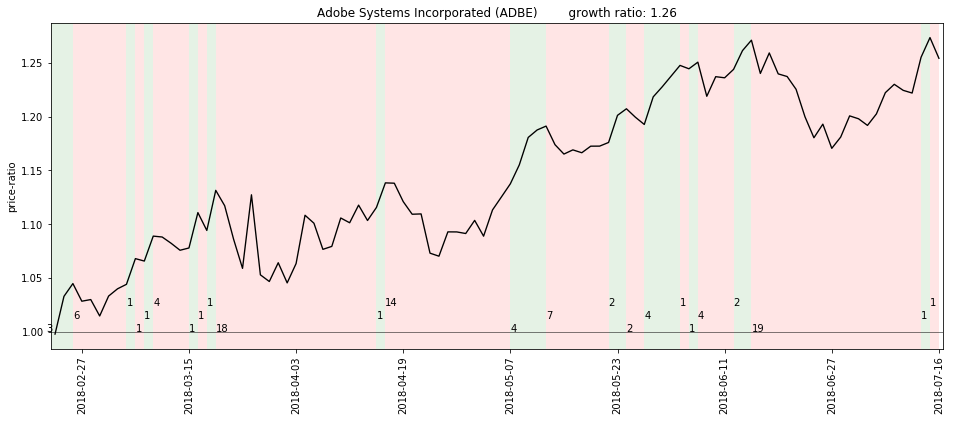

price-drop: 1.00    drop-period: 0


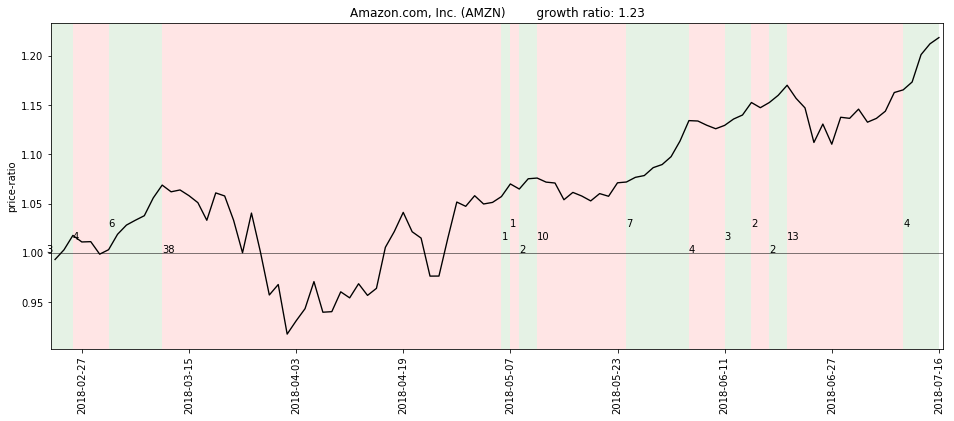

price-drop: 0.85    drop-period: 42


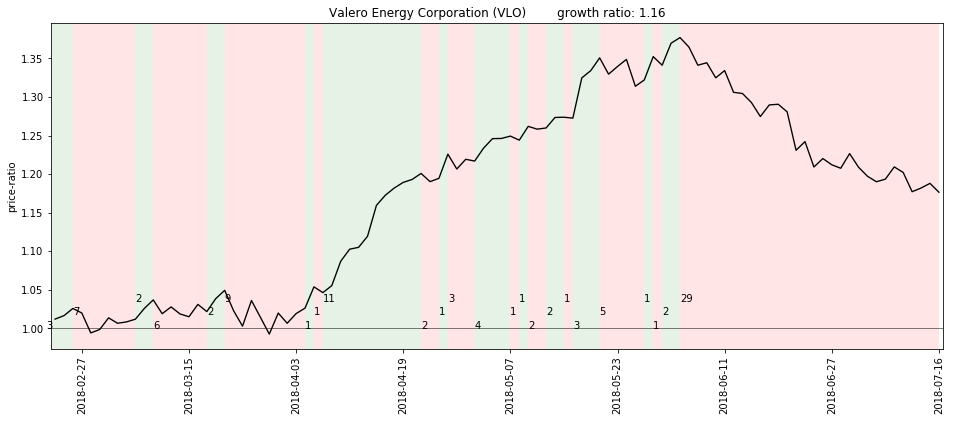

price-drop: 0.94    drop-period: 6


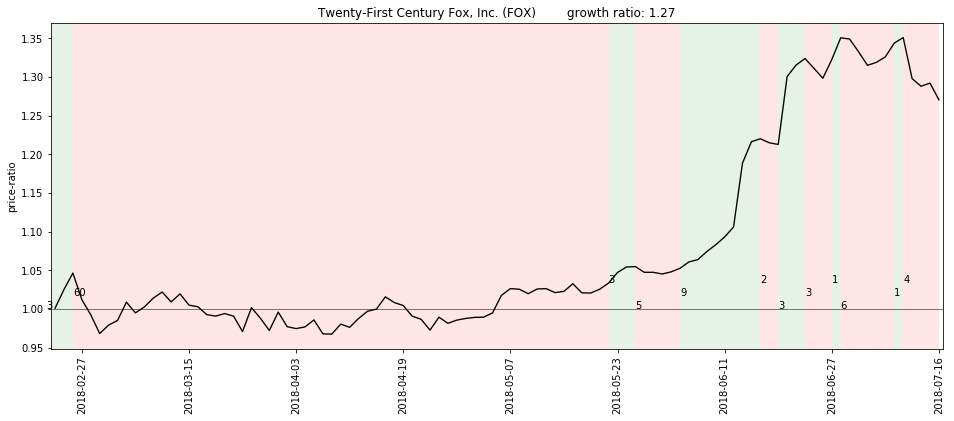

price-drop: 0.94    drop-period: 18


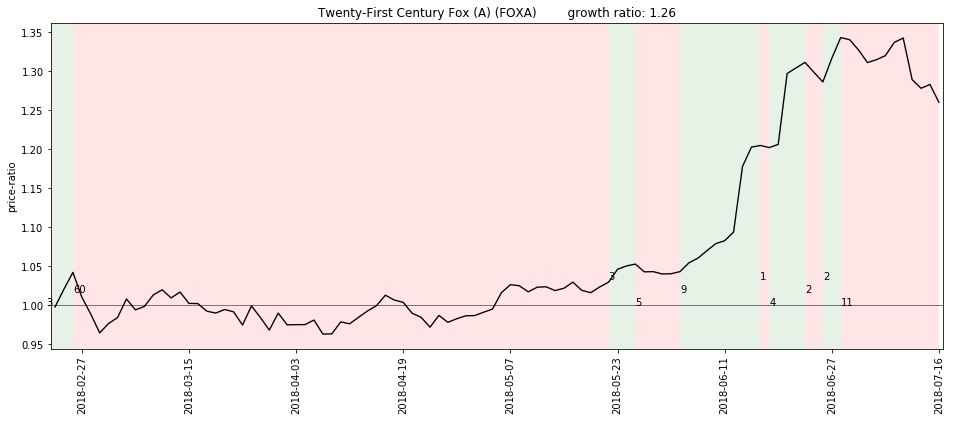

price-drop: 0.98    drop-period: 3


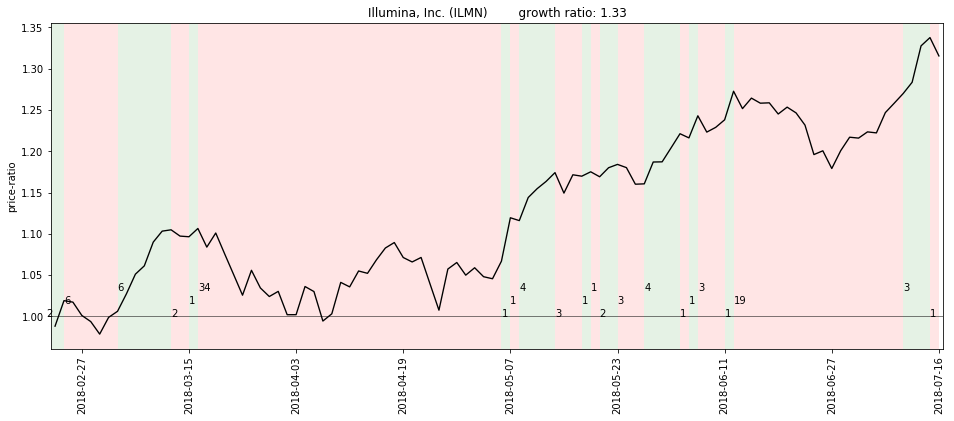

price-drop: 0.96    drop-period: 34


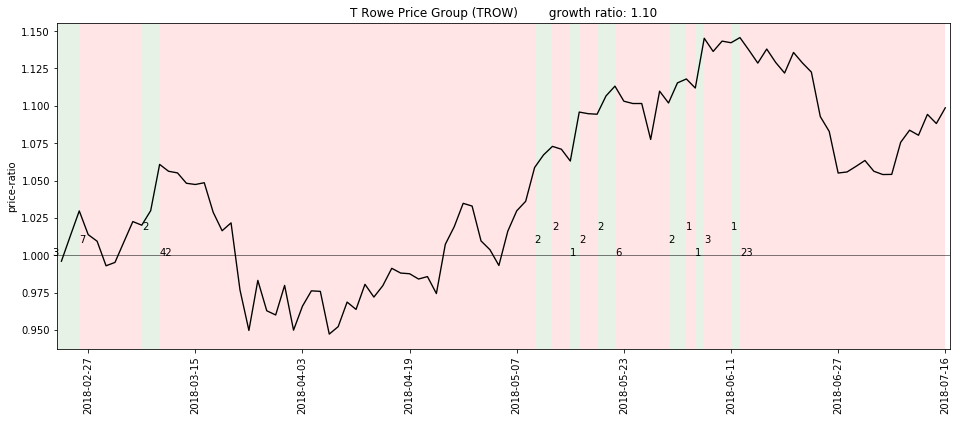

price-drop: 0.93    drop-period: 32


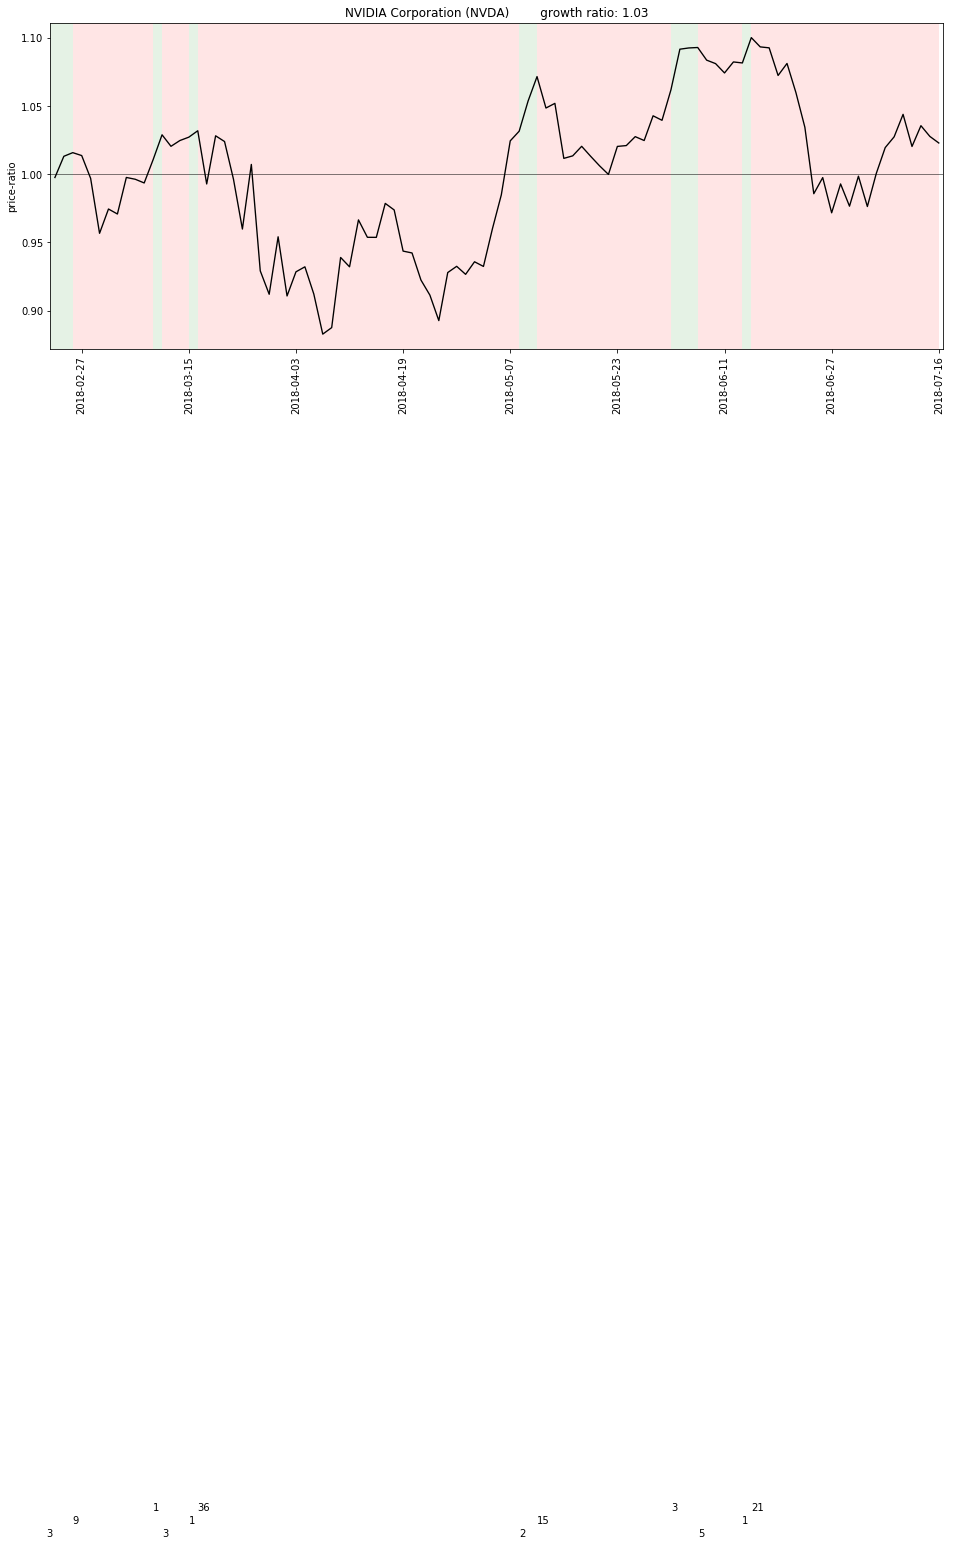

price-drop: 0.99    drop-period: 4


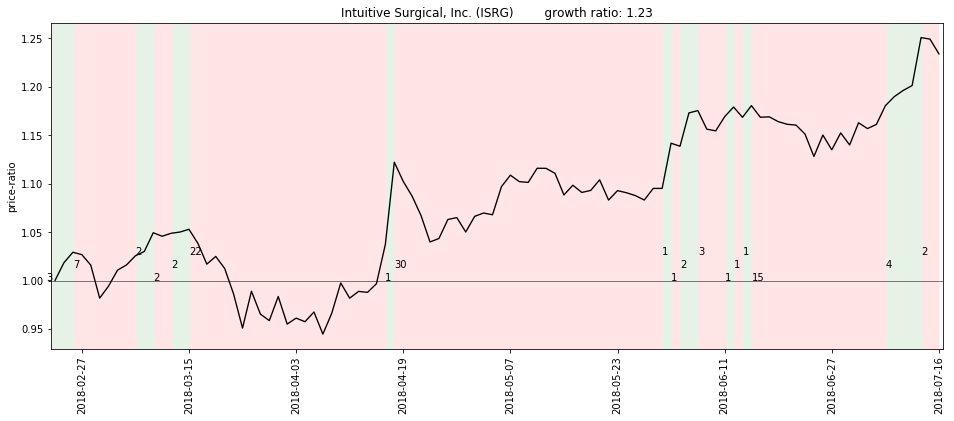

price-drop: 0.91    drop-period: 40


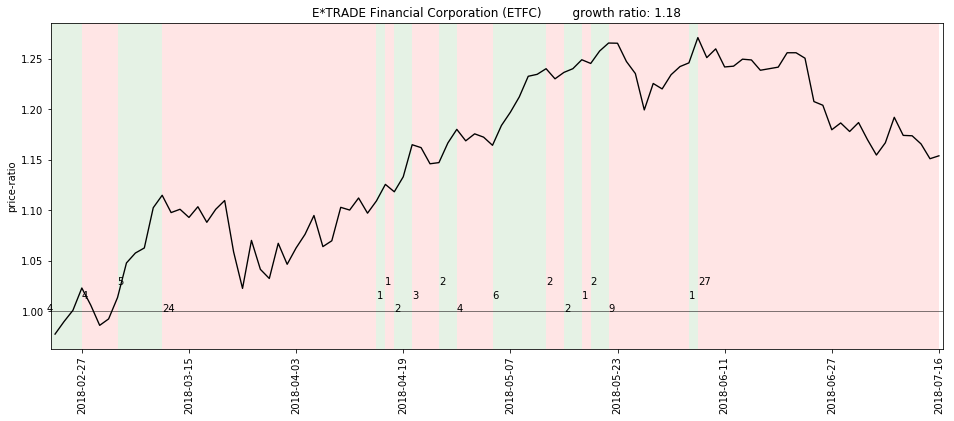

price-drop: 0.98    drop-period: 4


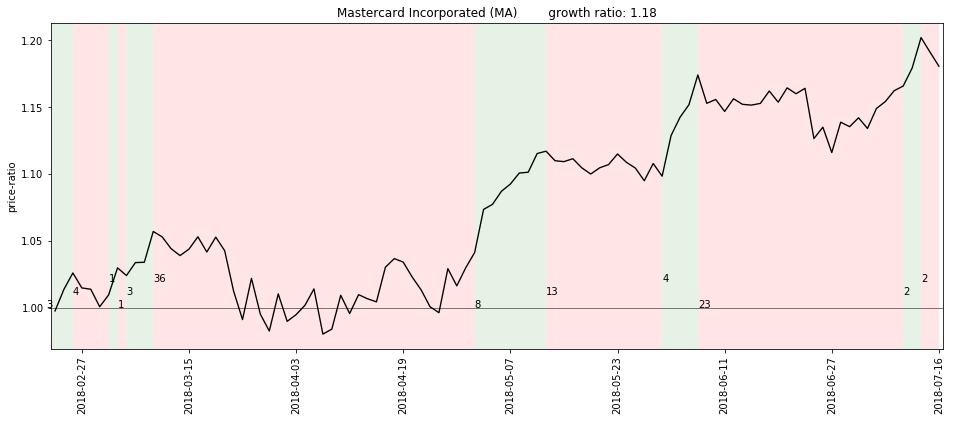

price-drop: 0.98    drop-period: 4


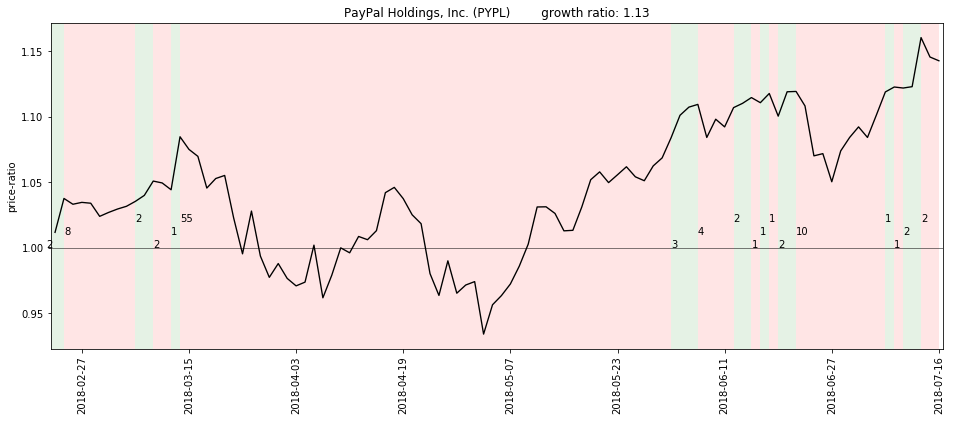

price-drop: 0.91    drop-period: 6


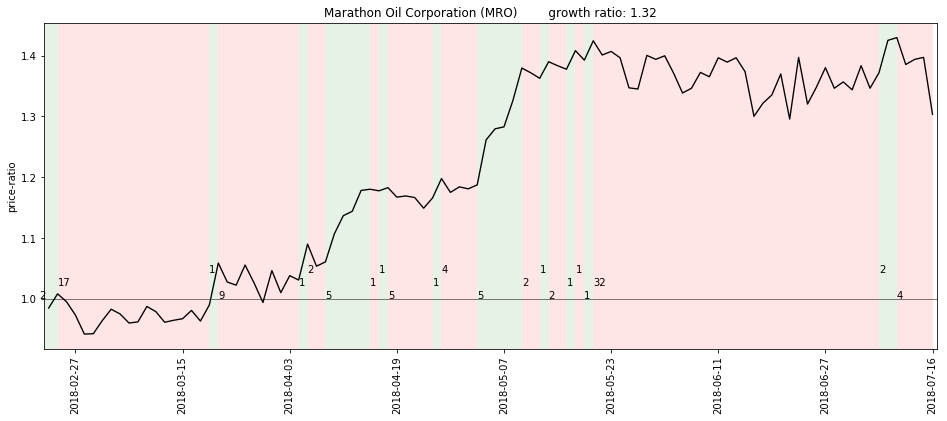

price-drop: 0.90    drop-period: 45


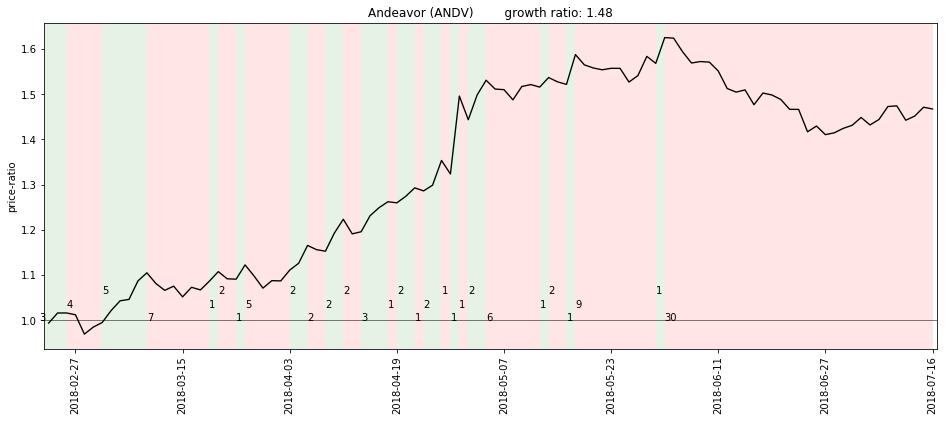

price-drop: 0.95    drop-period: 32


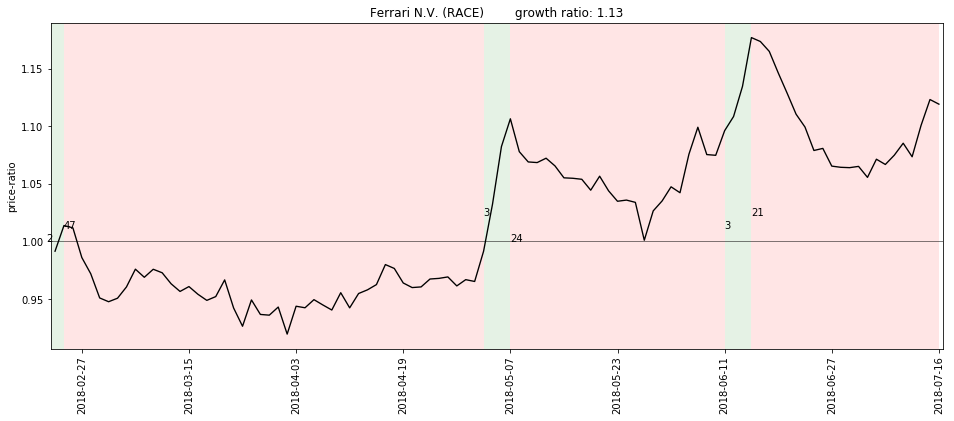

price-drop: 0.83    drop-period: 28


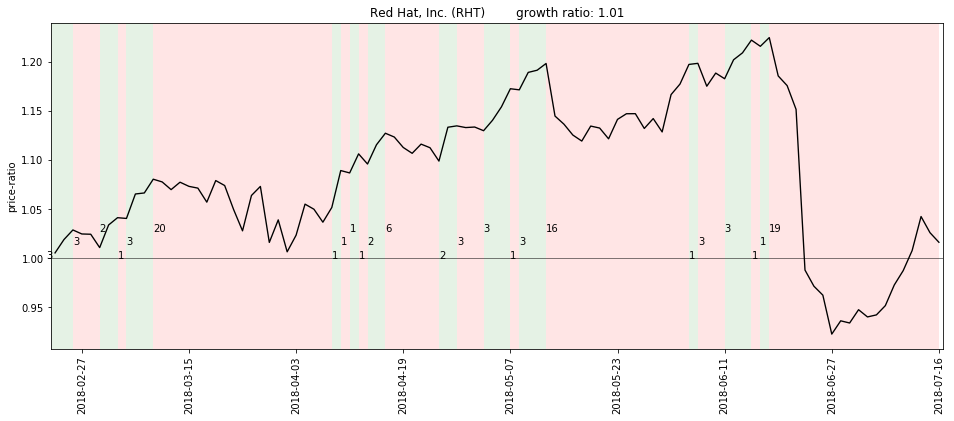

price-drop: 0.98    drop-period: 3


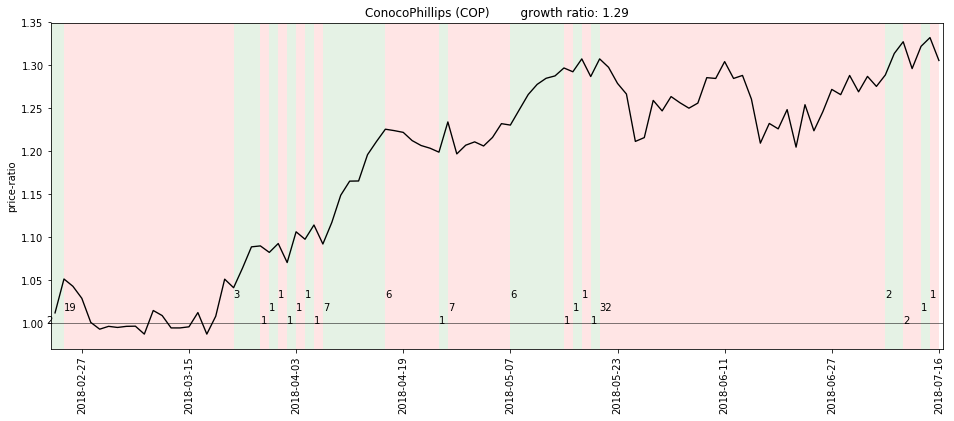

In [86]:
top_30 = ['XRX', 'ALGN', 'TWTR', 'NFLX', 'URBN', 'NTAP', 'KORS', 'NRG', 'BA', 'RL', 'CNC', 'GWW', 'MU', 'ADBE', 'AMZN', 'VLO', 'FOX', 'FOXA', 'ILMN', 'TROW', 'NVDA', 'ISRG', 'ETFC', 'MA', 'PYPL', 'MRO', 'ANDV', 'RACE', 'RHT', 'COP']
for symbol in top_30:
    print('price-drop: %.2f    drop-period: %i'%(hp[symbol]['price-drop'].iloc[-1], hp[symbol]['drop-period'].iloc[-1]))
    render.draw_column(hp, symbol, stocks['Name'][symbol], add = ['drop-periods', 'drop-periods-labels'])    

## Look at symbols with max drop-period < 270 days for last 7 years sorted by price-ratio growth in last year

price-drop: 1.00    drop-period: 4


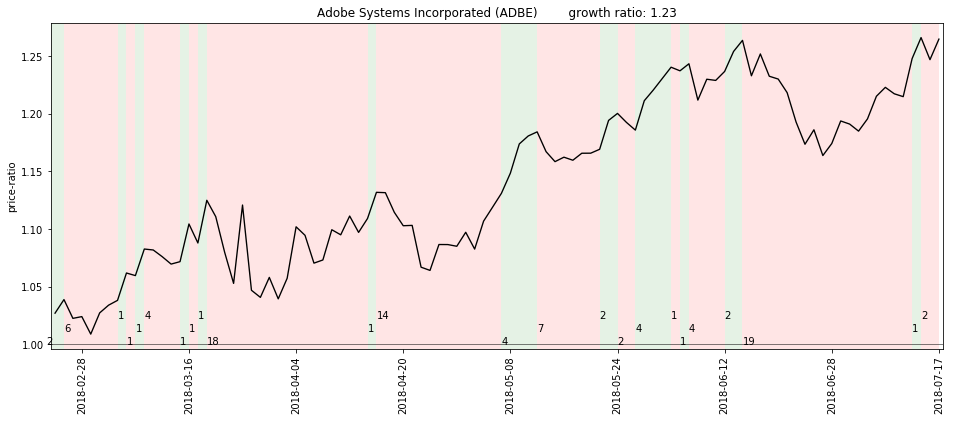

price-drop: 0.99    drop-period: 4


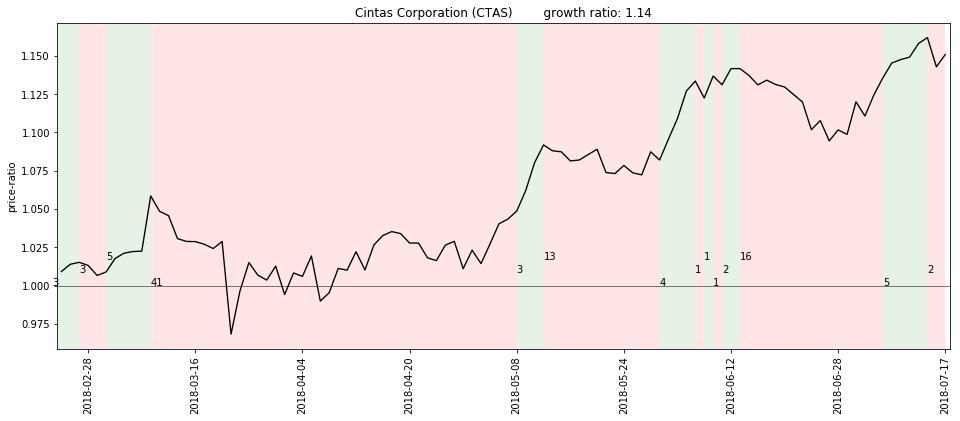

price-drop: 1.00    drop-period: 5


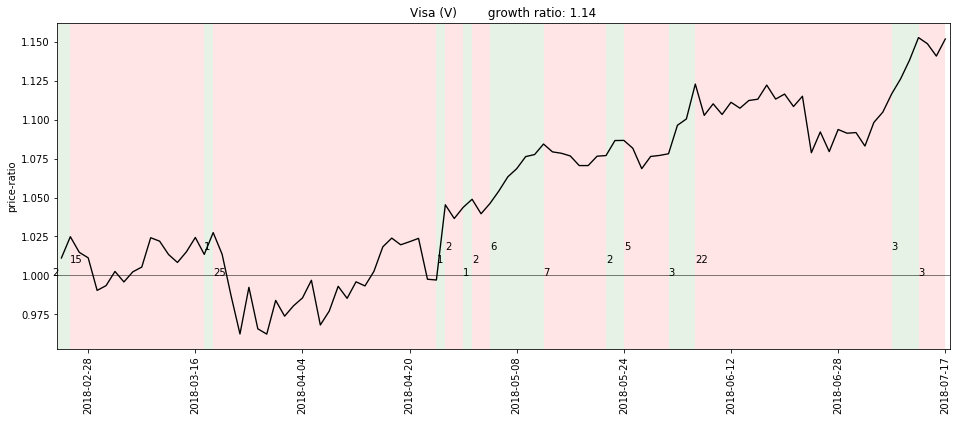

price-drop: 1.00    drop-period: 0


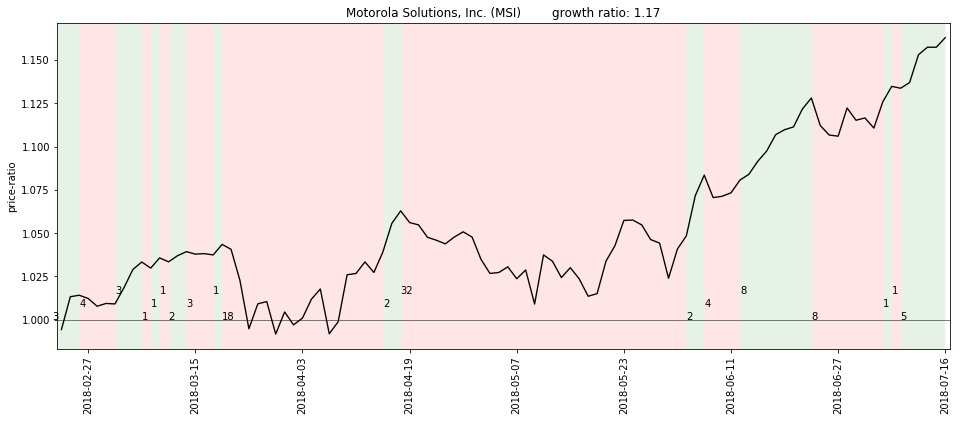

price-drop: 1.00    drop-period: 0


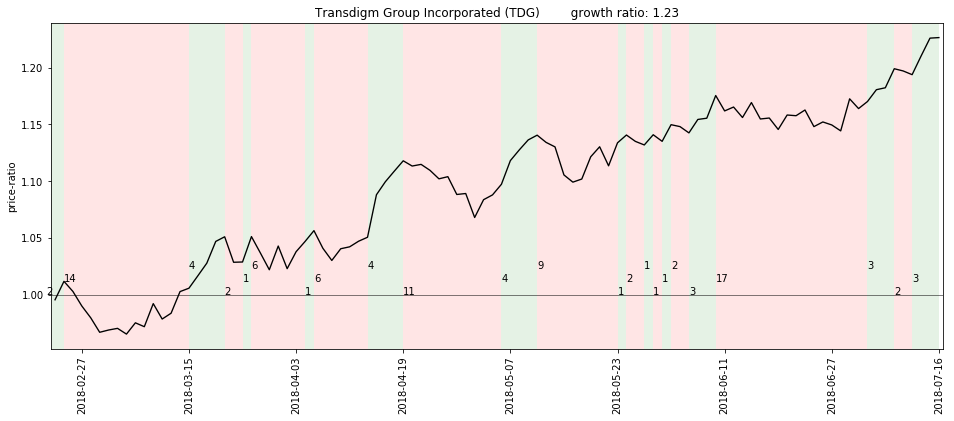

price-drop: 1.00    drop-period: 3


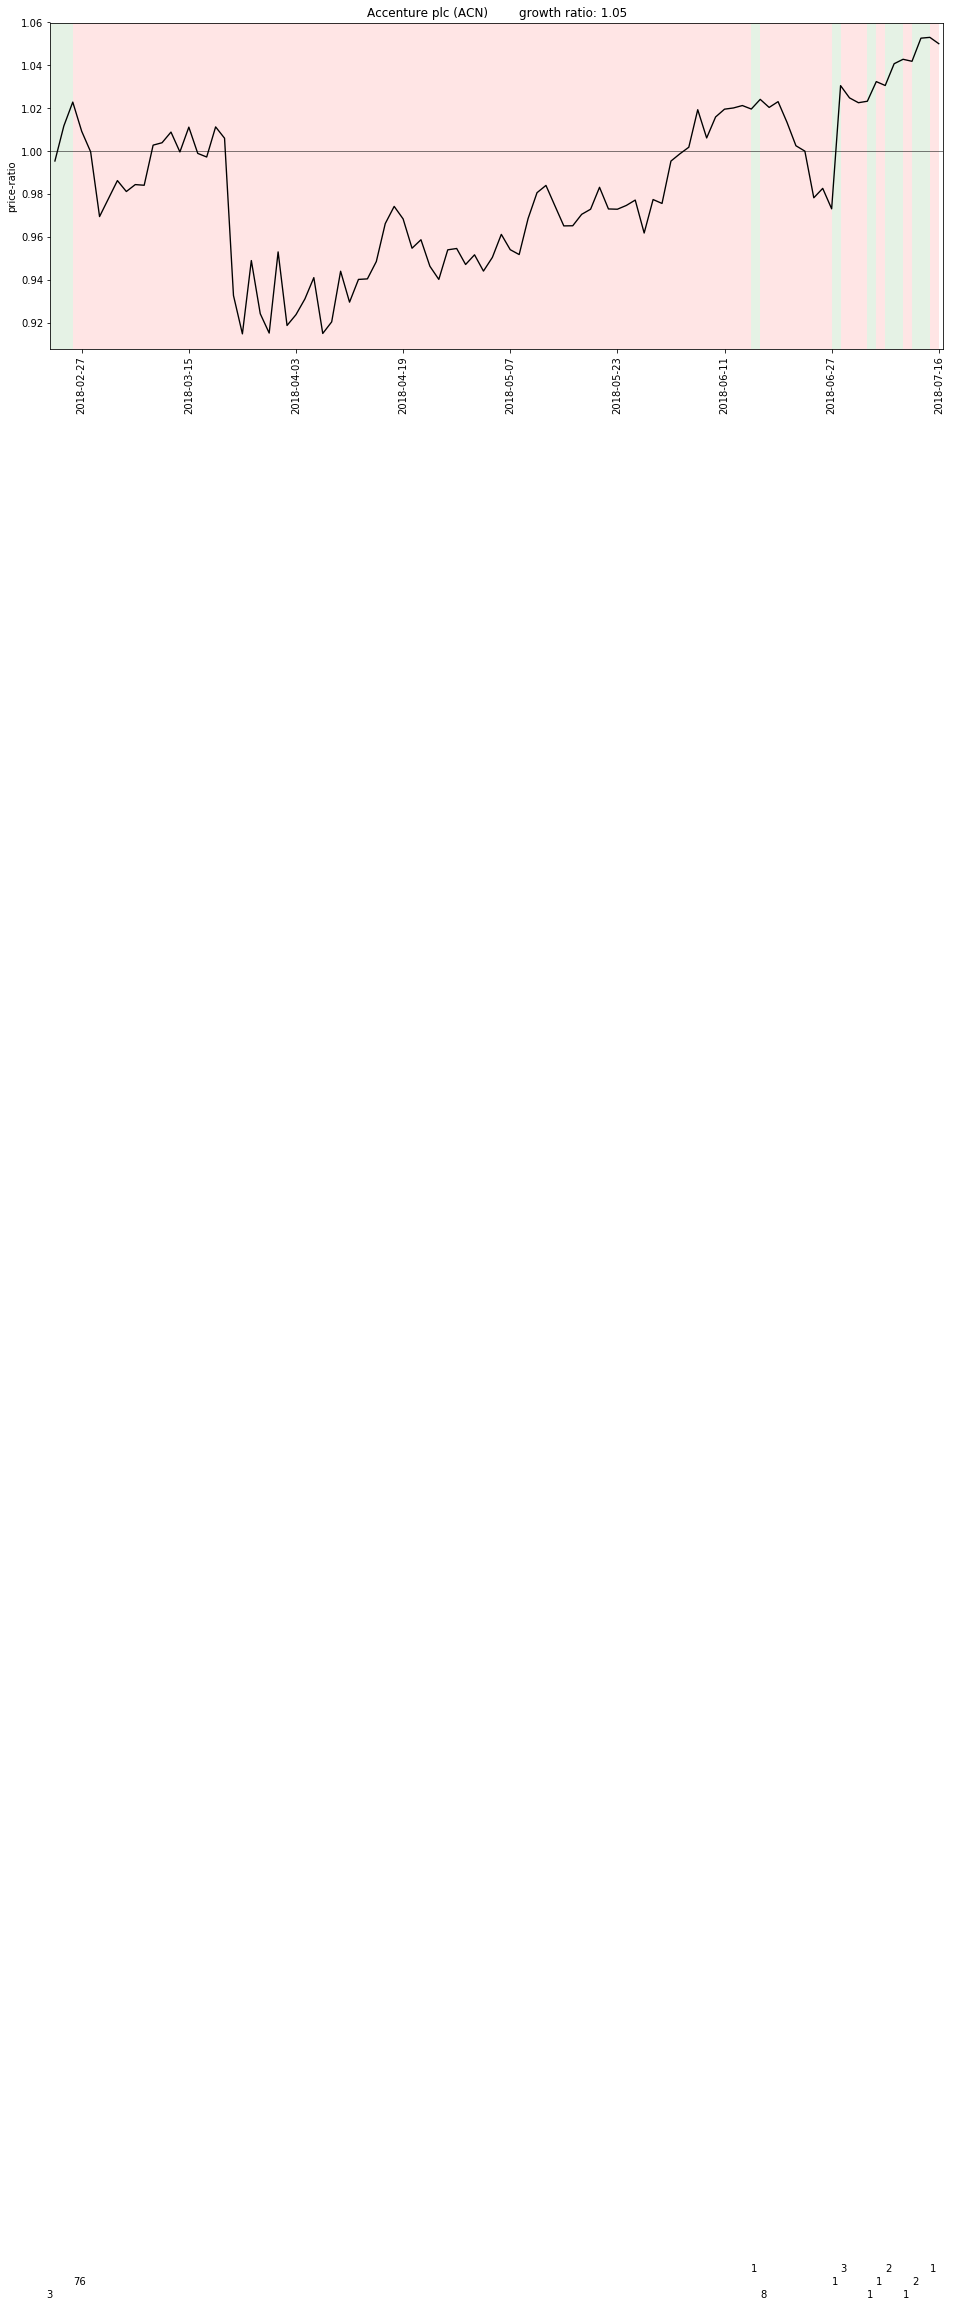

price-drop: 1.00    drop-period: 8


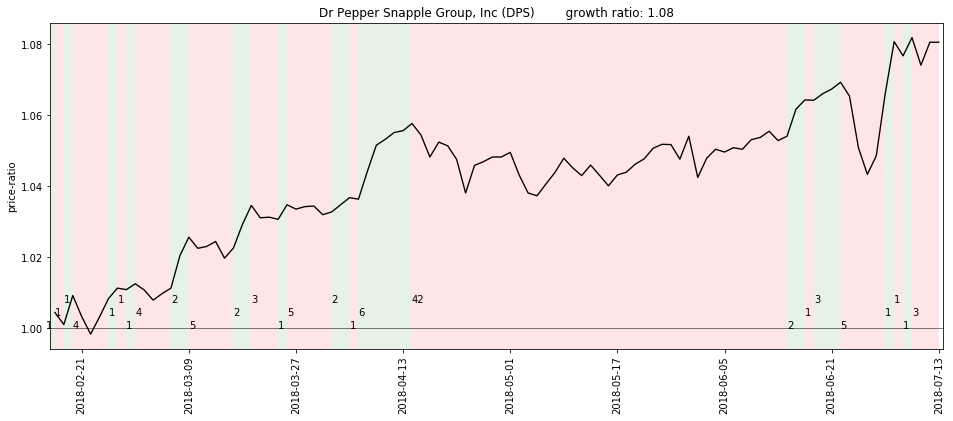

price-drop: 0.89    drop-period: 84


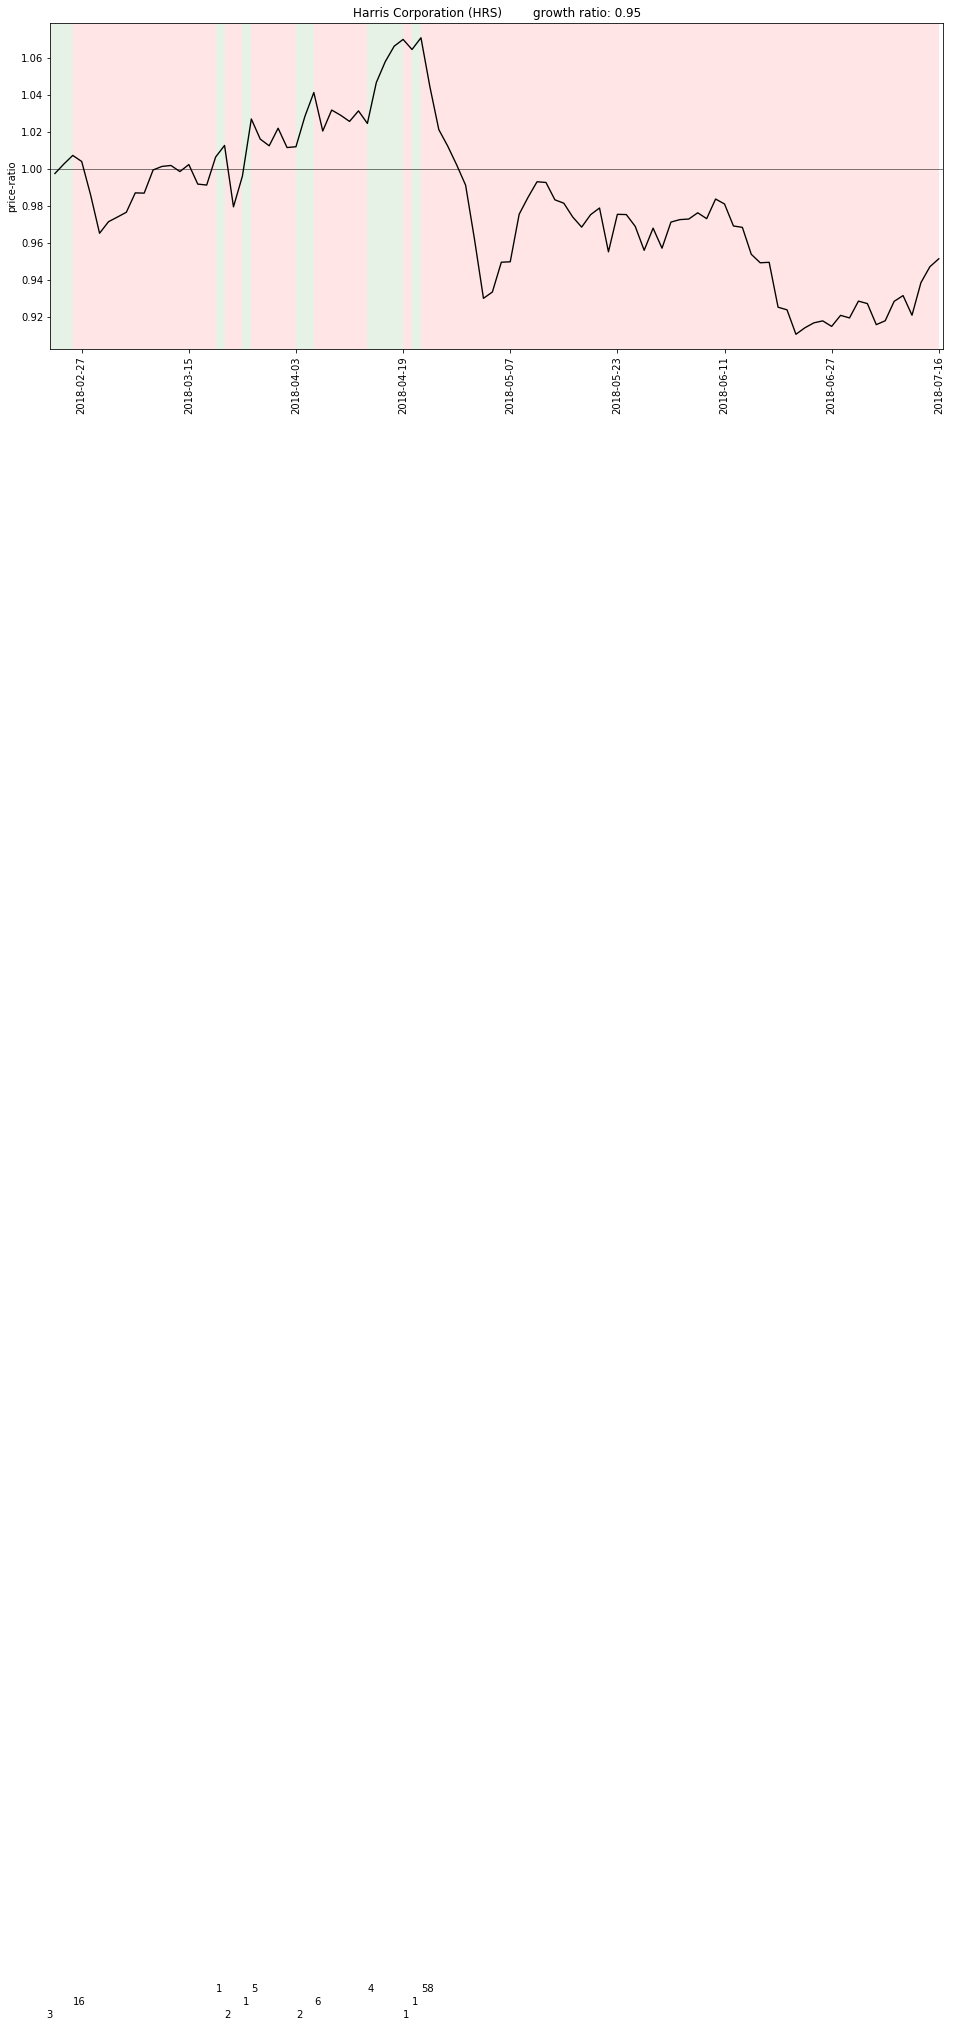

price-drop: 0.99    drop-period: 34


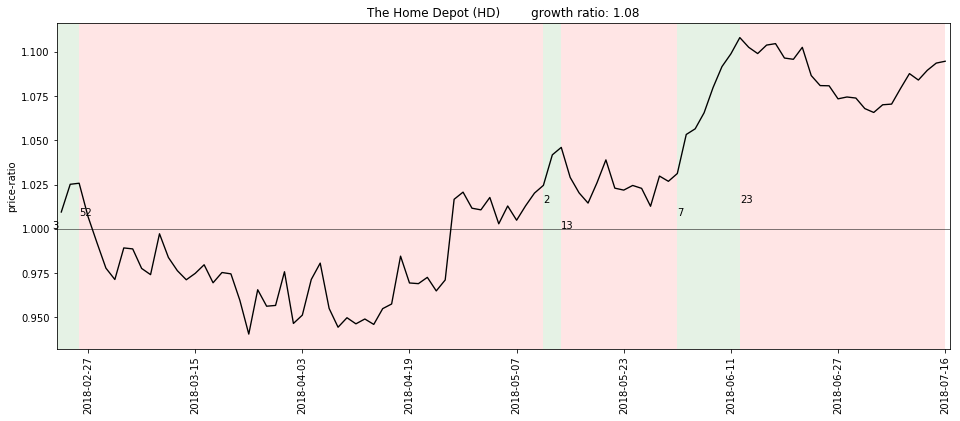

price-drop: 0.99    drop-period: 34


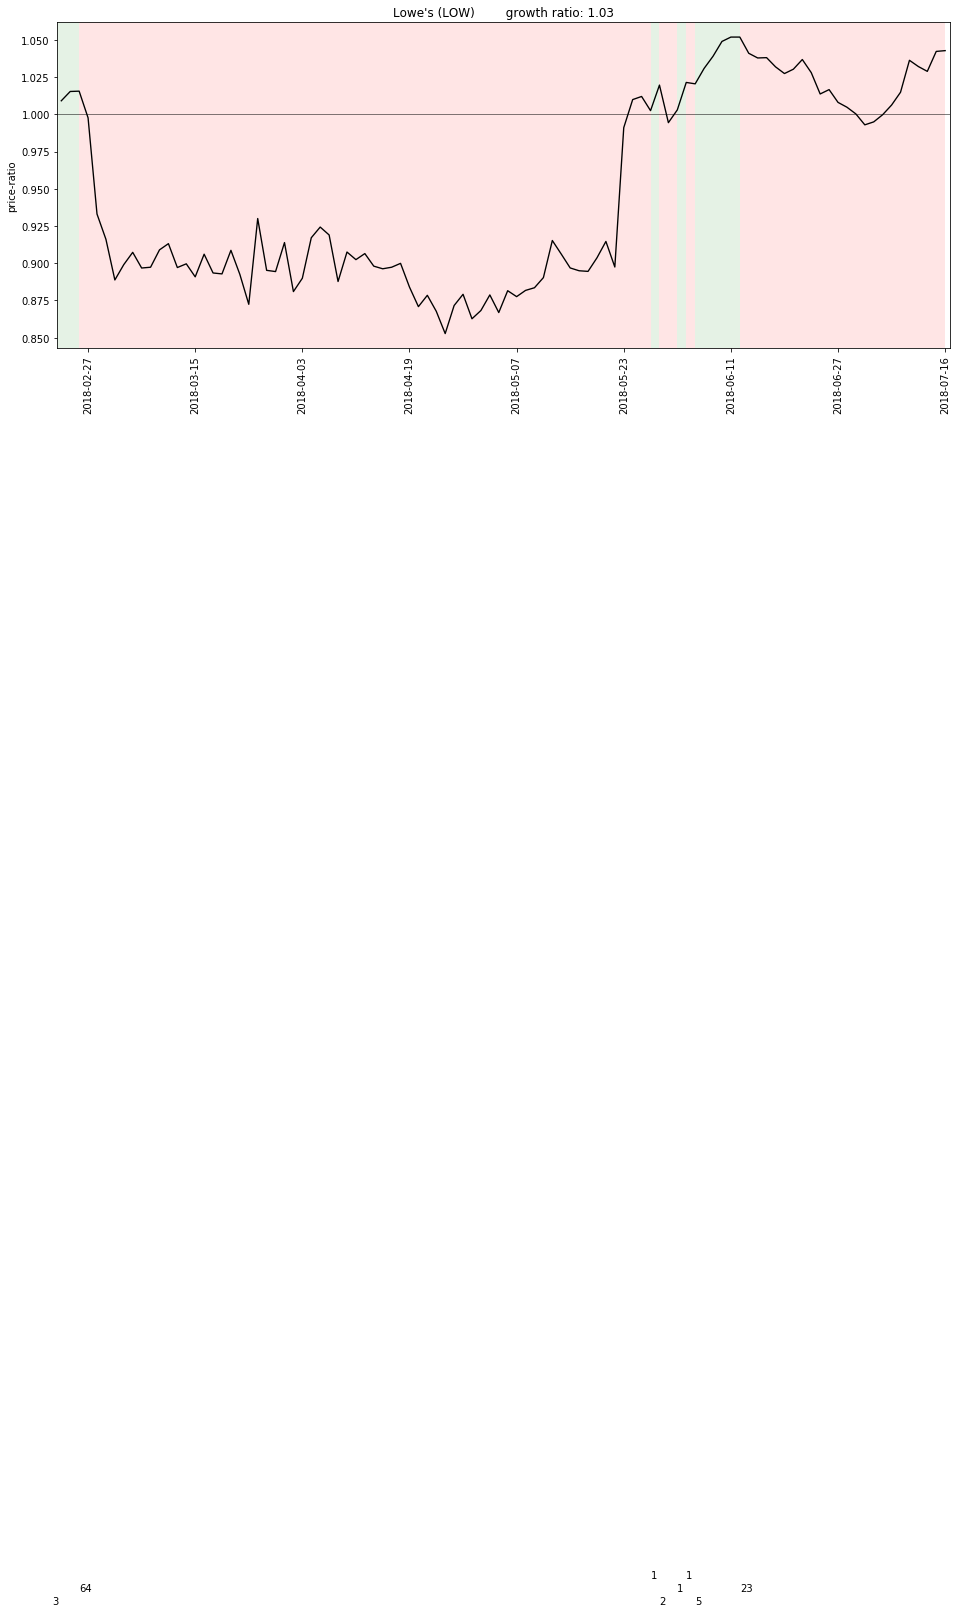

price-drop: 0.99    drop-period: 4


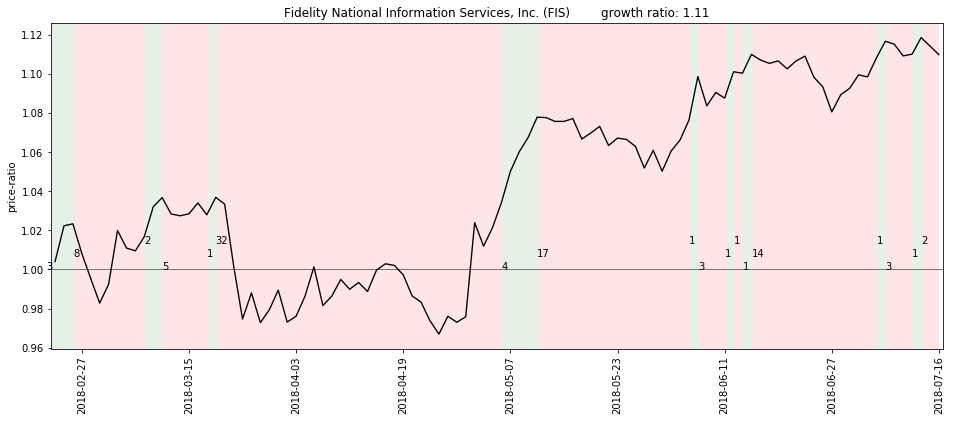

price-drop: 0.89    drop-period: 102


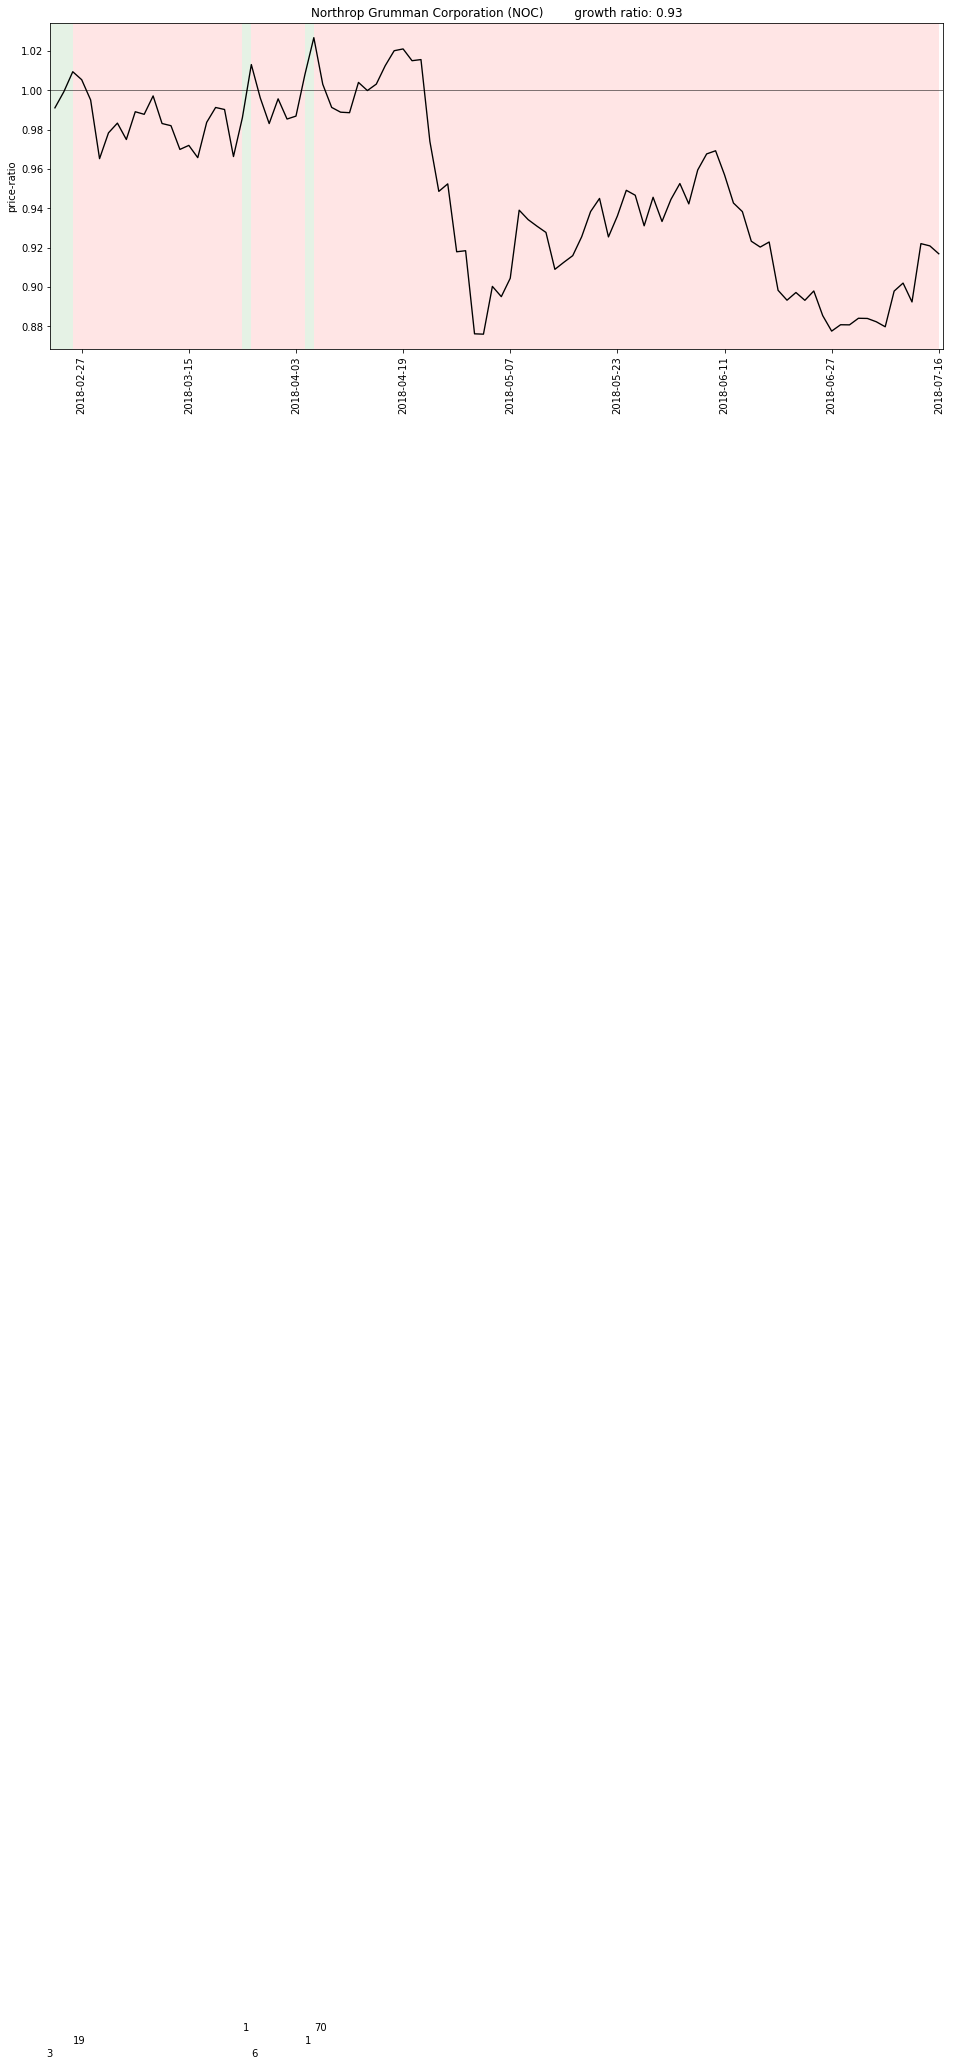

price-drop: 0.86    drop-period: 140


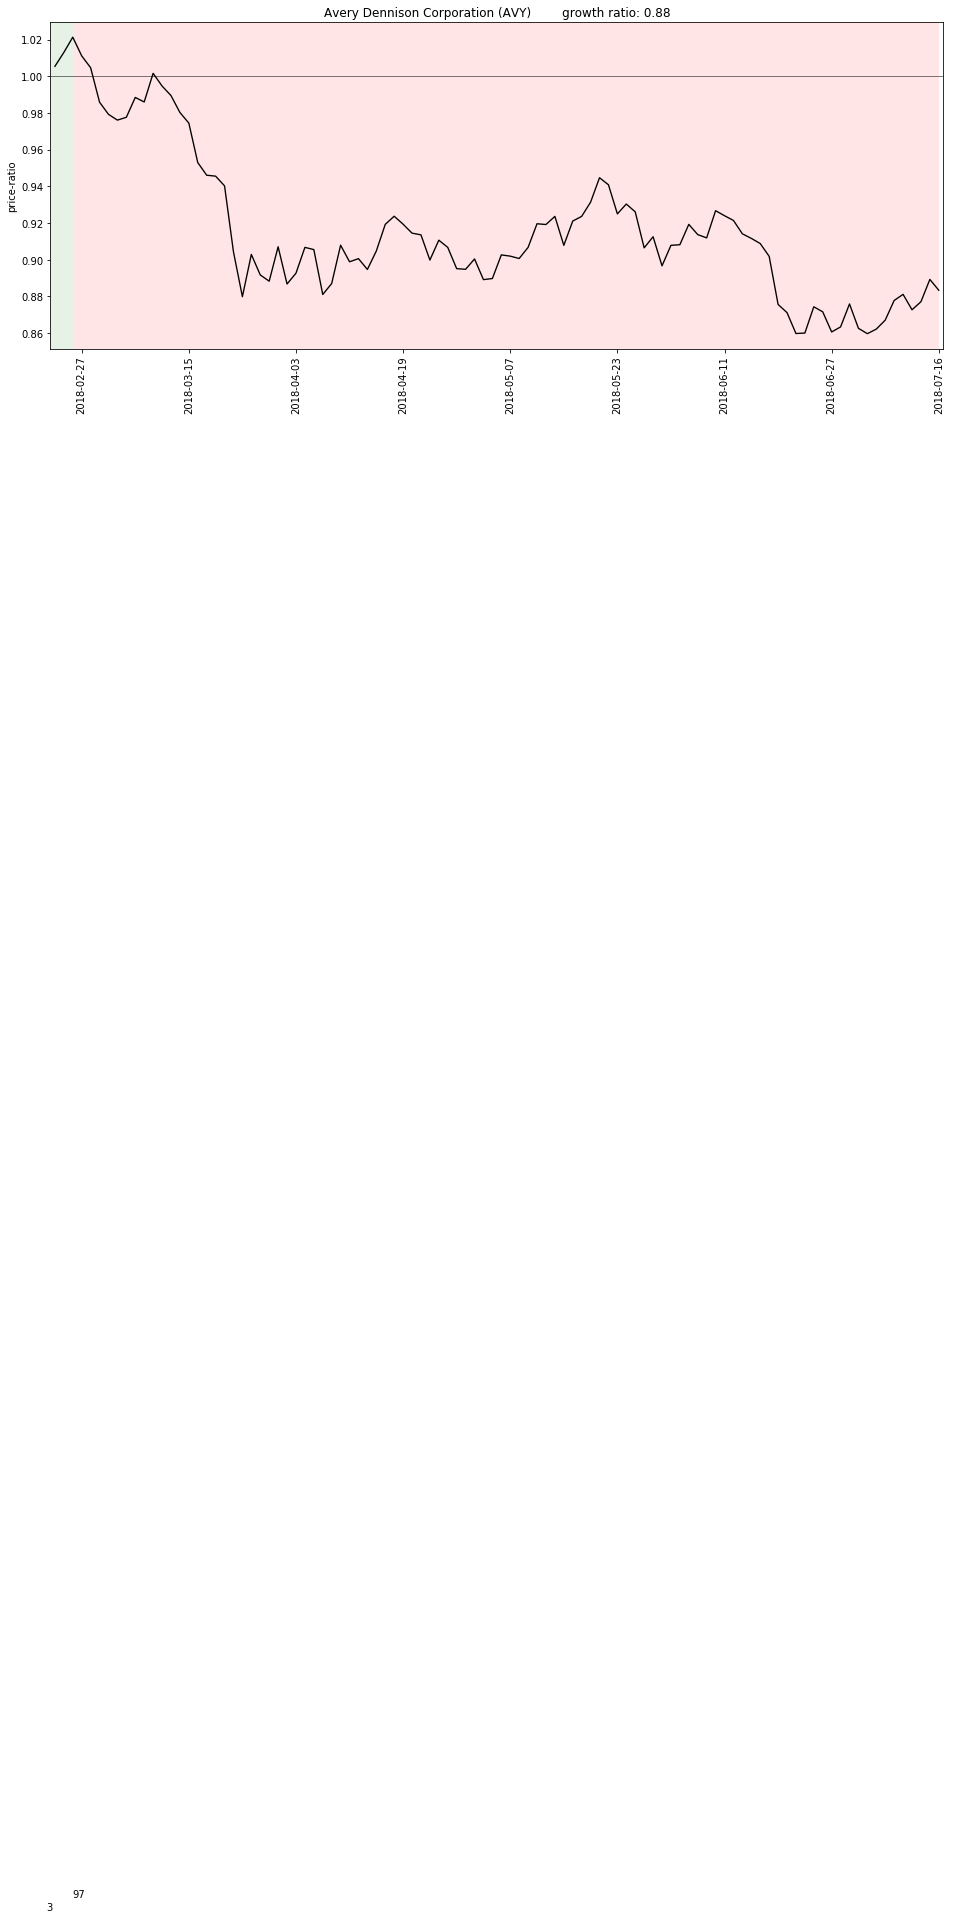

price-drop: 0.88    drop-period: 84


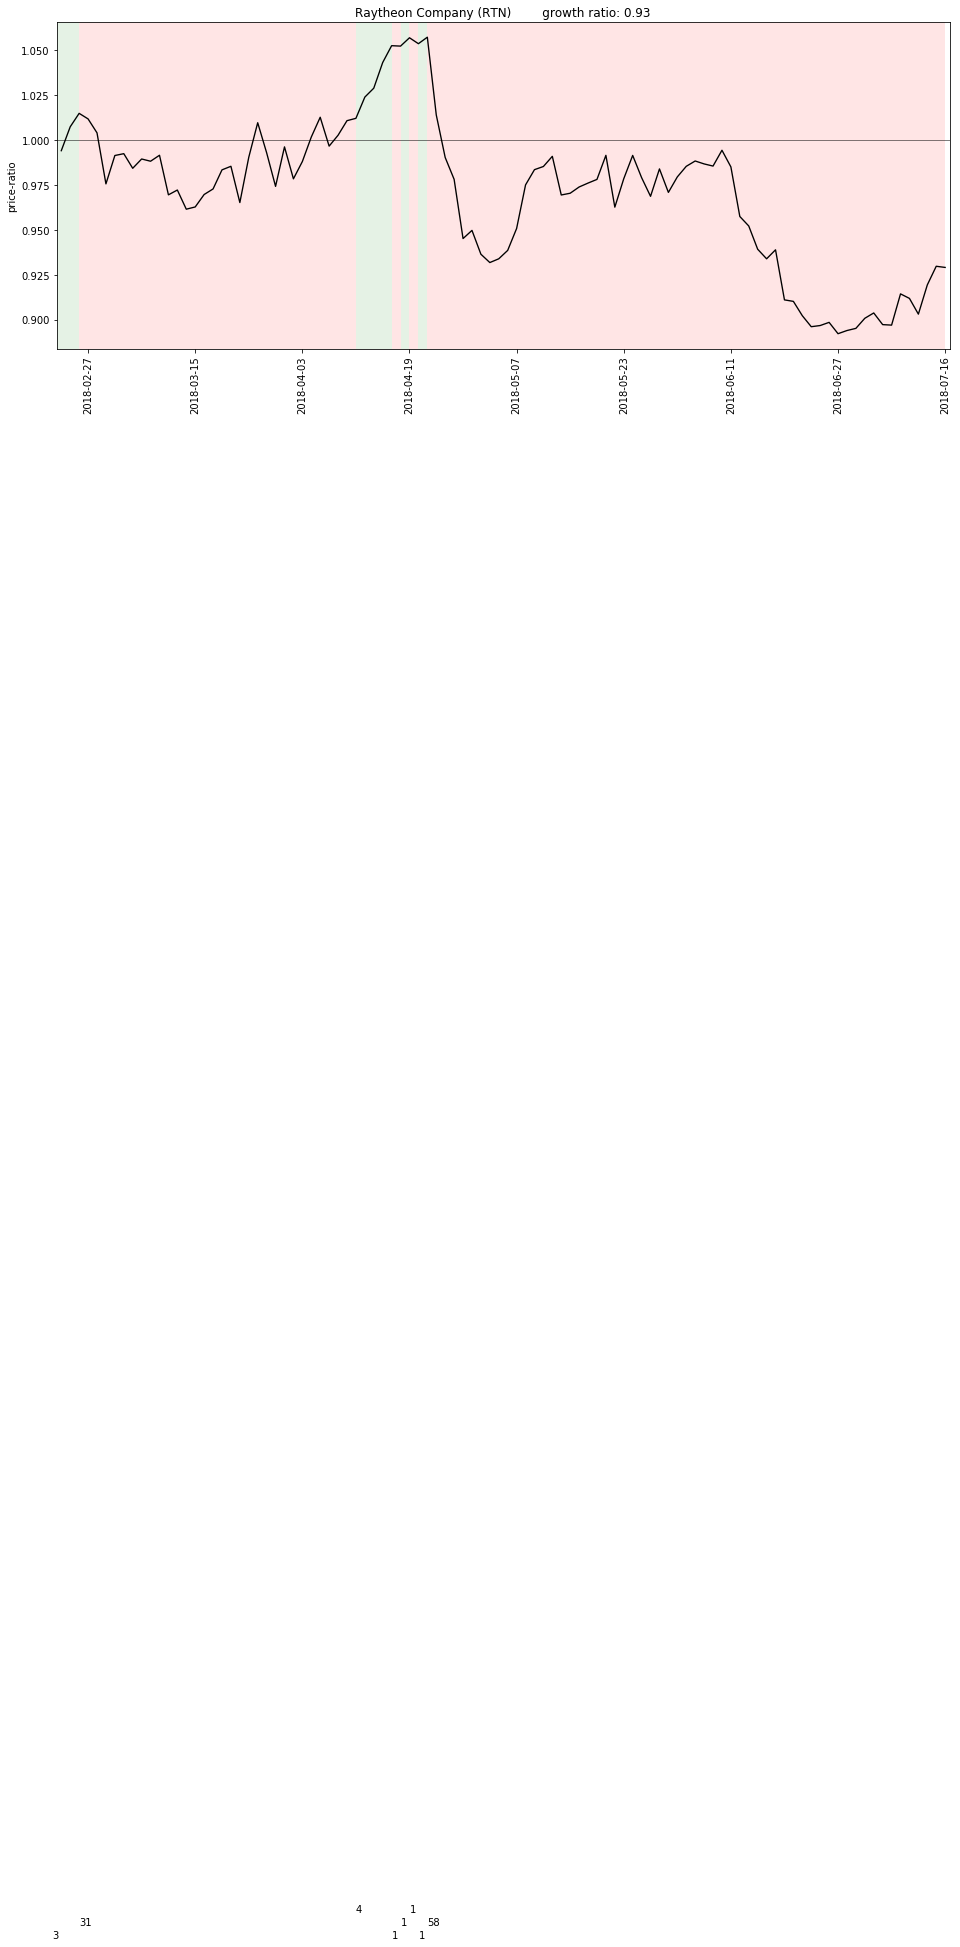

price-drop: 0.99    drop-period: 4


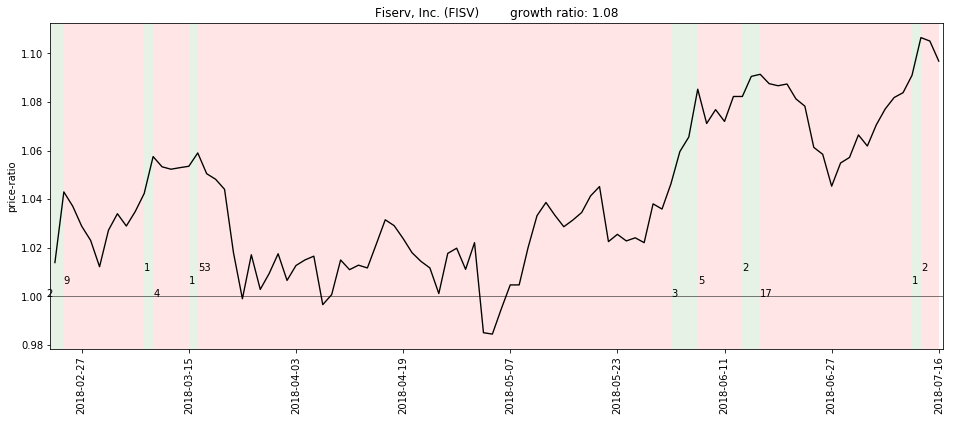

price-drop: 0.97    drop-period: 40


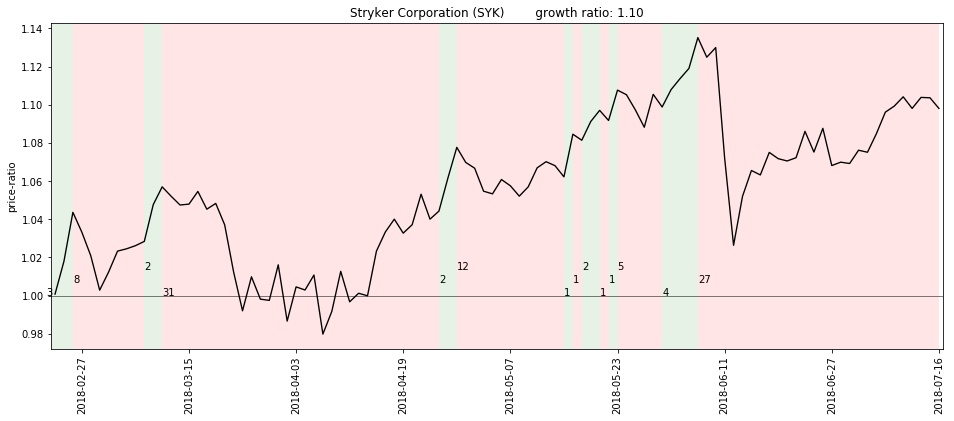

price-drop: 0.95    drop-period: 34


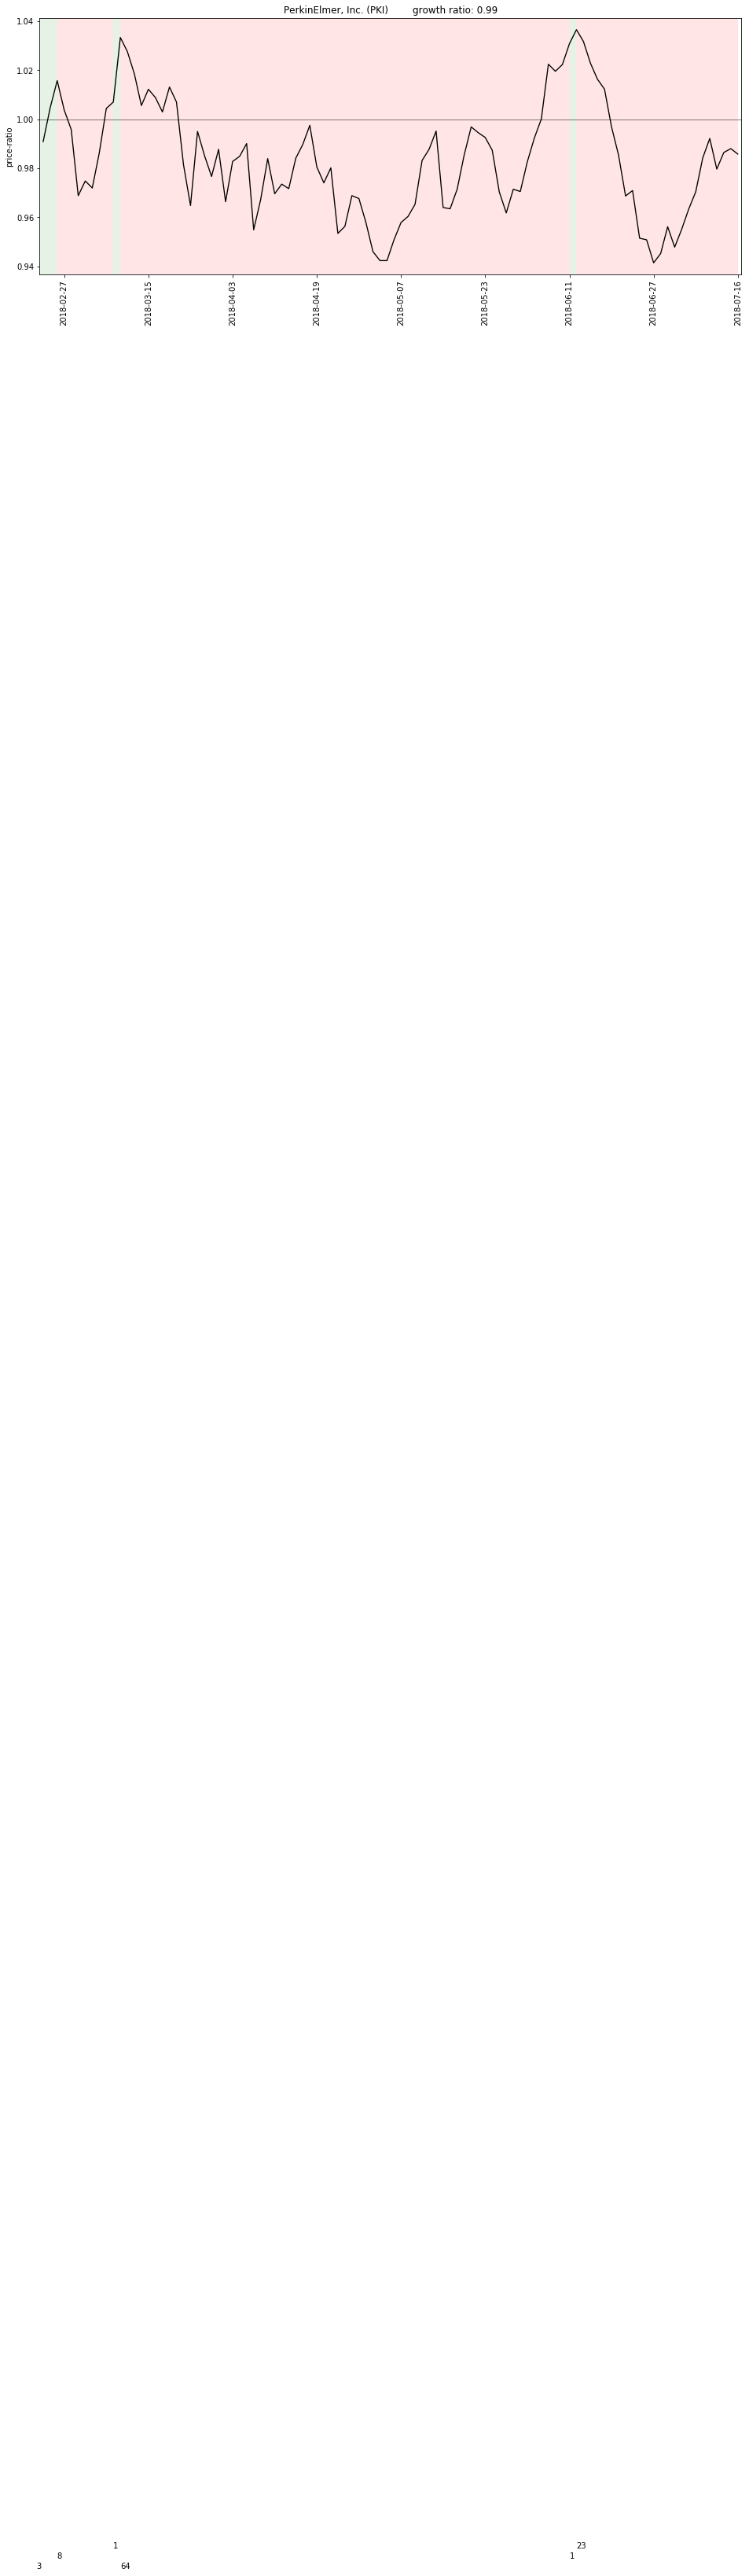

price-drop: 0.91    drop-period: 80


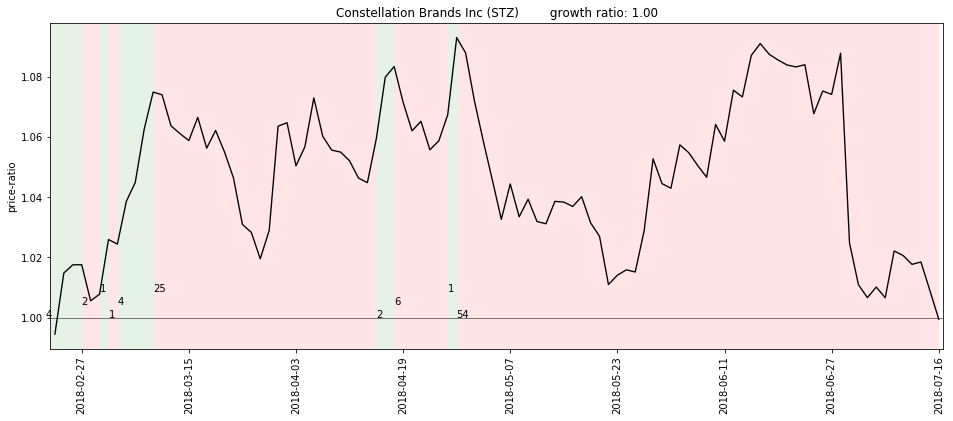

price-drop: 0.97    drop-period: 129


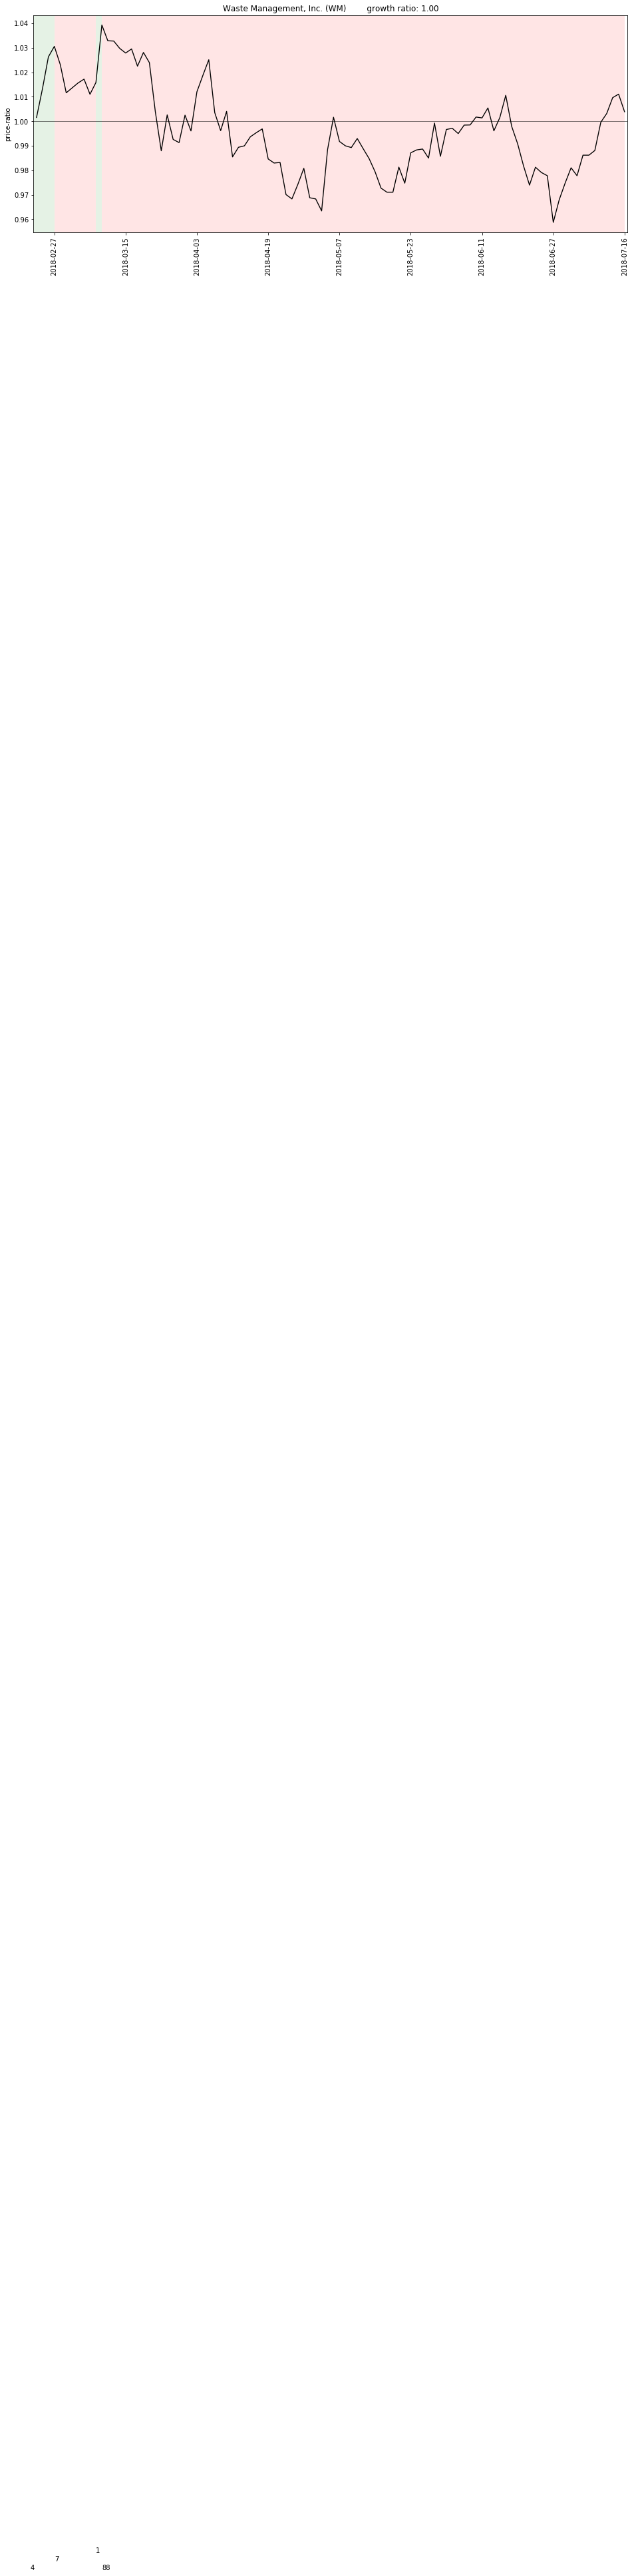

price-drop: 0.99    drop-period: 4


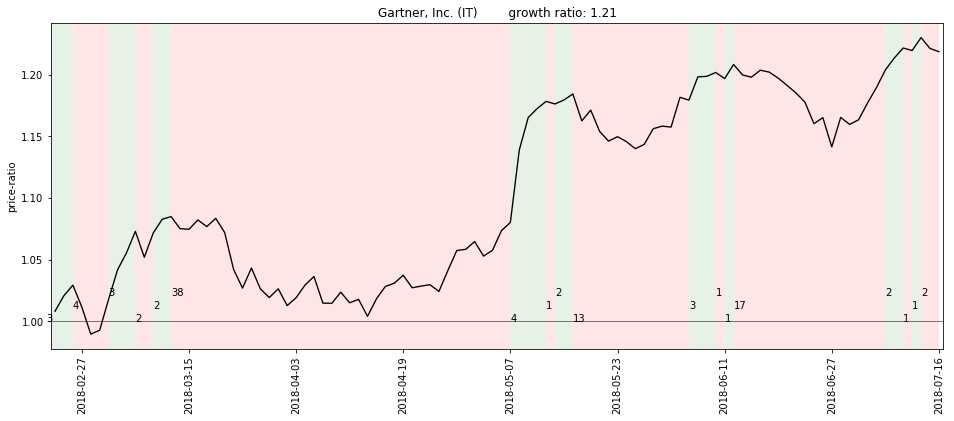

price-drop: 0.90    drop-period: 84


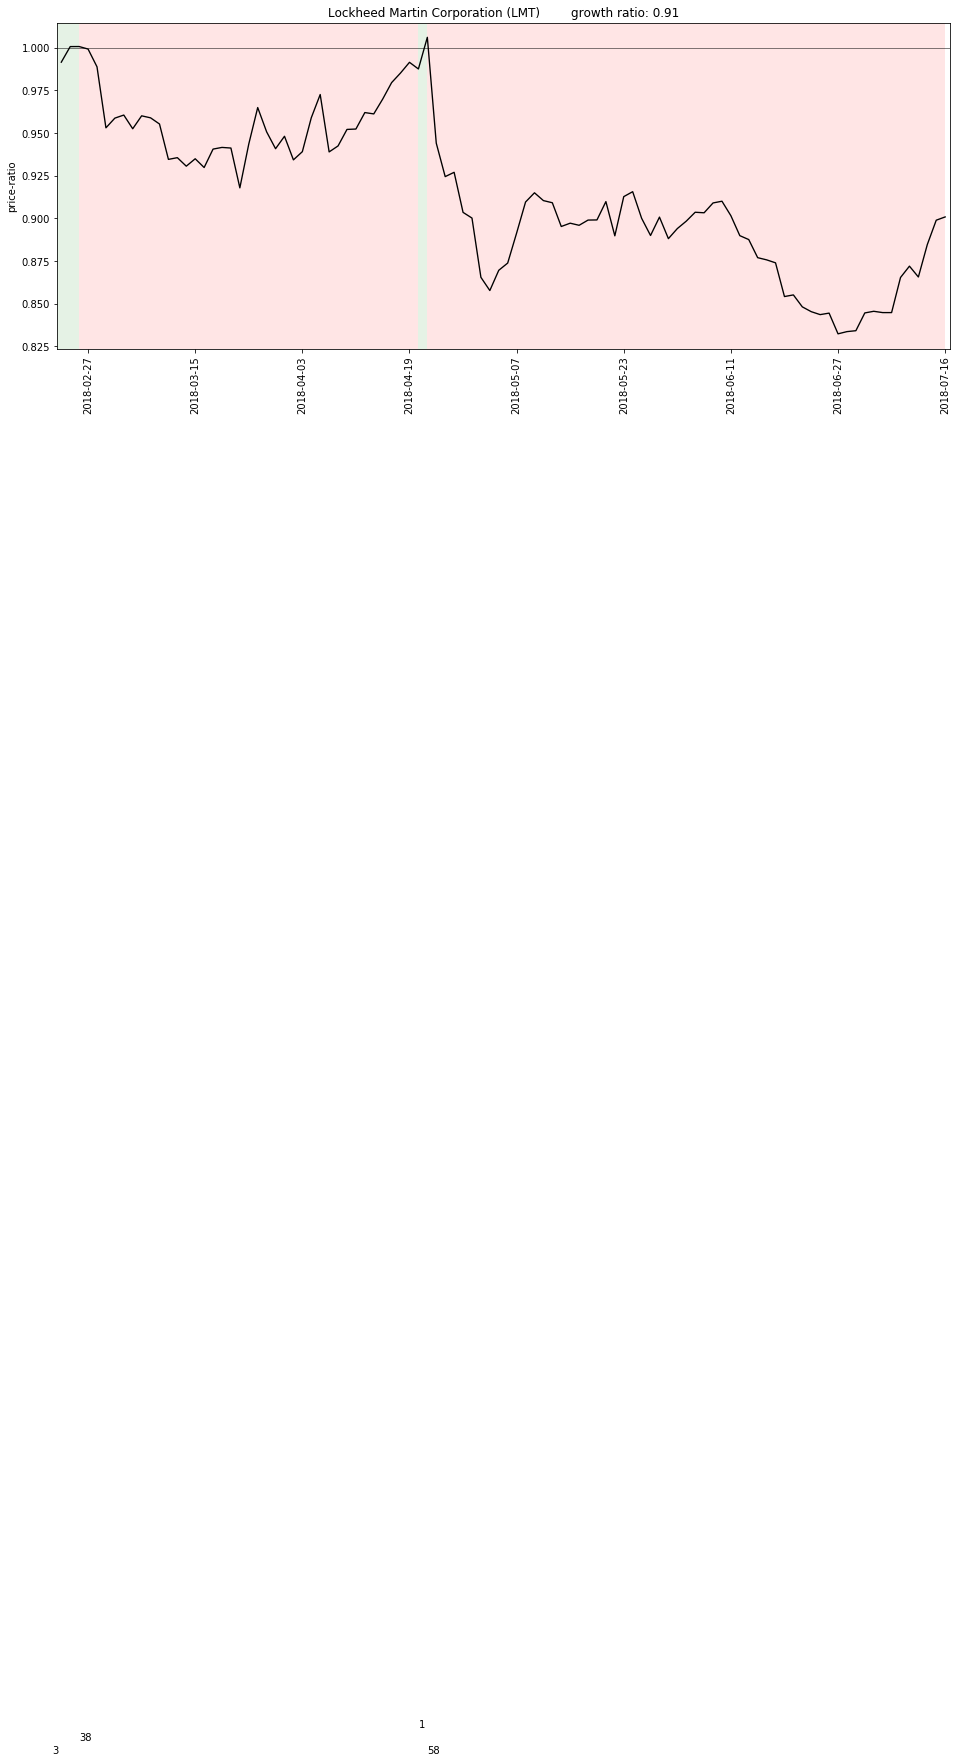

price-drop: 1.00    drop-period: 0


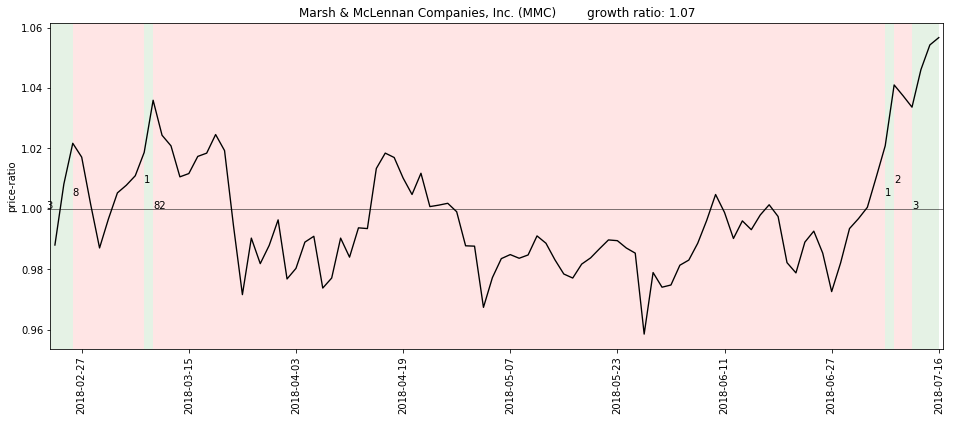

price-drop: 0.94    drop-period: 140


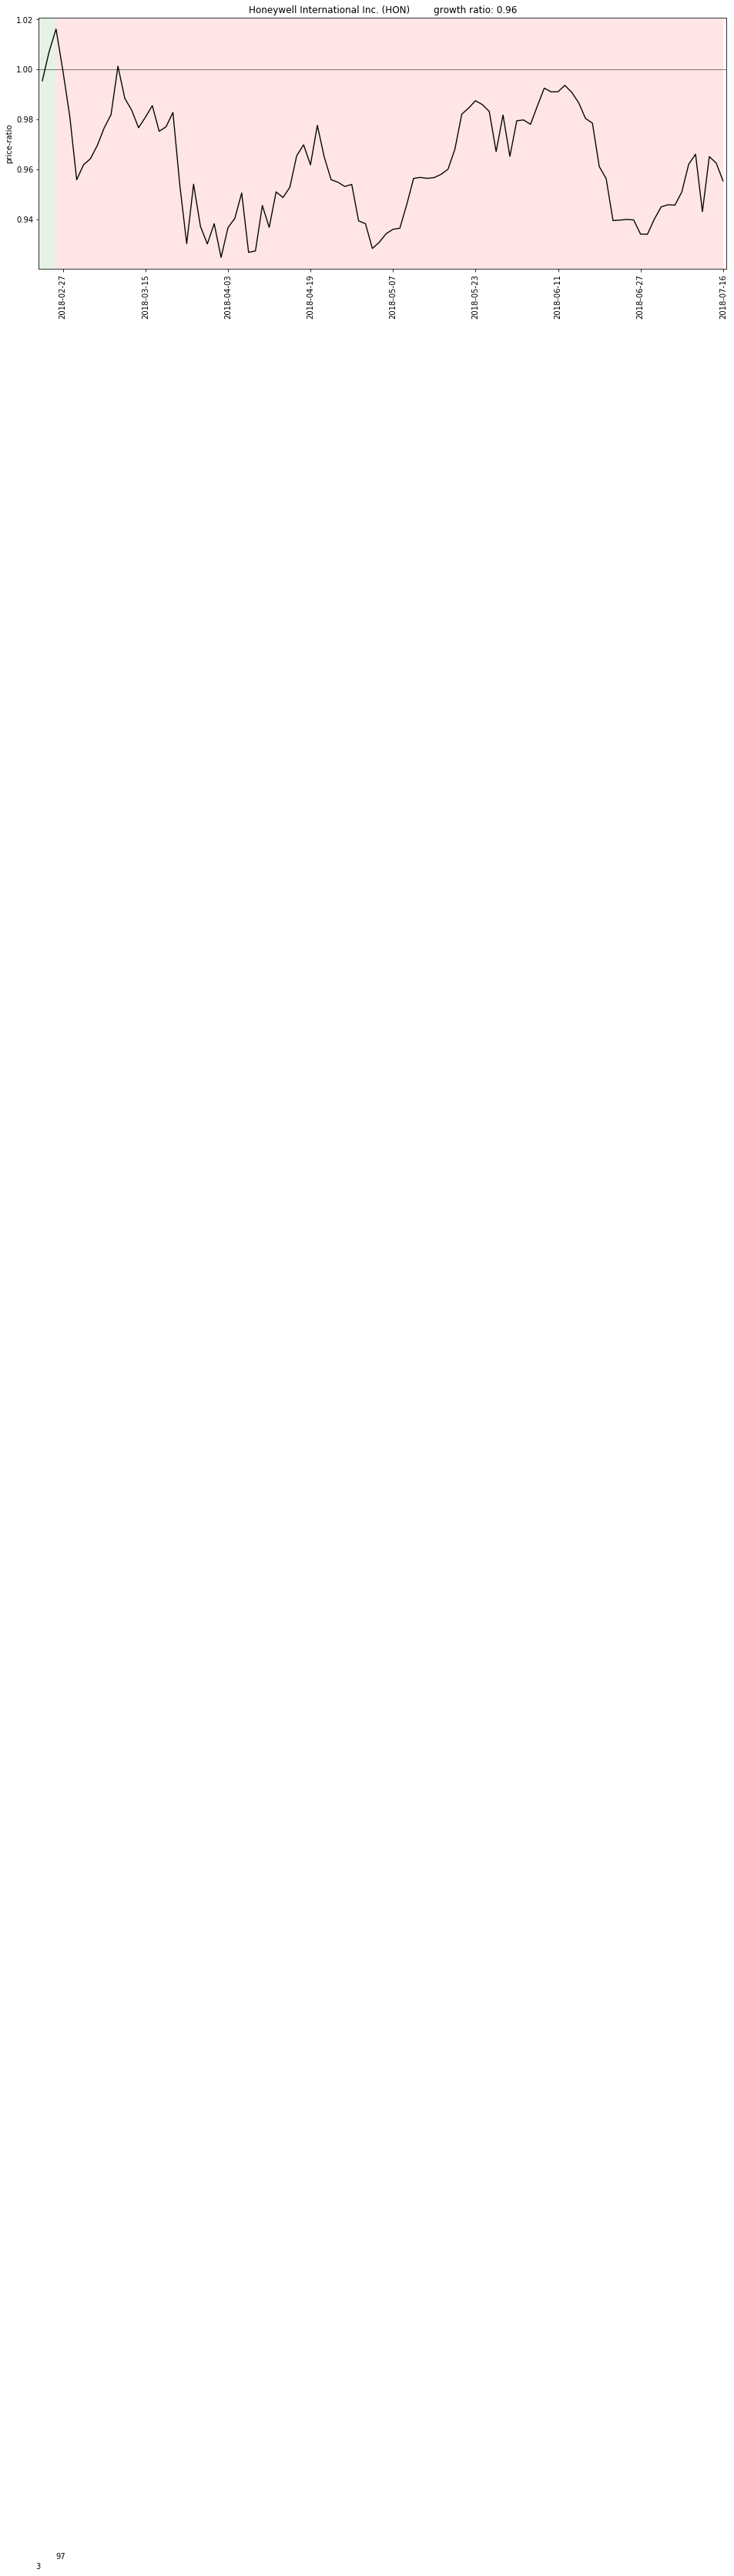

price-drop: 0.91    drop-period: 129


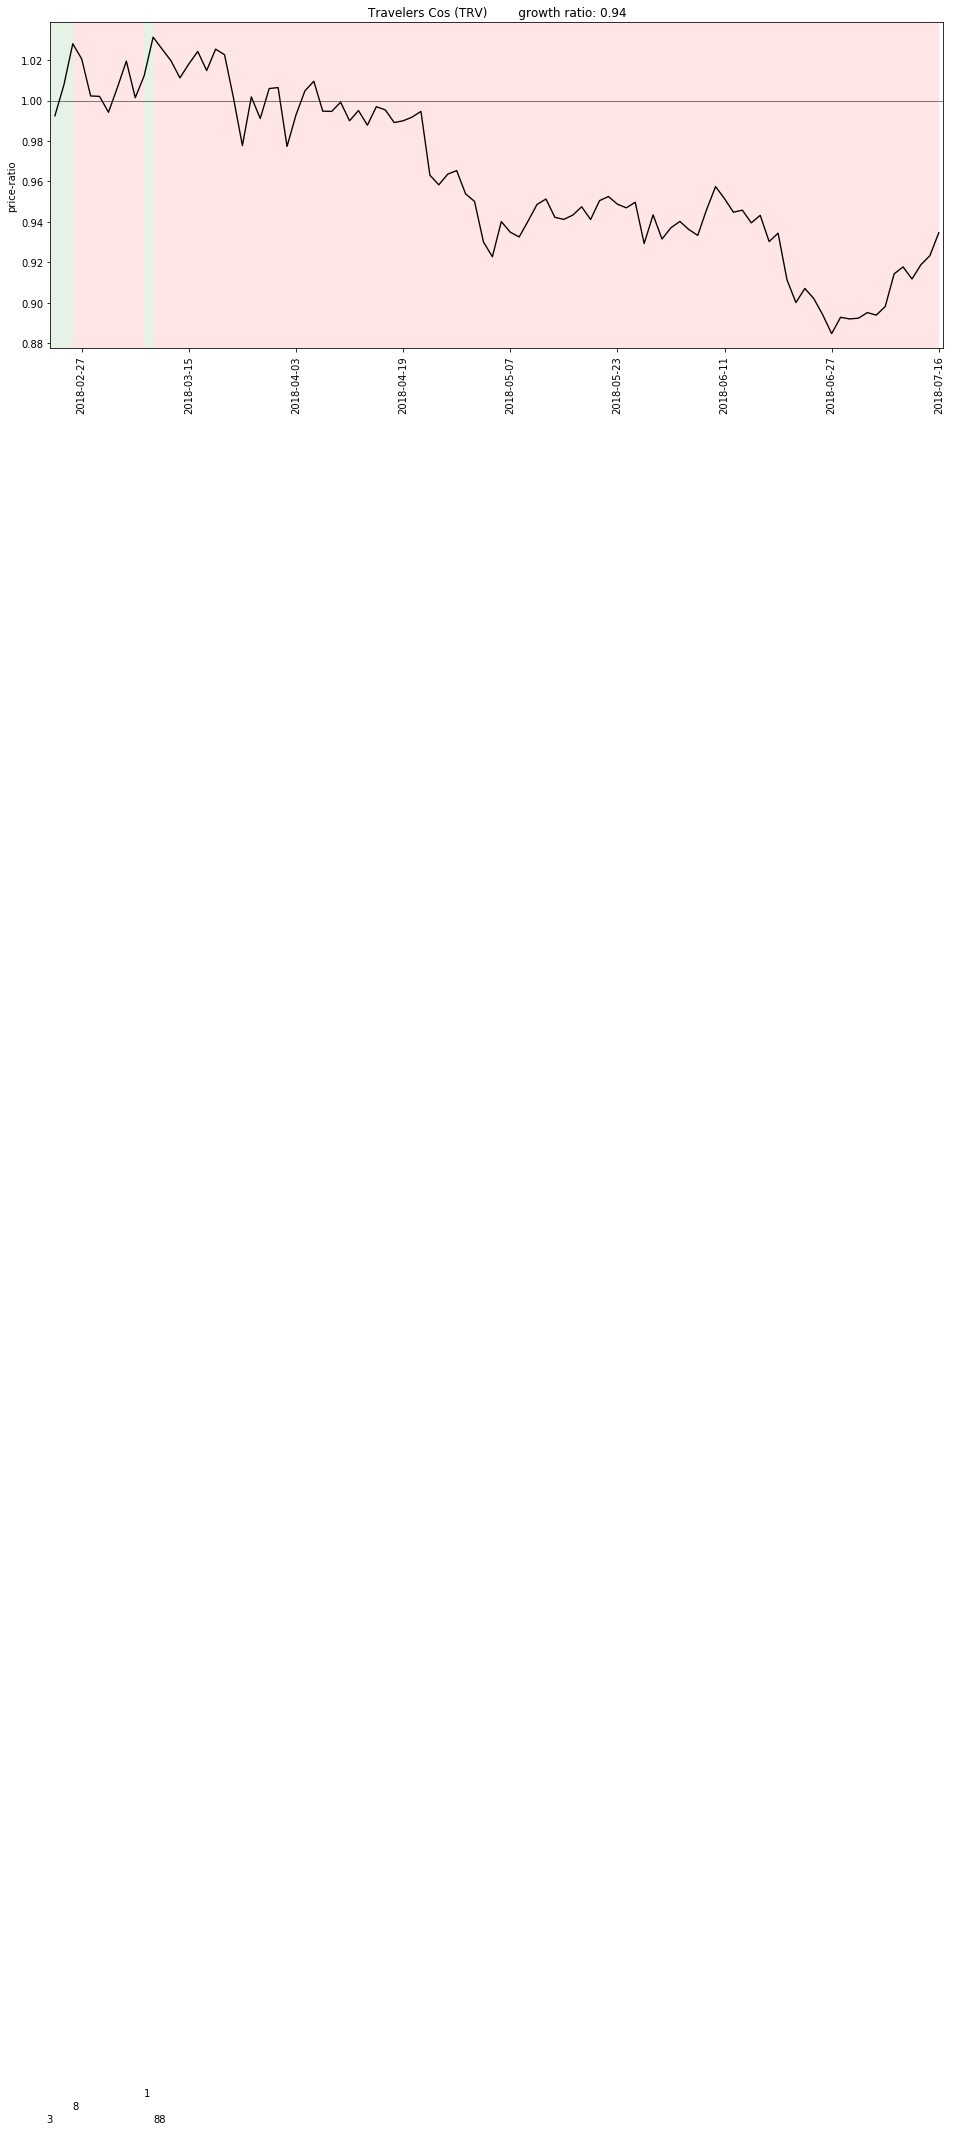

price-drop: 0.88    drop-period: 143


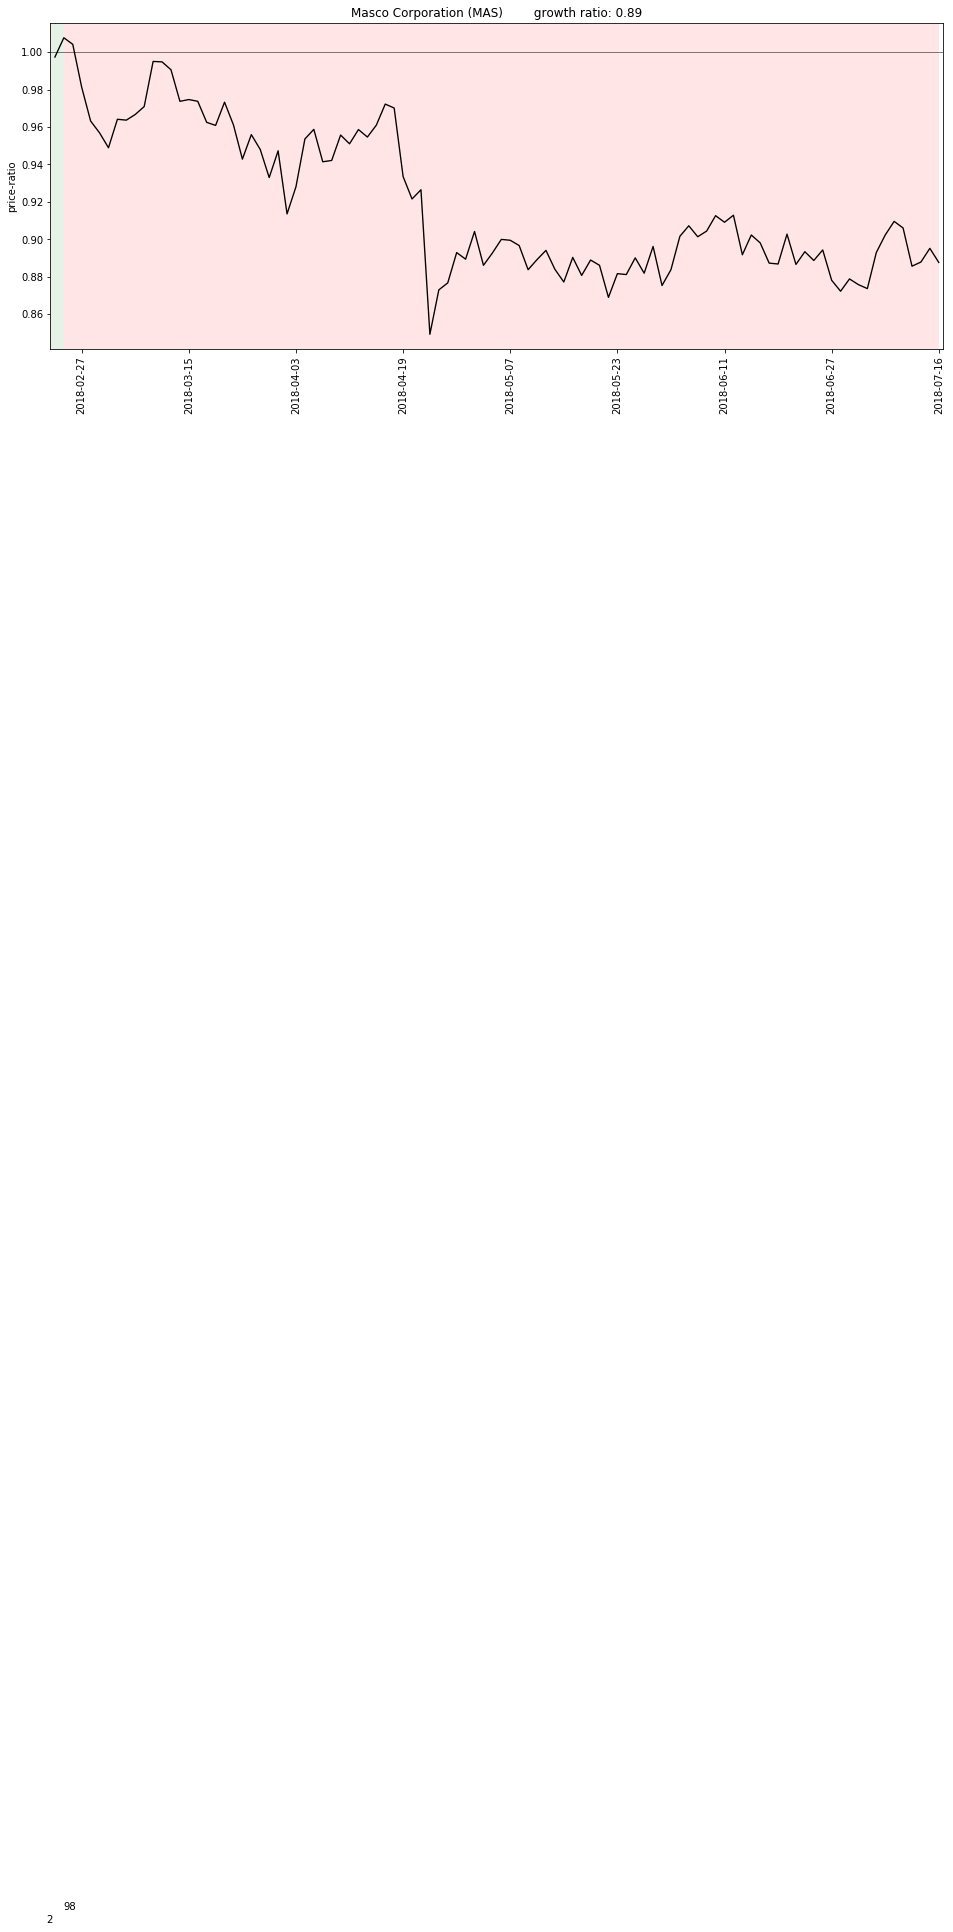

price-drop: 0.90    drop-period: 140


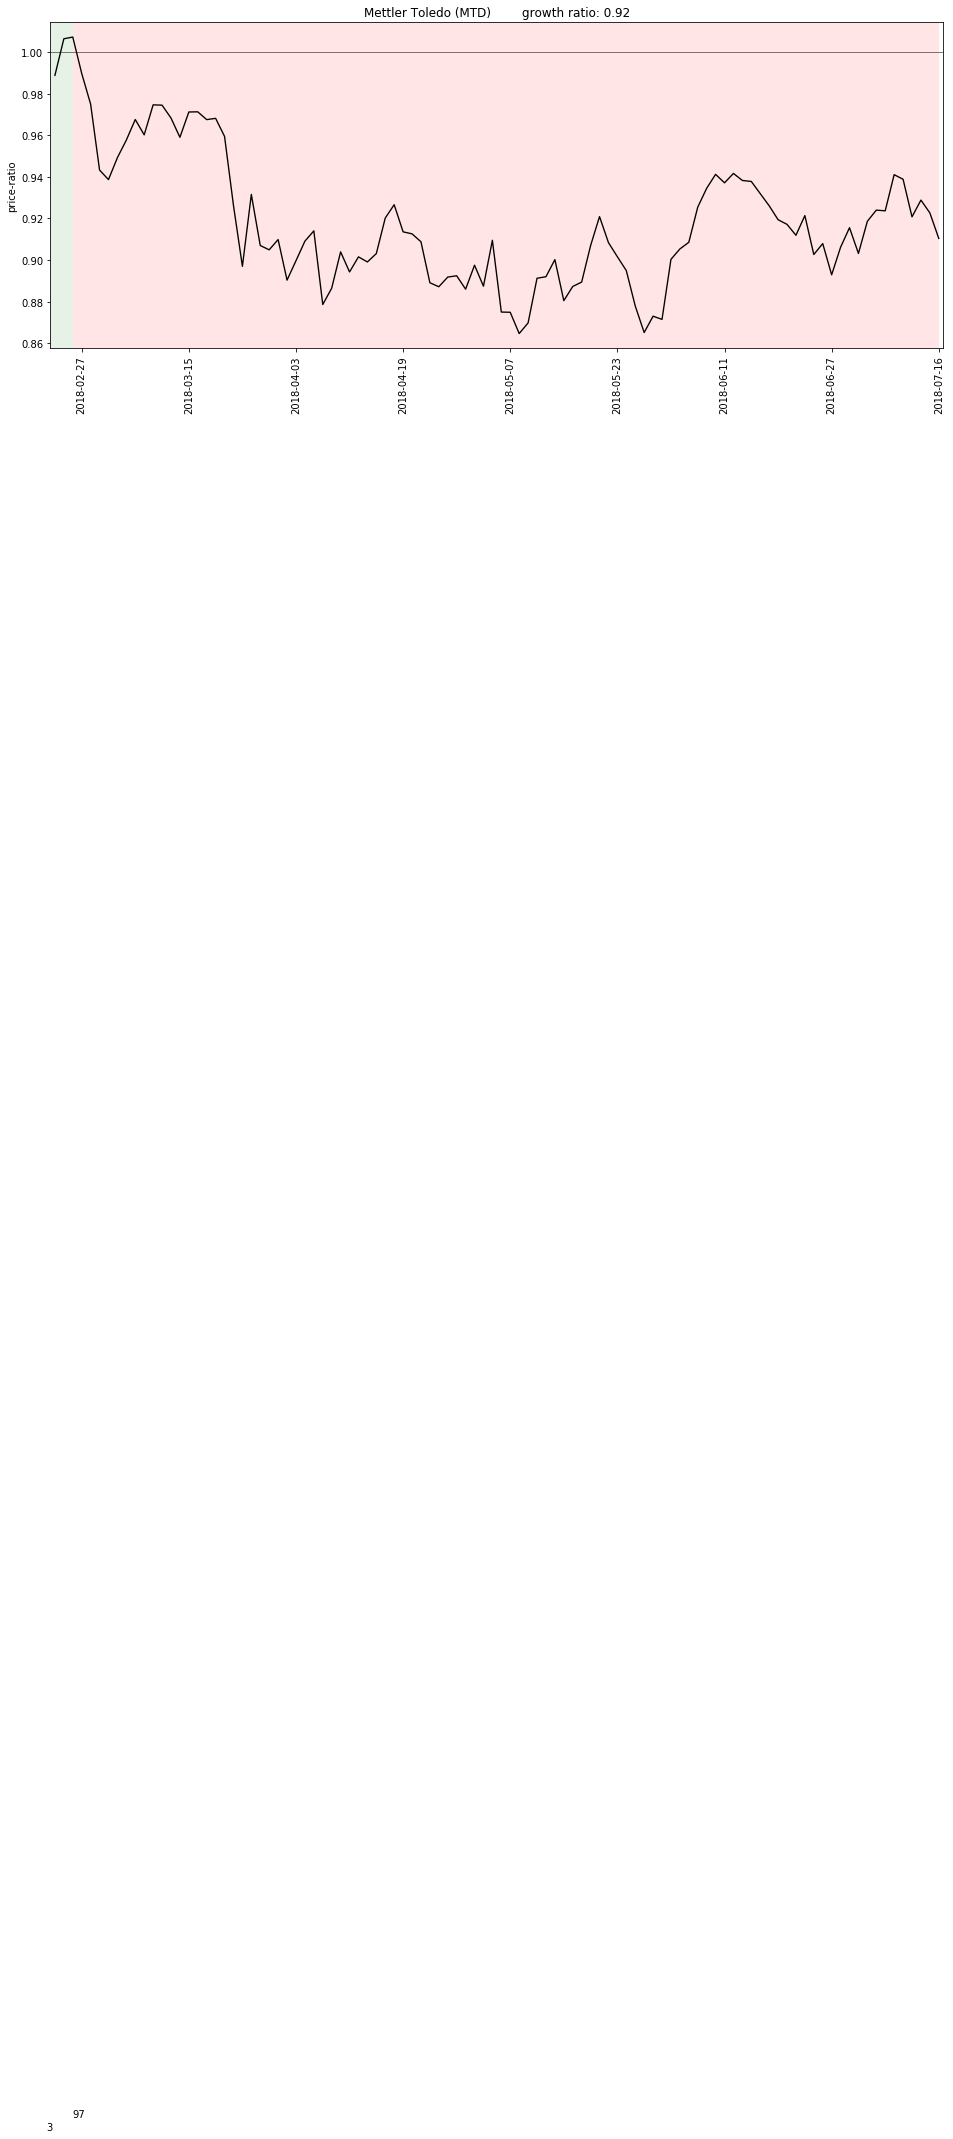

In [99]:
symbols = ['ADBE', 'CTAS', 'V', 'MSI', 'TDG', 'ACN', 'DPS', 'HRS', 'HD', 'LOW', 'FIS', 'NOC', 'AVY', 'RTN', 'FISV', 'SYK', 'PKI', 'STZ', 'WM', 'IT', 'LMT', 'MMC', 'HON', 'TRV', 'MAS', 'MTD']
for symbol in symbols:
    print('price-drop: %.2f    drop-period: %i'%(hp[symbol]['price-drop'].iloc[-1], hp[symbol]['drop-period'].iloc[-1]))
    render.draw_column(hp, symbol, stocks['Name'][symbol], add = ['drop-periods', 'drop-periods-labels'])    

price-drop: 0.98    drop-period: 42


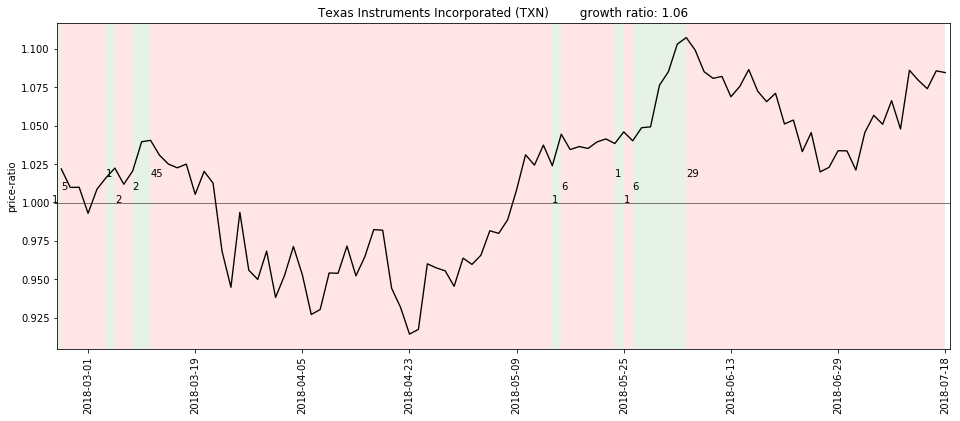

price-drop: 0.99    drop-period: 5


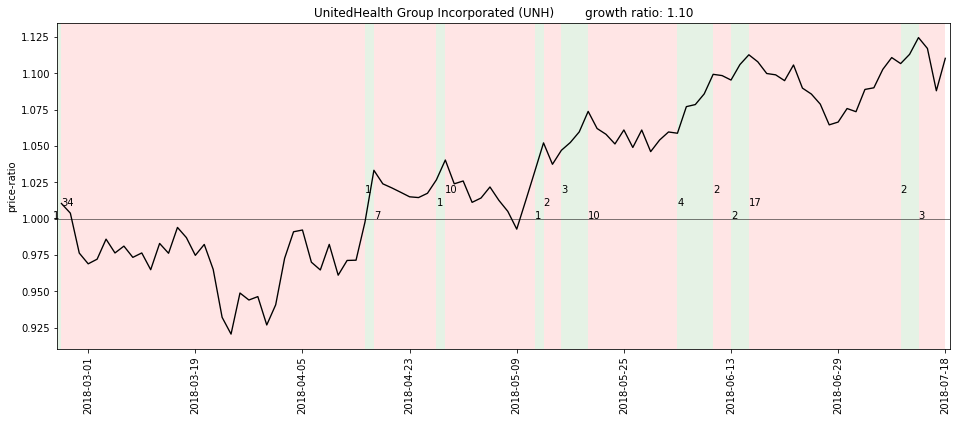

price-drop: 0.94    drop-period: 62


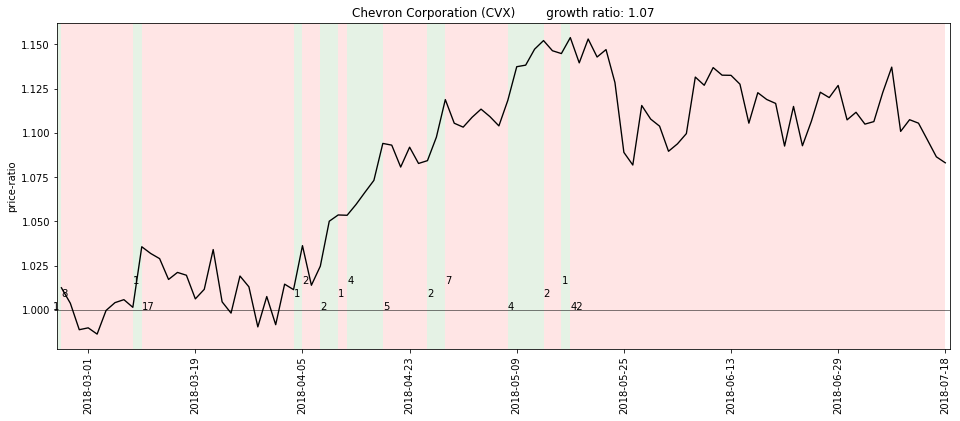

price-drop: 0.99    drop-period: 2


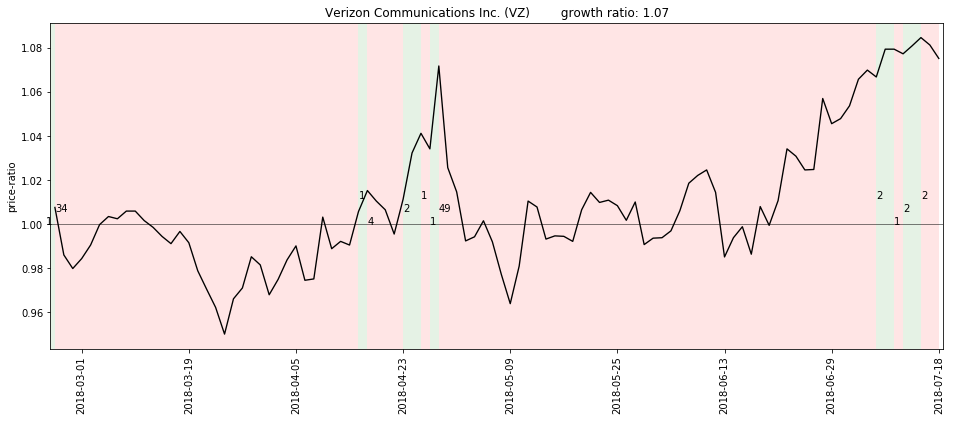

In [133]:
symbols = ['TXN', 'UNH', 'NEE', 'CVX', 'VZ']
hp = hist_per['all']
for symbol in symbols:
    if symbol in hp:
        print('price-drop: %.2f    drop-period: %i'%(hp[symbol]['price-drop'].iloc[-1], hp[symbol]['drop-period'].iloc[-1]))    
        render.draw_column(hp, symbol, stocks['Name'][symbol], add = ['drop-periods', 'drop-periods-labels'])    